In [337]:
!pip install catboost
# if neceessary then uncomment it

# Importing necessary libraries for data manipulation and visualization

In [338]:
# Importing necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from scipy import stats
from math import sqrt

# Importing visualization libraries and setting inline display for plots
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

# Ignoring warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Importing functions for train/test split and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importing functions for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# Importing machine learning models
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

# Importing additional metrics for model evaluation
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

# Importing preprocessing functions
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# More metrics for regression evaluation
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

# Importing XGBoost library
import os
# Setting path for MinGW compiler if necessary (commented out)
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # For plotting feature importance

# Importing joblib for model persistence
import joblib

# Setting Seaborn and Matplotlib styles for better visualization
sns.set()
plt.style.use('ggplot')
%matplotlib inline

# Importing additional preprocessing and pipeline utilities
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

# Importing additional regression models and ensemble methods
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb


**Upload Data Set**

In [339]:
'''math_df = pd.read_csv('student-mat.csv')
por_df = pd.read_csv('student-por.csv')'''

# Assuming you have the datasets loaded into 'student-mat.csv' and 'student-por.csv'
math_df = pd.read_csv('student-mat.csv', sep=';')
por_df = pd.read_csv('student-por.csv', sep=';')

In [340]:
math_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [341]:
por_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [342]:
math_df.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

In [343]:
por_df.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.051093    1.175766    0.924834    1.284380    1.446259   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  649.000000  649.000000  649.000000  649.000000  
mean     3.659476   11.399076   11.570108   11.906009  
std      4.640759    2.745265    2.913639    3.230656  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000   10.000000   10.000000   10.000000  
50%      2.000000   11.000000   11.000000   12.000000  
75%      6.000000   13.000000   13.000000   14.000000  
max     32.000000   19.000000   19.000000   19.000000

In [344]:
#find the object,int,float value
t = (math_df.dtypes == 'object')
object_cols = list(t[t].index)
print("Categorical variables:")
print(object_cols)
print('-'*50)

t = (math_df.dtypes == 'int')
num_cols = list(t[t].index)
print("Integer variables:")
print(num_cols)
print('-'*50)

t = (math_df.dtypes == 'float')
num_cols = list(t[t].index)
print("Float variables:")
print('-'*50)

Categorical variables:
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
--------------------------------------------------
Integer variables:
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
--------------------------------------------------
Float variables:
--------------------------------------------------


In [345]:
#find the object,int,float value
t = (por_df.dtypes == 'object')
object_cols = list(t[t].index)
print("Categorical variables:")
print(object_cols)
print('-'*50)

t = (por_df.dtypes == 'int')
num_cols = list(t[t].index)
print("Integer variables:")
print(num_cols)
print('-'*50)

t = (por_df.dtypes == 'float')
num_cols = list(t[t].index)
print("Float variables:")
print('-'*50)

Categorical variables:
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
--------------------------------------------------
Integer variables:
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
--------------------------------------------------
Float variables:
--------------------------------------------------


In [346]:
math_df.dtypes[math_df.dtypes != 'object']

age           int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [347]:
por_df.dtypes[por_df.dtypes != 'object']

age           int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [348]:
math_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [349]:
por_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [350]:
#find the missing value
print(math_df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [351]:
print(por_df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


Missing Values Count:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
--------------------------------------------------
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
fr

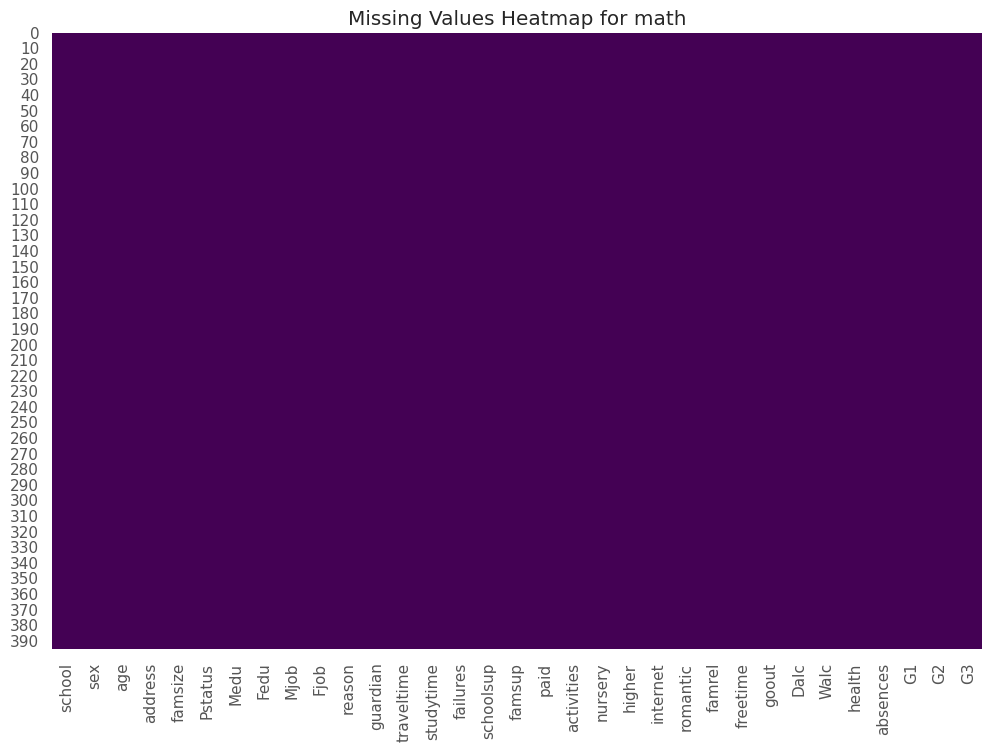

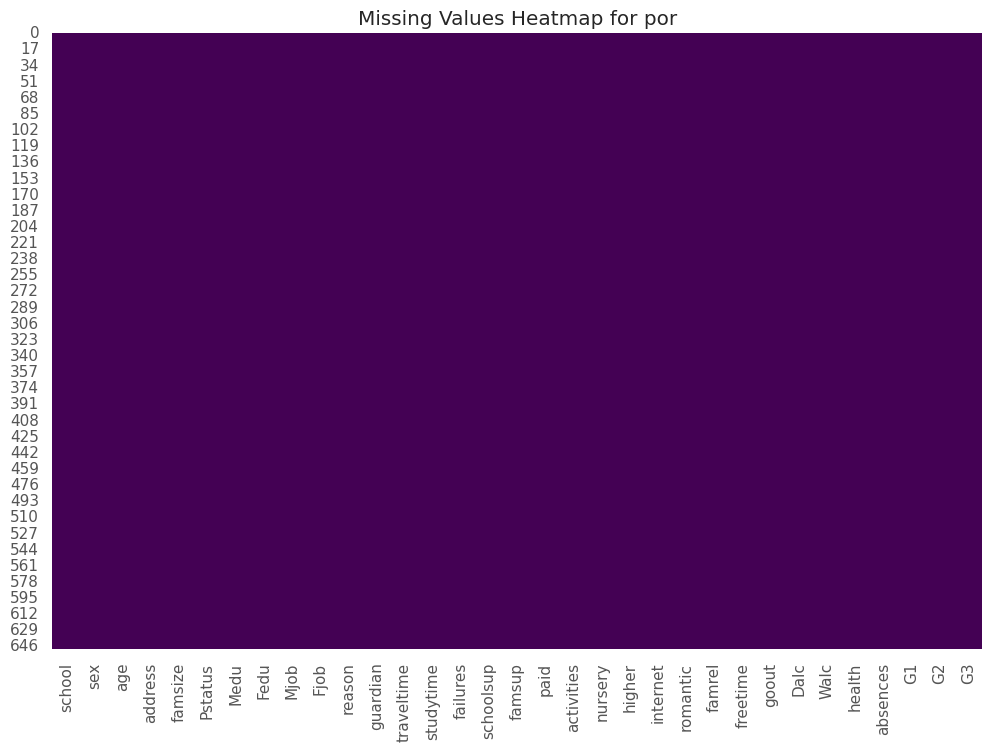

In [352]:
# Check for missing values
print("Missing Values Count:")
print(math_df.isnull().sum())
print('-'*50)
print(por_df.isnull().sum())
# Visualize missing values (if needed)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(math_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap for math')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(por_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap for por')
plt.show()

<Axes: >

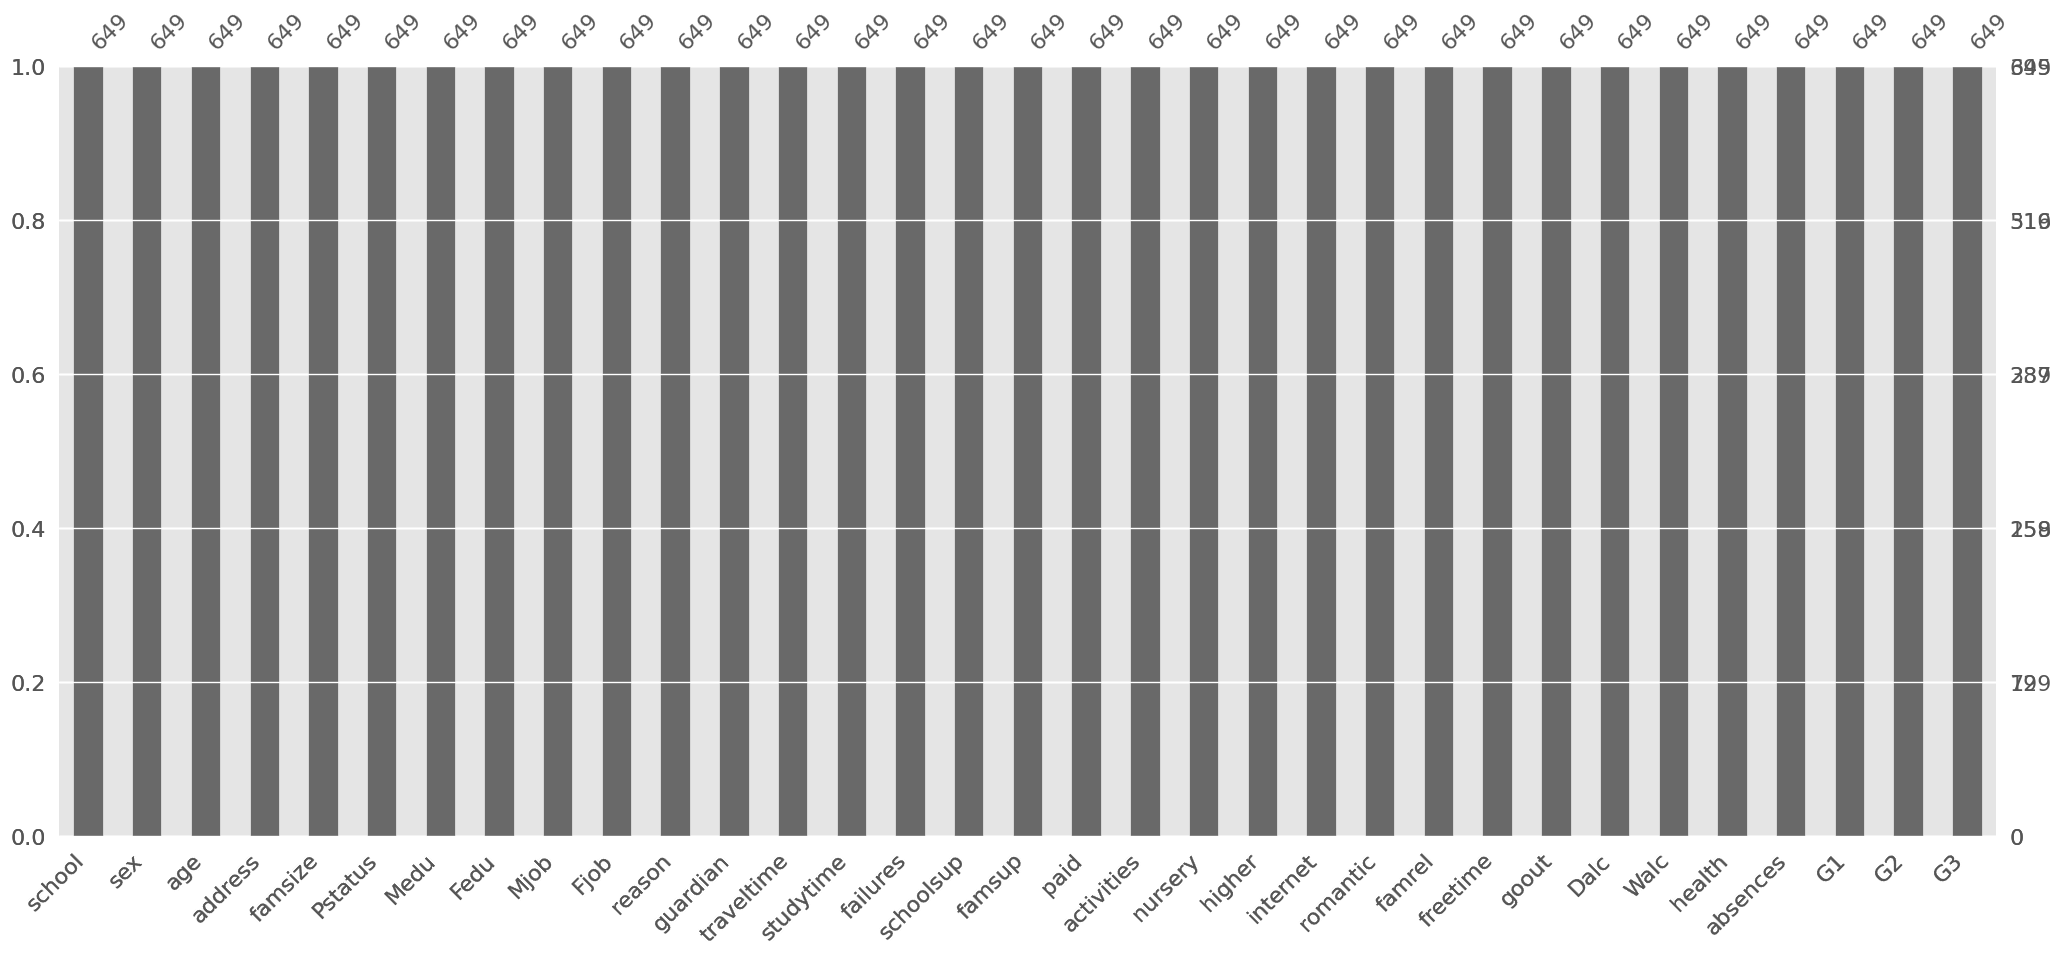

In [353]:
import missingno as msno
msno.bar(math_df)
msno.bar(por_df)

<Axes: >

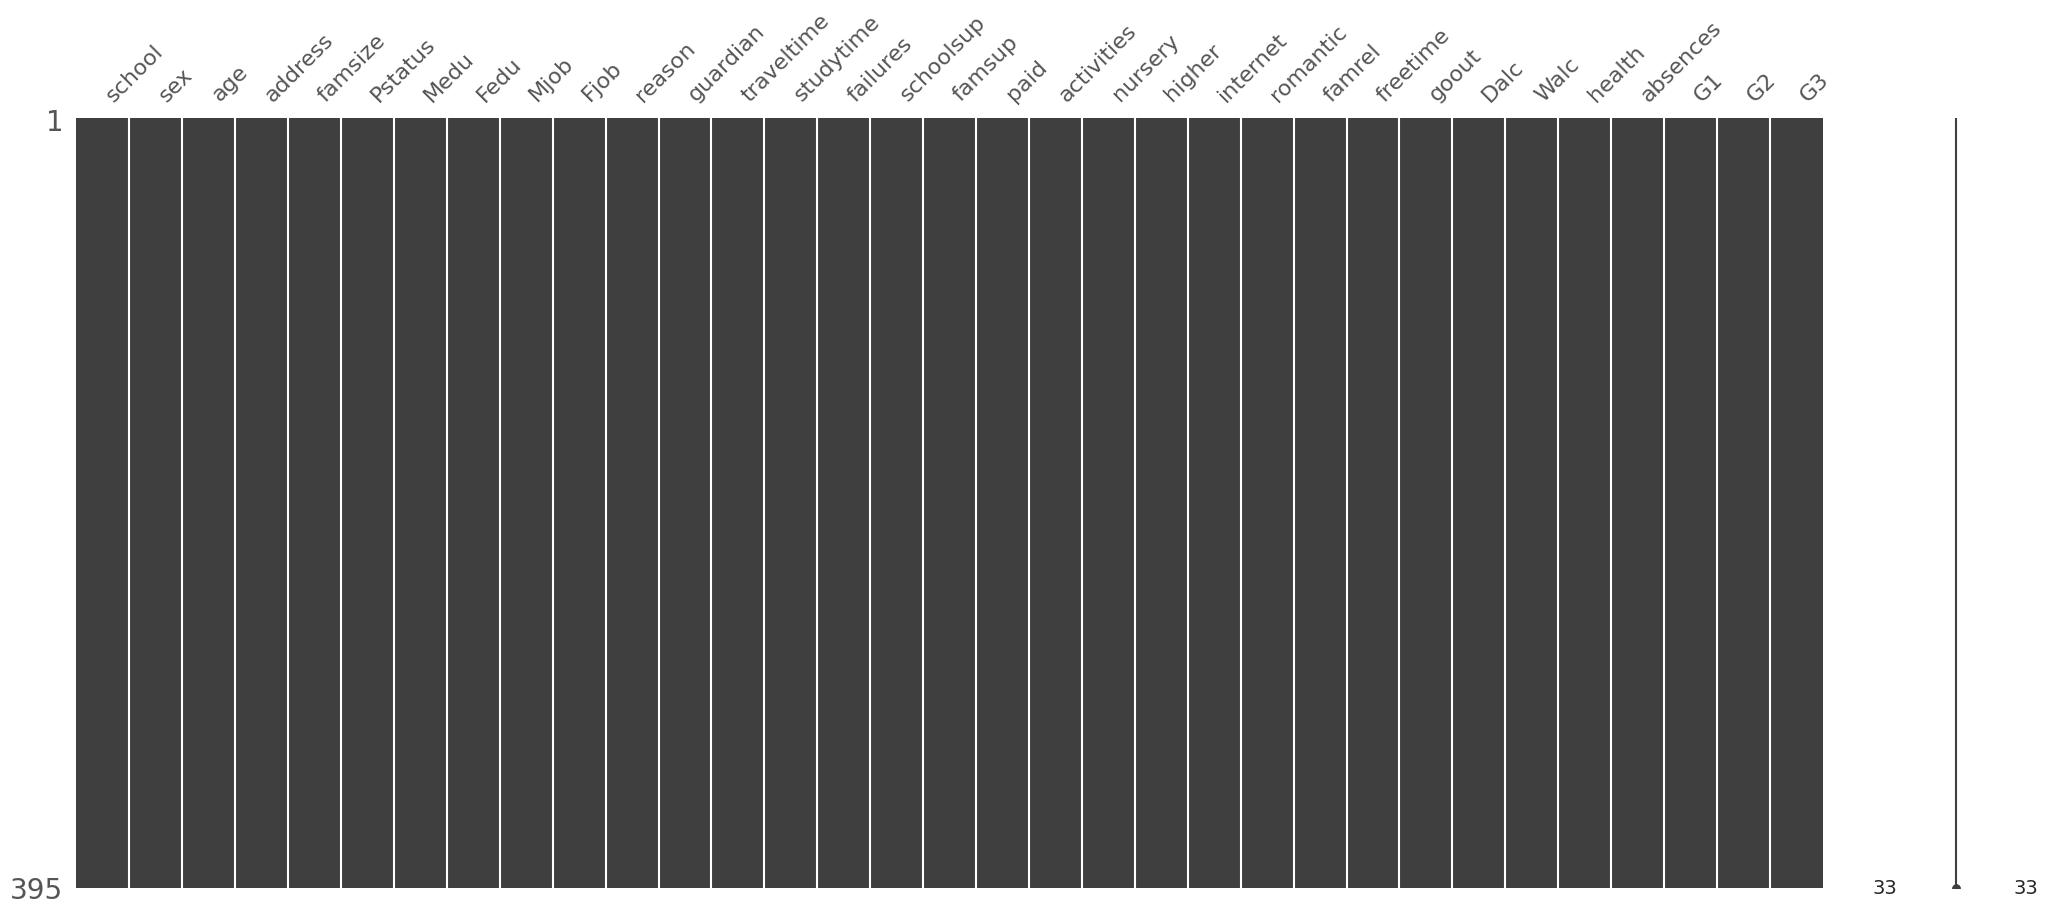

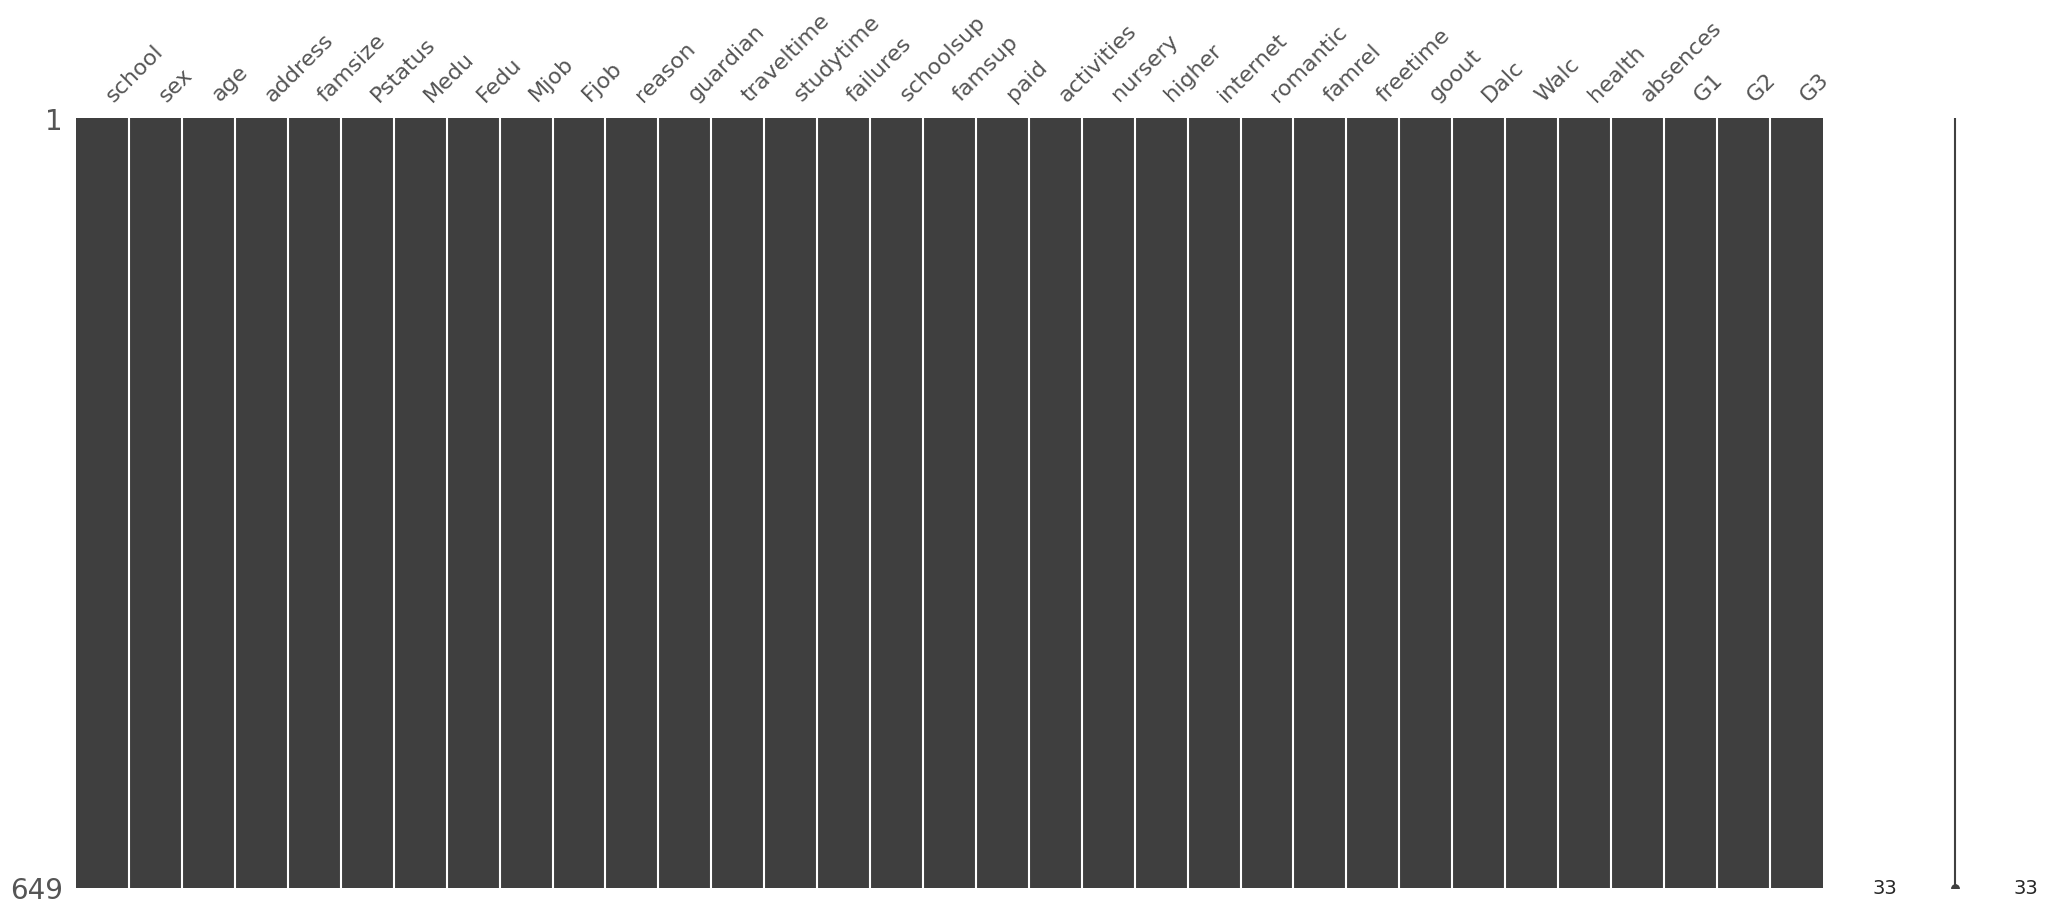

In [354]:

msno.matrix(math_df)
msno.matrix(por_df)

In [355]:
# Merge both datasets based on identical attributes to get a combined dataset
combined_data = pd.merge(math_df, por_df, how='inner', on=[
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
    'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'
])


In [356]:
# List of categorical variables
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                    'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                    'nursery', 'higher', 'internet', 'romantic']

# Analyzing categorical variables
for col in categorical_cols:
    print(combined_data[col].value_counts())


school
GP    32
MS     7
Name: count, dtype: int64
sex
F    20
M    19
Name: count, dtype: int64
address
U    31
R     8
Name: count, dtype: int64
famsize
GT3    26
LE3    13
Name: count, dtype: int64
Pstatus
T    36
A     3
Name: count, dtype: int64
Mjob
other       19
at_home      6
services     6
teacher      5
health       3
Name: count, dtype: int64
Fjob
other       19
services    11
at_home      4
teacher      3
health       2
Name: count, dtype: int64
reason
course        16
home          13
reputation     7
other          3
Name: count, dtype: int64
guardian
mother    21
father    14
other      4
Name: count, dtype: int64
schoolsup
no     33
yes     6
Name: count, dtype: int64
famsup
no     23
yes    16
Name: count, dtype: int64
paid
no     37
yes     2
Name: count, dtype: int64
activities
no     21
yes    18
Name: count, dtype: int64
nursery
yes    30
no      9
Name: count, dtype: int64
higher
yes    39
Name: count, dtype: int64
internet
yes    29
no     10
Name: count, dtype:

In [357]:
# List of numerical variables
numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
                  'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

# Summary statistics of numerical variables
print(combined_data[numerical_cols].describe())


             age       Medu       Fedu  traveltime  studytime   failures  \
count  39.000000  39.000000  39.000000   39.000000  39.000000  39.000000   
mean   16.282051   2.666667   2.487179    1.384615   1.974359   0.179487   
std     1.255487   1.242521   1.097168    0.673380   0.842527   0.555915   
min    15.000000   0.000000   1.000000    1.000000   1.000000   0.000000   
25%    15.000000   2.000000   2.000000    1.000000   1.000000   0.000000   
50%    16.000000   3.000000   2.000000    1.000000   2.000000   0.000000   
75%    17.000000   4.000000   3.000000    2.000000   2.000000   0.000000   
max    19.000000   4.000000   4.000000    3.000000   4.000000   3.000000   

          famrel   freetime      goout       Dalc       Walc     health  \
count  39.000000  39.000000  39.000000  39.000000  39.000000  39.000000   
mean    4.230769   3.384615   2.743590   1.333333   2.102564   3.358974   
std     0.776685   0.877058   1.044231   0.621261   1.391608   1.441622   
min     2.00000

In [358]:
print(combined_data.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y',
       'G3_y'],
      dtype='object')


count    39.000000
mean     12.128205
std       4.181283
min       0.000000
25%      10.000000
50%      12.000000
75%      15.000000
max      19.000000
Name: G3_x, dtype: float64


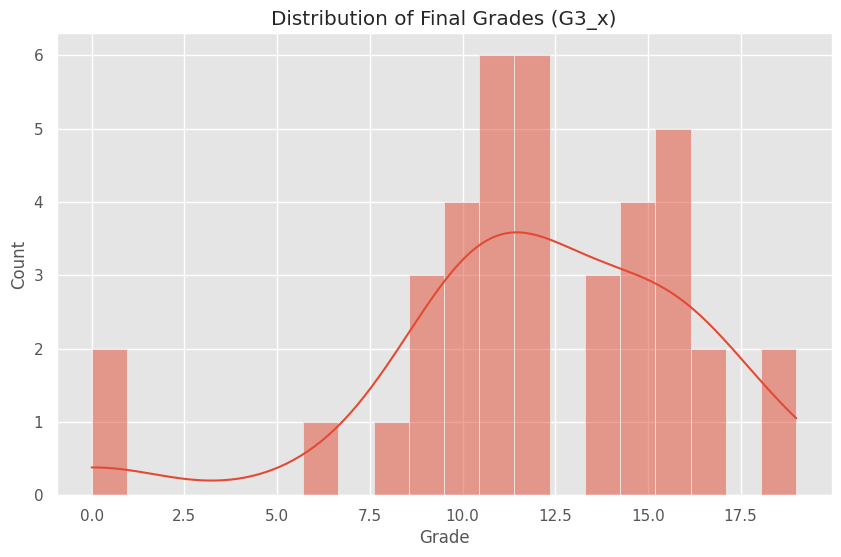

In [359]:
# Choose the appropriate column for the target variable
# For example, you may choose 'G3_x' if it represents the grade you want to analyze
target_col = 'G3_x'  # or 'G3_y' depending on the choice

# Ensure 'G3_x' exists in the DataFrame
if target_col in combined_data.columns:
    print(combined_data[target_col].describe())

    # Visualize the distribution of the selected final grade
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_data[target_col], bins=20, kde=True)
    plt.title('Distribution of Final Grades (G3_x)')
    plt.xlabel('Grade')
    plt.ylabel('Count')
    plt.show()
else:
    print(f"Column '{target_col}' does not exist in the DataFrame.")


count    39.000000
mean     12.589744
std       3.143230
min       0.000000
25%      11.000000
50%      12.000000
75%      15.000000
max      18.000000
Name: G3_y, dtype: float64


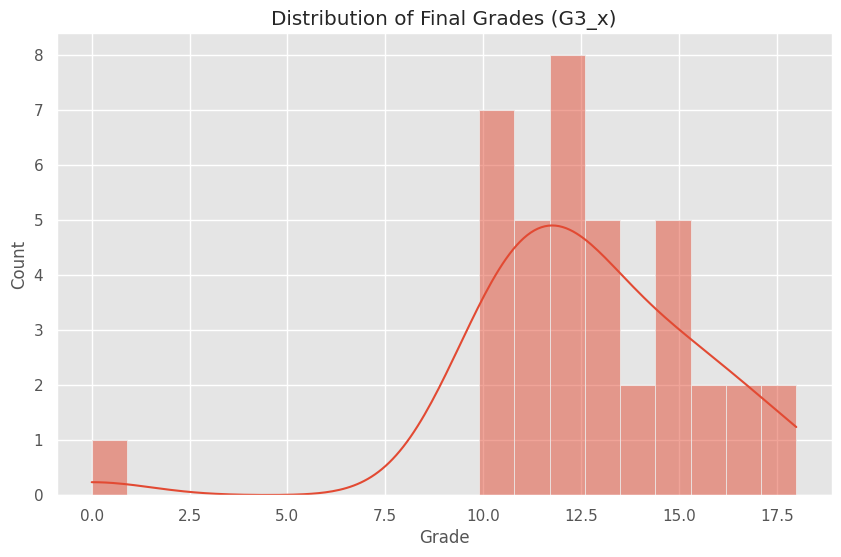

In [360]:
# Choose the appropriate column for the target variable
# For example, you may choose 'G3_x' if it represents the grade you want to analyze
target_col = 'G3_y'  # or 'G3_y' depending on the choice

# Ensure 'G3_x' exists in the DataFrame
if target_col in combined_data.columns:
    print(combined_data[target_col].describe())

    # Visualize the distribution of the selected final grade
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_data[target_col], bins=20, kde=True)
    plt.title('Distribution of Final Grades (G3_x)')
    plt.xlabel('Grade')
    plt.ylabel('Count')
    plt.show()
else:
    print(f"Column '{target_col}' does not exist in the DataFrame.")


In [361]:
# Create a combined target variable if needed
combined_data['G3_combined'] = combined_data[['G3_x', 'G3_y']].mean(axis=1)
combined_data['G1_combined'] = combined_data[['G1_x', 'G1_y']].mean(axis=1)
combined_data['G2_combined'] = combined_data[['G2_x', 'G2_y']].mean(axis=1)

In [362]:

# Use the new combined target variable
target_col = 'G3_combined'
# Confirm column names and proceed
print("Columns in the dataset after handling target variable:", combined_data.columns)
print("Target column:", target_col)



Columns in the dataset after handling target variable: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y',
       'G3_y', 'G3_combined', 'G1_combined', 'G2_combined'],
      dtype='object')
Target column: G3_combined


count    39.000000
mean     12.358974
std       3.475381
min       0.000000
25%      10.500000
50%      12.000000
75%      15.000000
max      18.500000
Name: G3_combined, dtype: float64


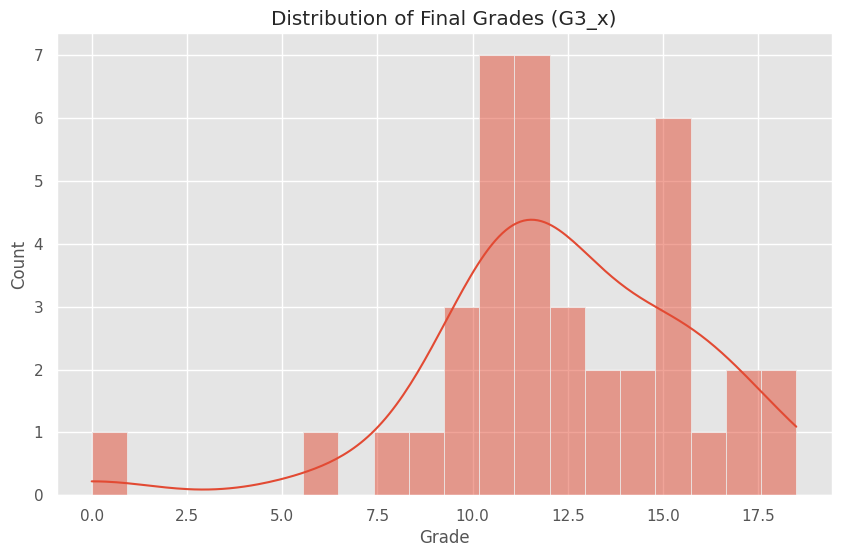

In [363]:
target_col = 'G3_combined'
# Ensure 'G3_x' exists in the DataFrame
if target_col in combined_data.columns:
    print(combined_data[target_col].describe())

    # Visualize the distribution of the selected final grade
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_data[target_col], bins=20, kde=True)
    plt.title('Distribution of Final Grades (G3_x)')
    plt.xlabel('Grade')
    plt.ylabel('Count')
    plt.show()
else:
    print(f"Column '{target_col}' does not exist in the DataFrame.")


       G3_combined  G3_combined_log
count    39.000000        39.000000
mean     12.358974         2.527522
std       3.475381         0.467432
min       0.000000         0.000000
25%      10.500000         2.442347
50%      12.000000         2.564949
75%      15.000000         2.772589
max      18.500000         2.970414


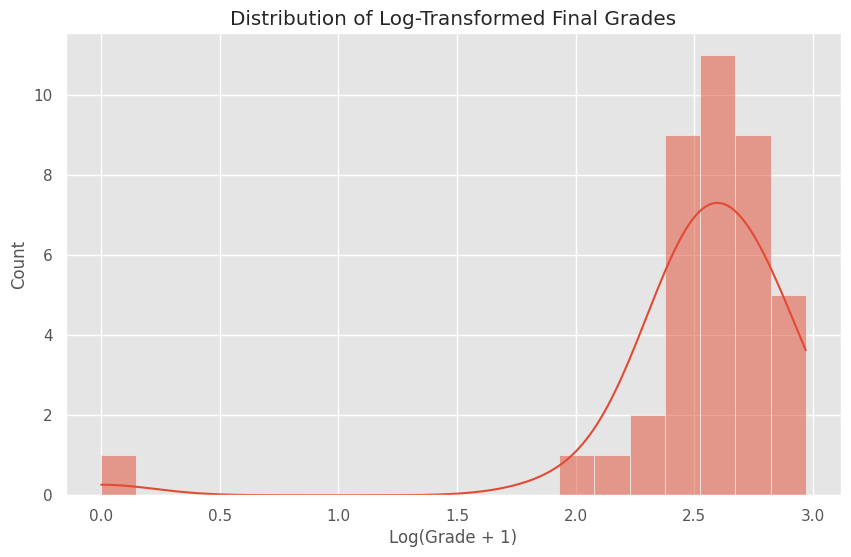

In [364]:
# Check if target_col exists in the DataFrame
if target_col in combined_data.columns:
    # Apply log transformation
    # Add a small constant (e.g., 1) to avoid log(0) issue
    combined_data[target_col + '_log'] = np.log(combined_data[target_col] + 1)

    # Check the new column
    print(combined_data[[target_col, target_col + '_log']].describe())

    # Visualize the distribution of the log-transformed final grade
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_data[target_col + '_log'], bins=20, kde=True)
    plt.title('Distribution of Log-Transformed Final Grades')
    plt.xlabel('Log(Grade + 1)')
    plt.ylabel('Count')
    plt.show()
else:
    print(f"Column '{target_col}' does not exist in the DataFrame.")

In [365]:
# Function to plot boxplots for numerical columns
def plot_boxplots(data, columns):
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(columns, 1):
        plt.subplot(5, 3, i)
        sns.boxplot(y=data[col])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

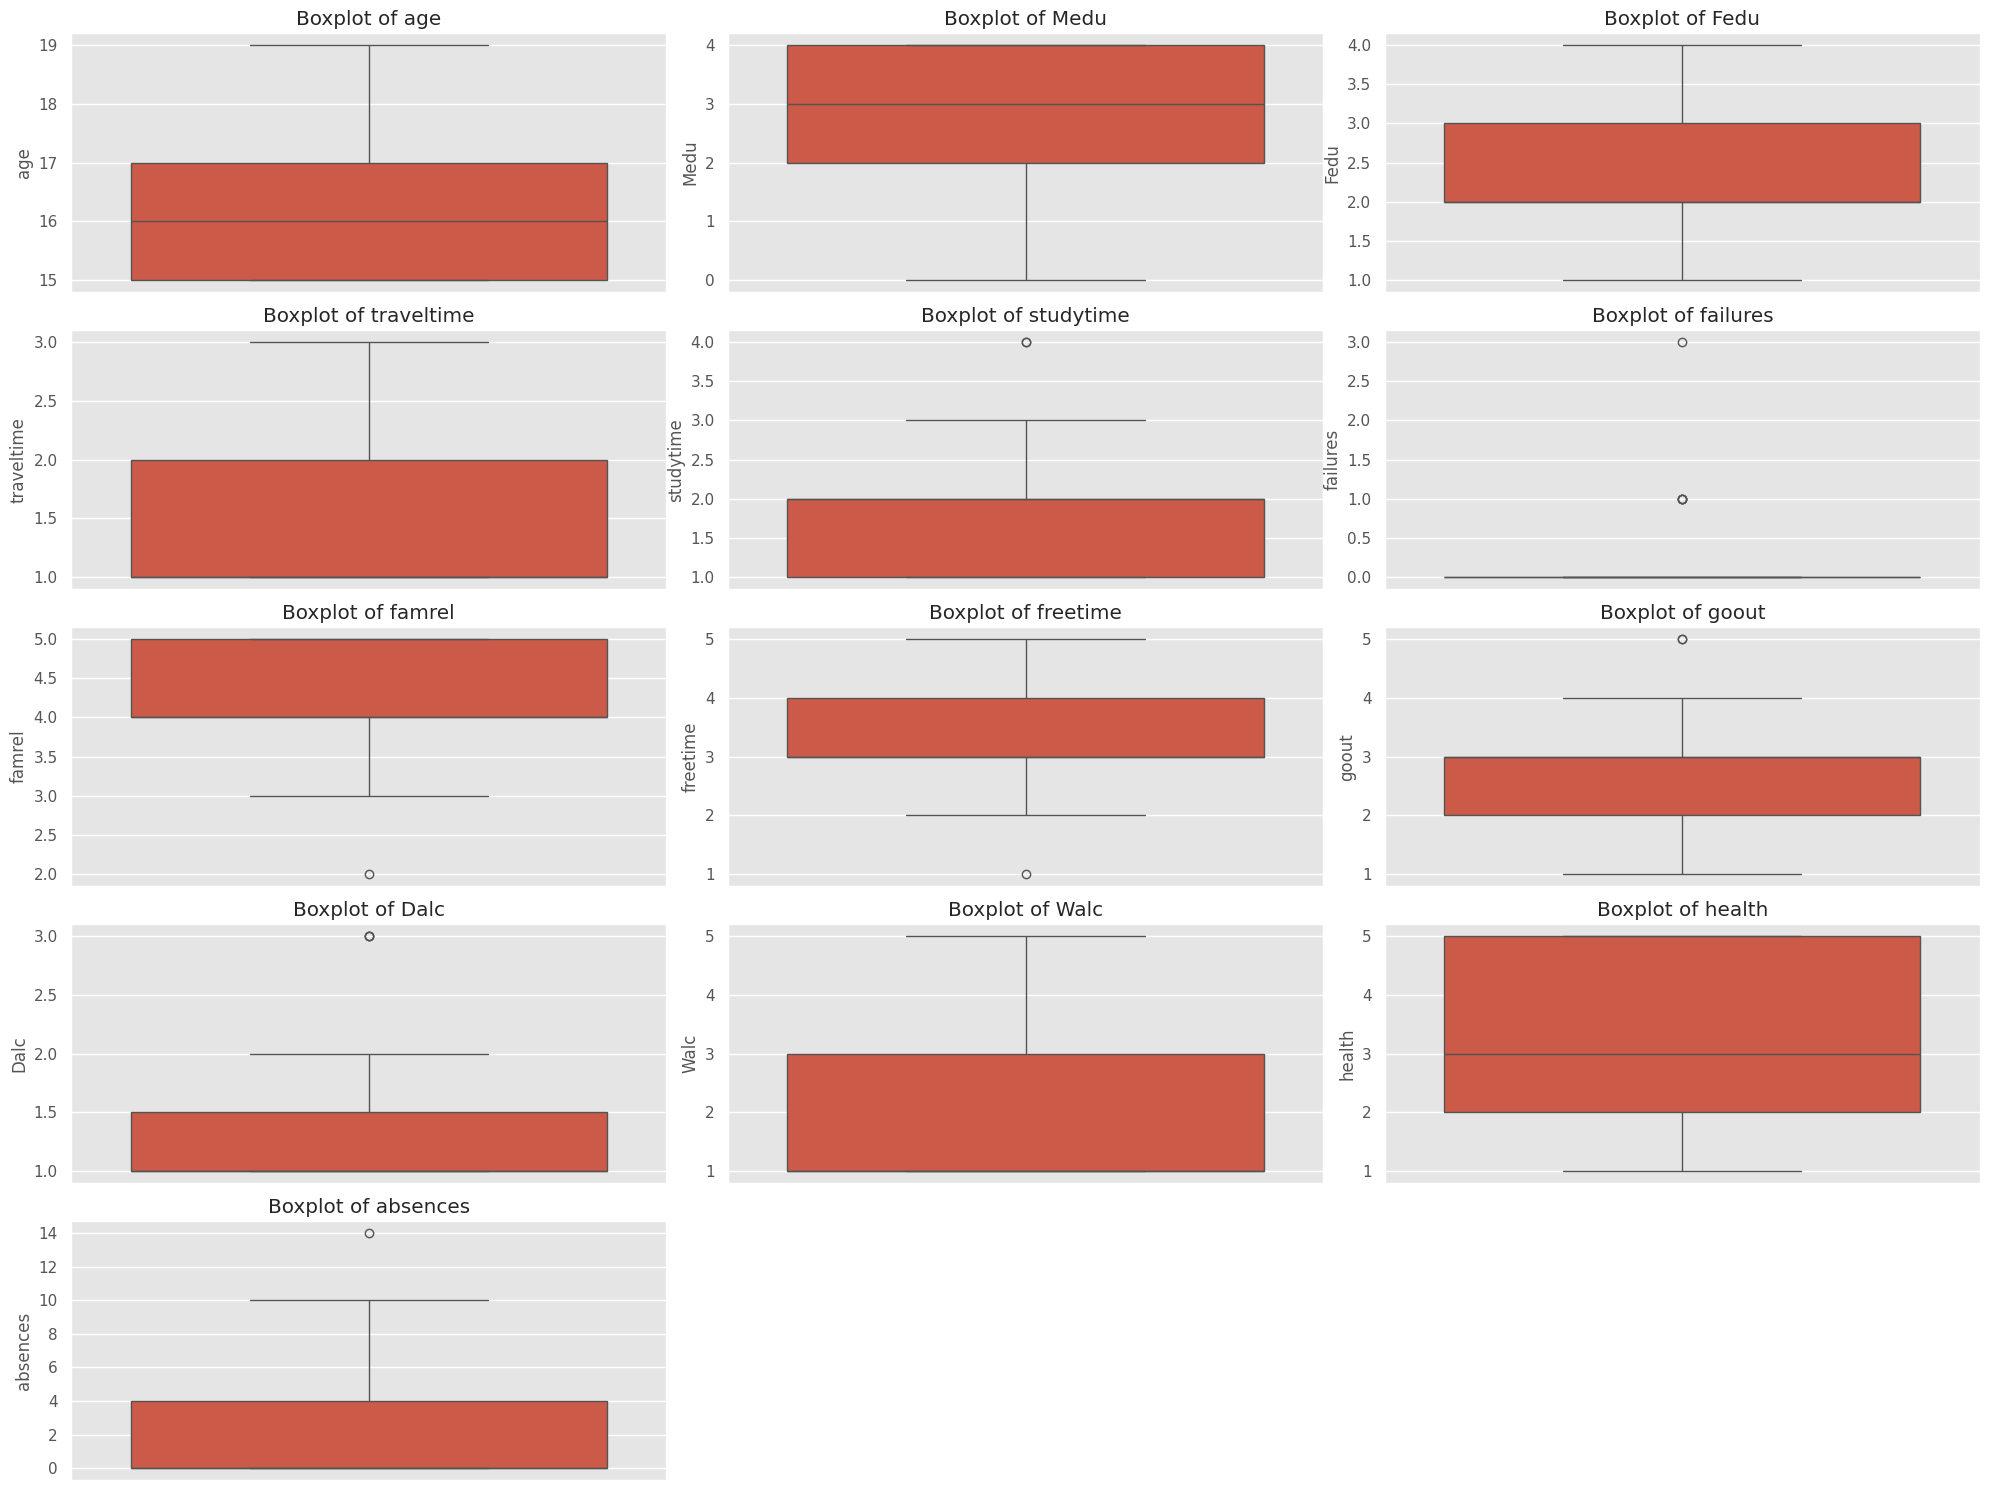

In [366]:
# Plot boxplots to visualize outliers
plot_boxplots(combined_data, numerical_cols)

In [367]:
# Outlier detection using IQR method
Q1 = combined_data[target_col].quantile(0.25)
Q3 = combined_data[target_col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = combined_data[(combined_data[target_col] < lower_bound) | (combined_data[target_col] > upper_bound)]
cleaned_data = combined_data[(combined_data[target_col] >= lower_bound) & (combined_data[target_col] <= upper_bound)]

print(f'Number of outliers: {outliers.shape[0]}')


Number of outliers: 1


Number of outliers in G3_combined: 1


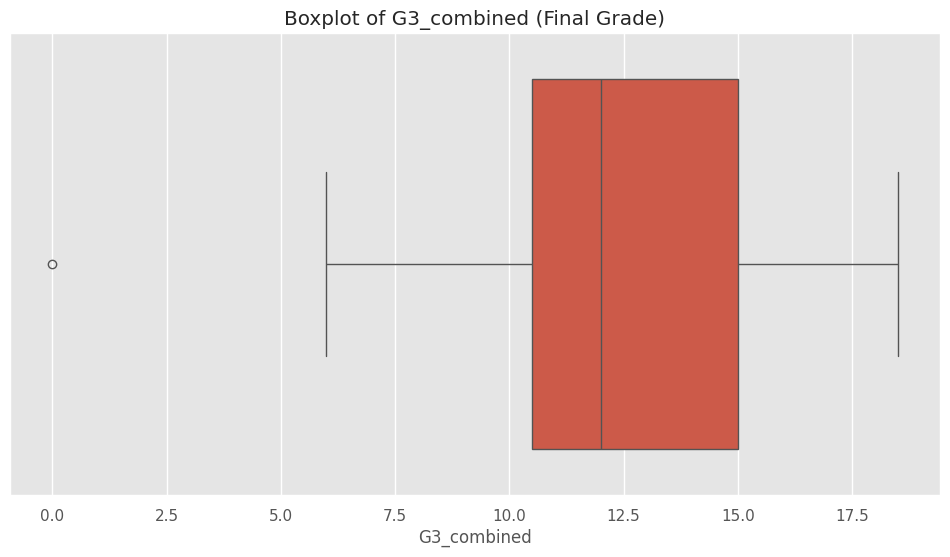

Original data shape: (39, 40)
Cleaned data shape: (38, 40)


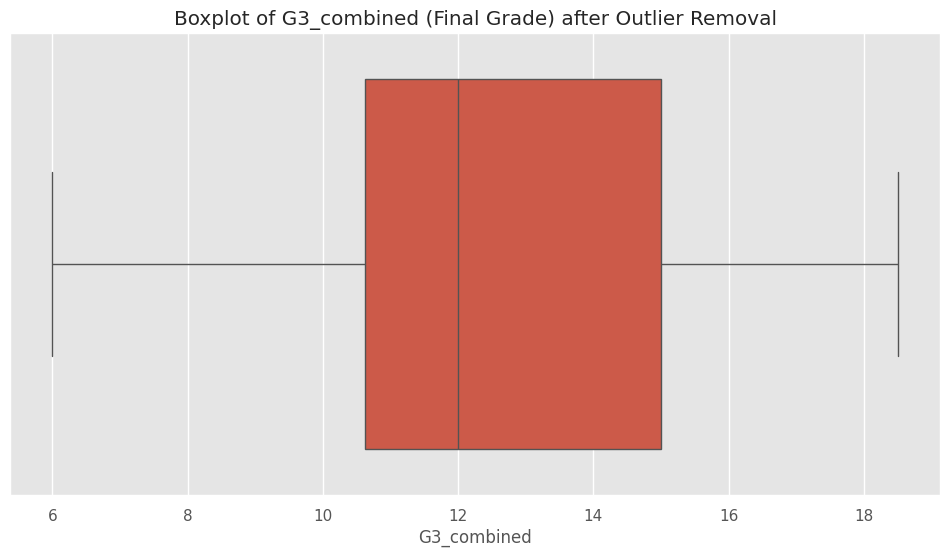

In [368]:
# Function to detect outliers using IQR
def detect_outliers(combined_data, target_col):
    Q1 = combined_data[target_col].quantile(0.25)
    Q3 = combined_data[target_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = combined_data[(combined_data[target_col] < lower_bound) | (combined_data[target_col] > upper_bound)]
    return outliers

# Function to remove outliers using IQR
def remove_outliers(combined_data, target_col):
    Q1 = combined_data[target_col].quantile(0.25)
    Q3 = combined_data[target_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    combined_data_cleaned = combined_data[(combined_data[target_col] >= lower_bound) & (combined_data[target_col] <= upper_bound)]
    return combined_data_cleaned

# Identify and visualize outliers in the target variable 'G3'
outliers_G3 = detect_outliers(combined_data, target_col)
print(f'Number of outliers in {target_col}: {outliers_G3.shape[0]}')

plt.figure(figsize=(12, 6))
sns.boxplot(x=combined_data[target_col])
plt.title(f'Boxplot of {target_col} (Final Grade)')
plt.show()

# Remove outliers in 'G3'
cleaned_data = remove_outliers(combined_data, target_col)

# Verify removal of outliers
print(f'Original data shape: {combined_data.shape}')
print(f'Cleaned data shape: {cleaned_data.shape}')

plt.figure(figsize=(12, 6))
sns.boxplot(x=cleaned_data[target_col])
plt.title(f'Boxplot of {target_col} (Final Grade) after Outlier Removal')
plt.show()


In [369]:
# Checking for missing values
missing_values = combined_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Series([], dtype: int64)


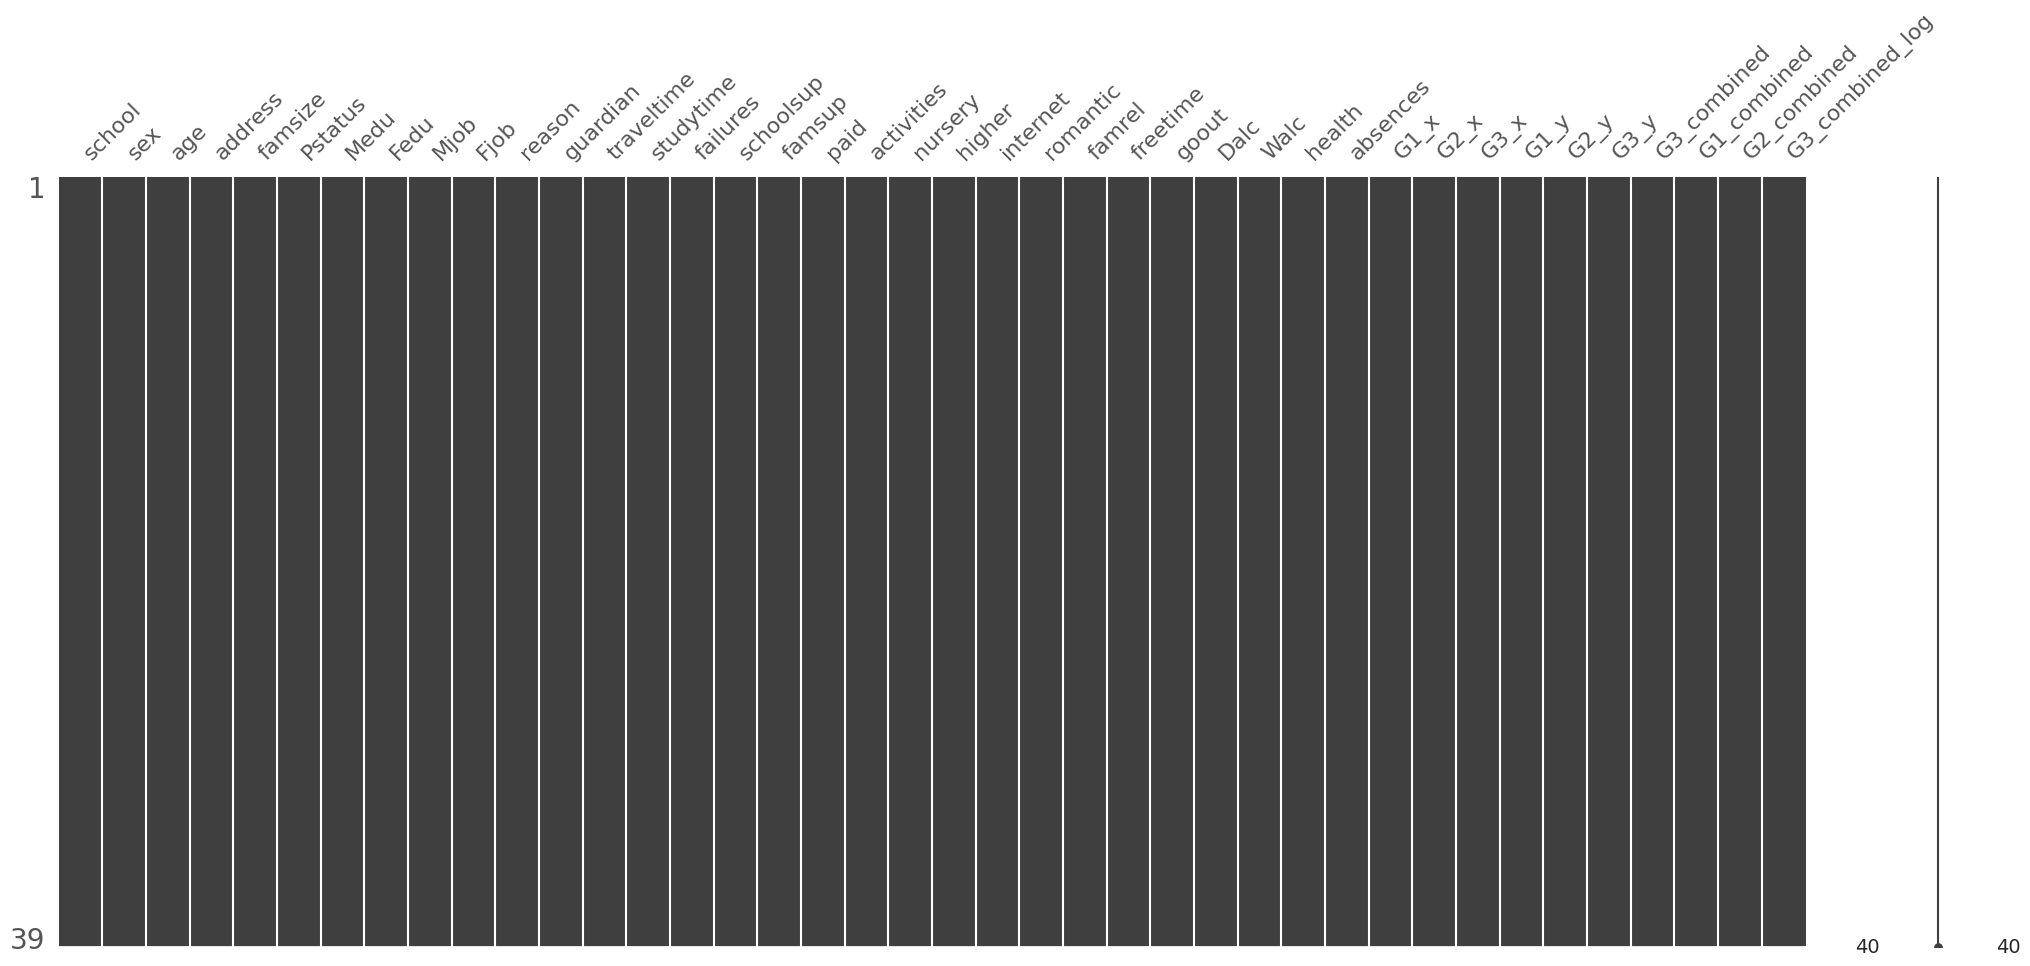

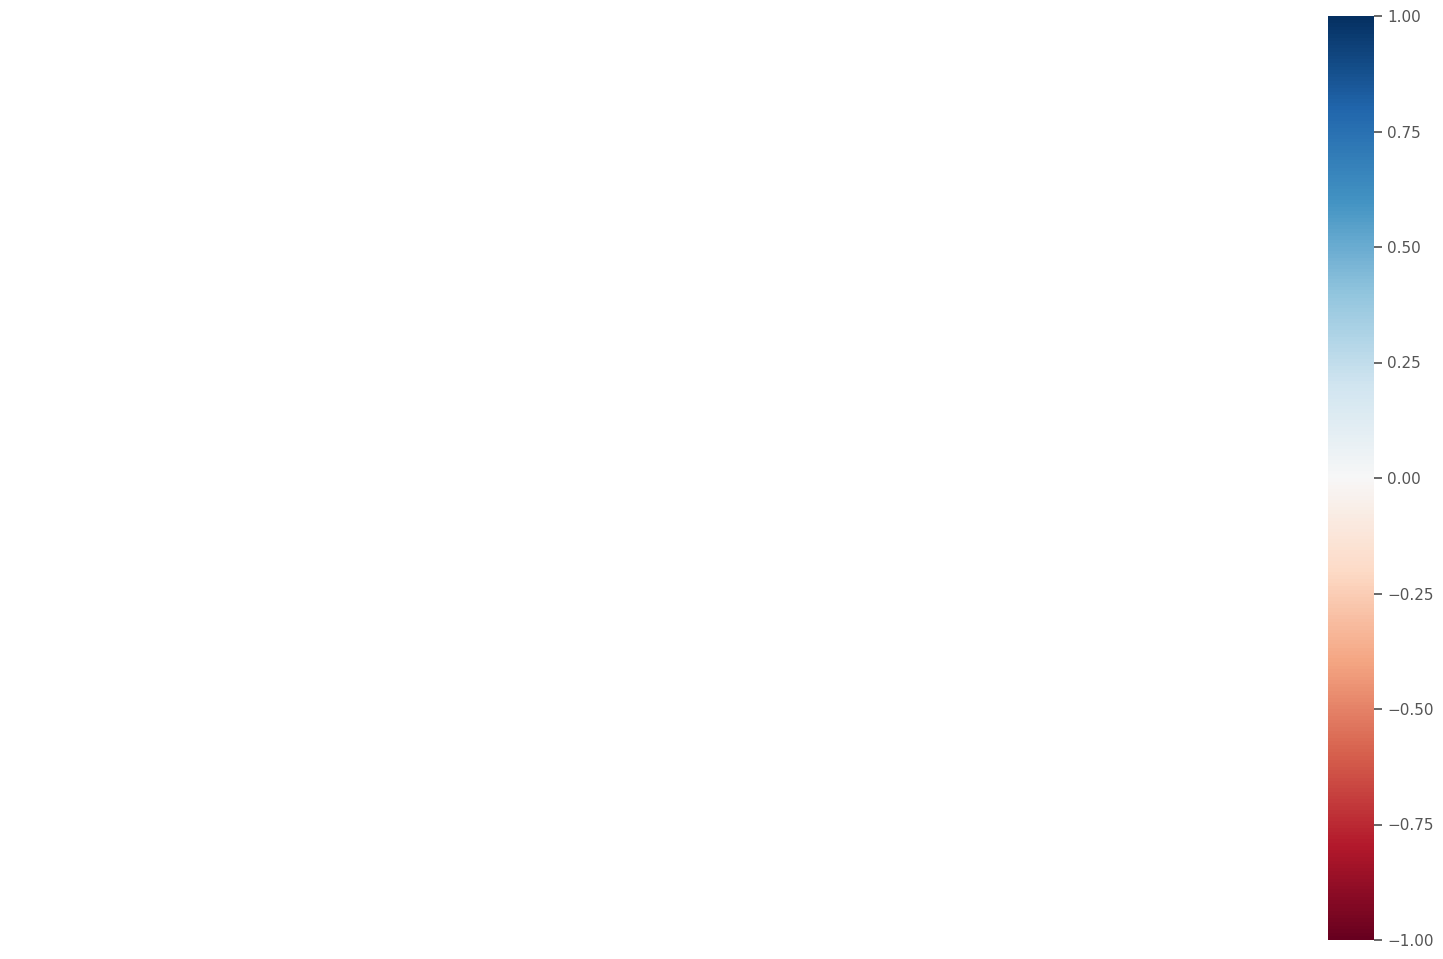

In [370]:
import missingno as msno

# Visualize missing values
msno.matrix(combined_data)
plt.show()

msno.heatmap(combined_data)
plt.show()


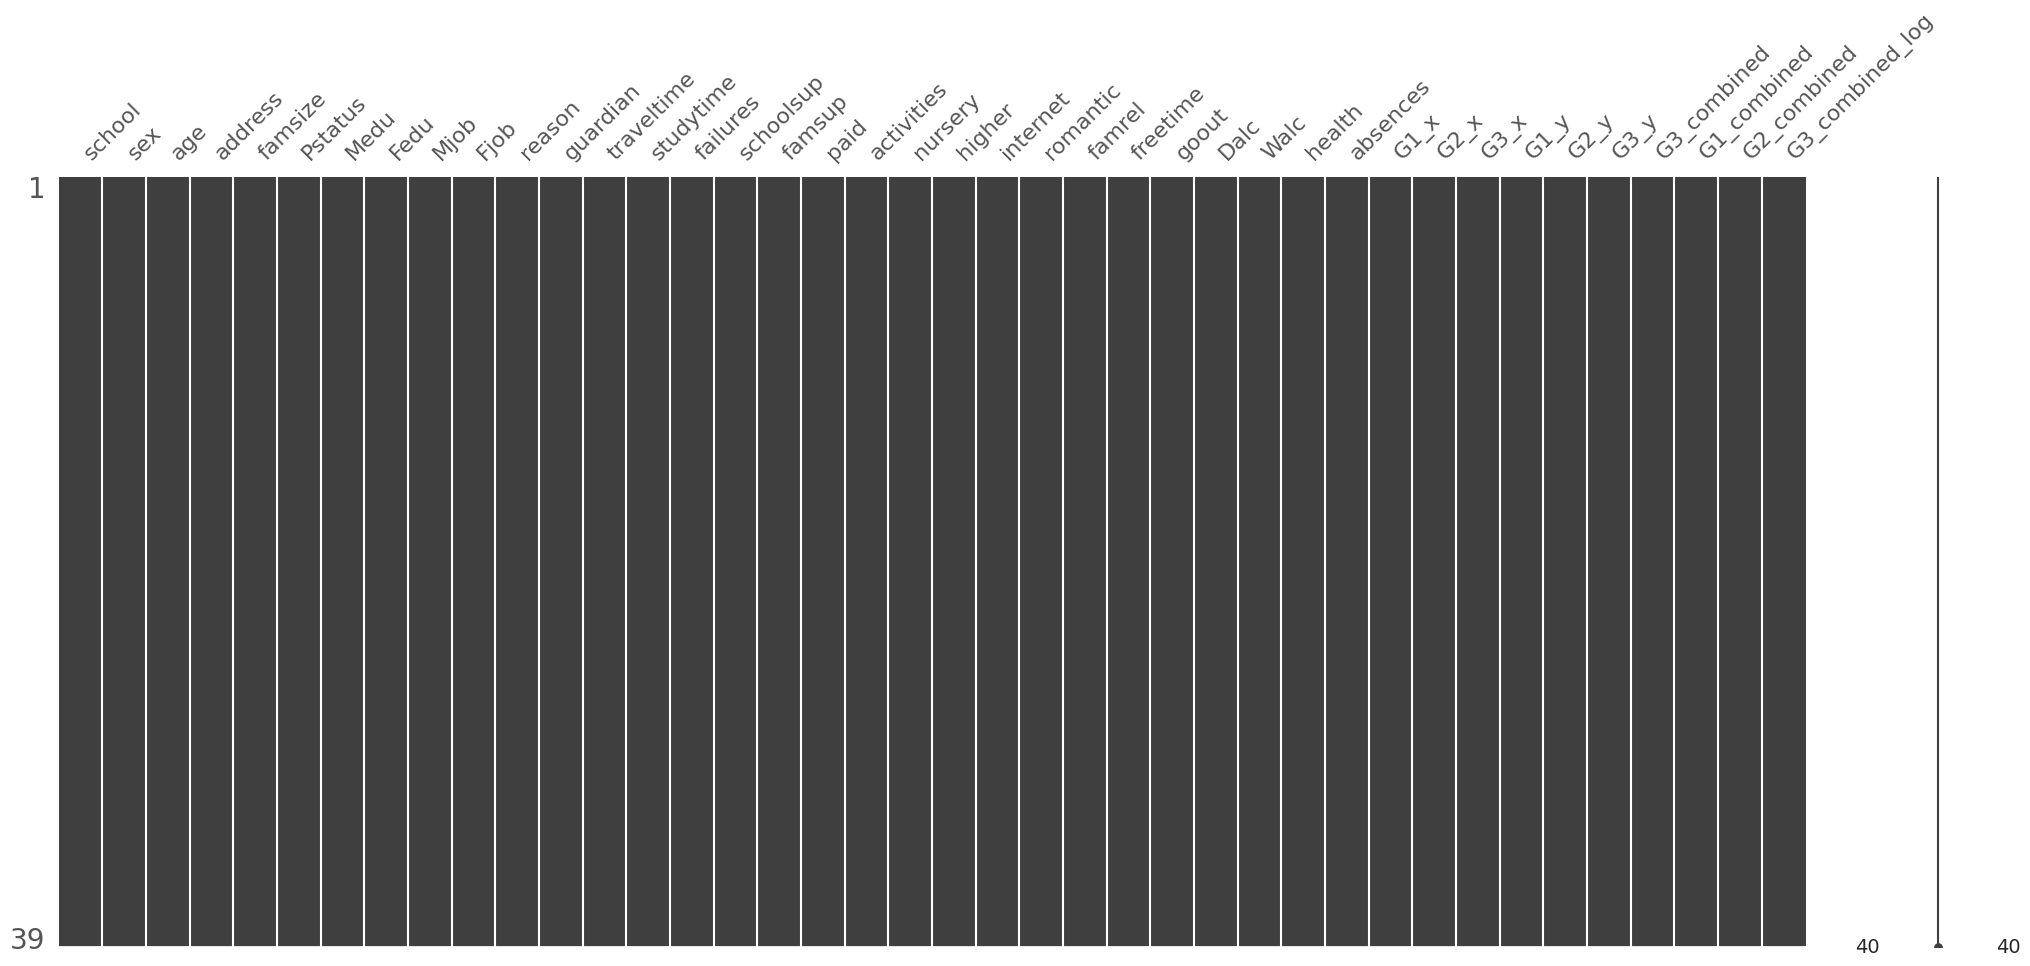

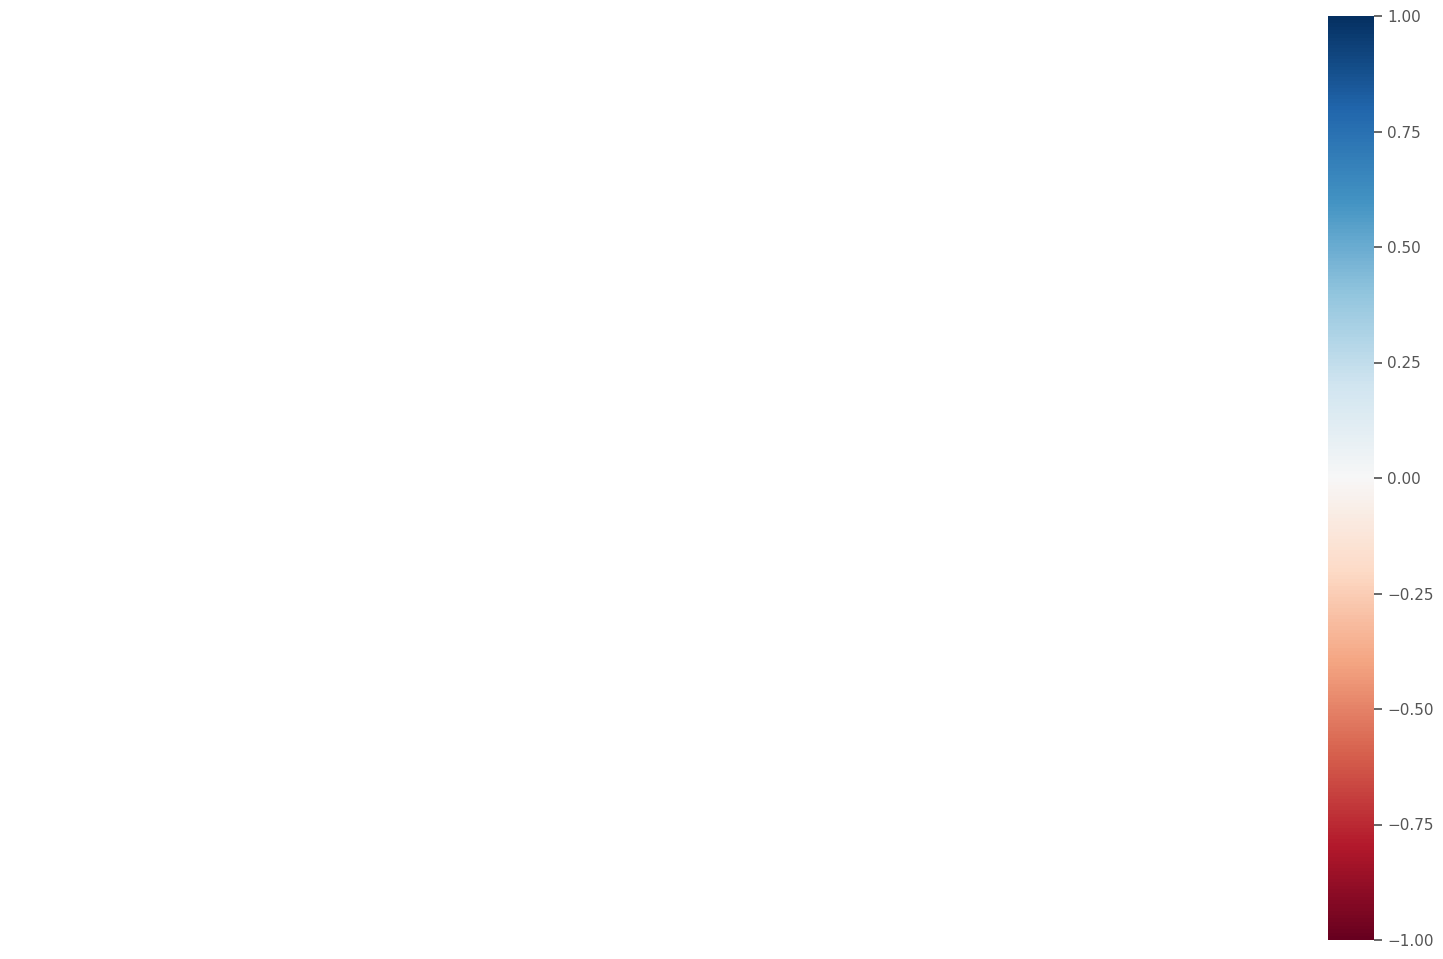

In [371]:
import missingno as msno

# Visualize missing values
msno.matrix(combined_data)
plt.show()

msno.heatmap(combined_data)
plt.show()


In [372]:
# If there are columns with missing values, handle them appropriately

# Example: Filling missing values with mean for numerical columns
for col in combined_data.select_dtypes(include=['float64', 'int64']).columns:
    if combined_data[col].isnull().sum() > 0:
        combined_data[col].fillna(combined_data[col].mean(), inplace=True)

# Example: Filling missing values with mode for categorical columns
for col in combined_data.select_dtypes(include=['object']).columns:
    if combined_data[col].isnull().sum() > 0:
        combined_data[col].fillna(combined_data[col].mode()[0], inplace=True)


In [373]:
# Creating a new feature 'FamilySize'
combined_data['FamilySize'] = combined_data['famsize'].apply(lambda x: 1 if x == 'LE3' else 2)


In [374]:
# Creating a new feature 'ParentEdu' by combining mother's and father's education
combined_data['ParentEdu'] = combined_data['Medu'] + combined_data['Fedu']


In [375]:
# Encoding binary categorical features to 0 and 1
binary_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'Pstatus']
for col in binary_cols:
    combined_data[col] = combined_data[col].map({'yes': 1, 'no': 0})
    combined_data[col] = combined_data[col].map({'T': 1, 'A': 0})


In [376]:
# Creating a new feature 'TotalAlcohol' by summing weekday and weekend alcohol consumption
combined_data['TotalAlcohol'] = combined_data['Dalc'] + combined_data['Walc']


In [377]:
# Interaction feature between study time and travel time
combined_data['StudyTravelTime'] = combined_data['studytime'] * combined_data['traveltime']


In [378]:
# Log transformation of 'absences' to handle skewness
combined_data['log_absences'] = np.log1p(combined_data['absences'])


In [379]:
# Creating new features based on grades
combined_data['G1_G2_Avg'] = (combined_data['G1_combined'] + combined_data['G2_combined']) / 2
combined_data['G1_G3_Diff'] = combined_data['G1_combined'] - combined_data['G3_combined']
combined_data['G2_G3_Diff'] = combined_data['G2_combined'] - combined_data['G3_combined']


In [380]:
# Creating dummy variables for nominal categorical features
nominal_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
combined_data = pd.get_dummies(combined_data, columns=nominal_cols, drop_first=True)


In [381]:
# Creating a new feature 'StudyFreeTimeRatio'
combined_data['StudyFreeTimeRatio'] = combined_data['studytime'] / (combined_data['freetime'] + 1)


In [382]:
# Creating a new feature 'TravelStudyRatio'
combined_data['TravelStudyRatio'] = combined_data['traveltime'] / (combined_data['studytime'] + 1)


In [383]:
# Creating a new feature 'HighFamRel' indicating high quality of family relationships
combined_data['HighFamRel'] = combined_data['famrel'].apply(lambda x: 1 if x >= 4 else 0)


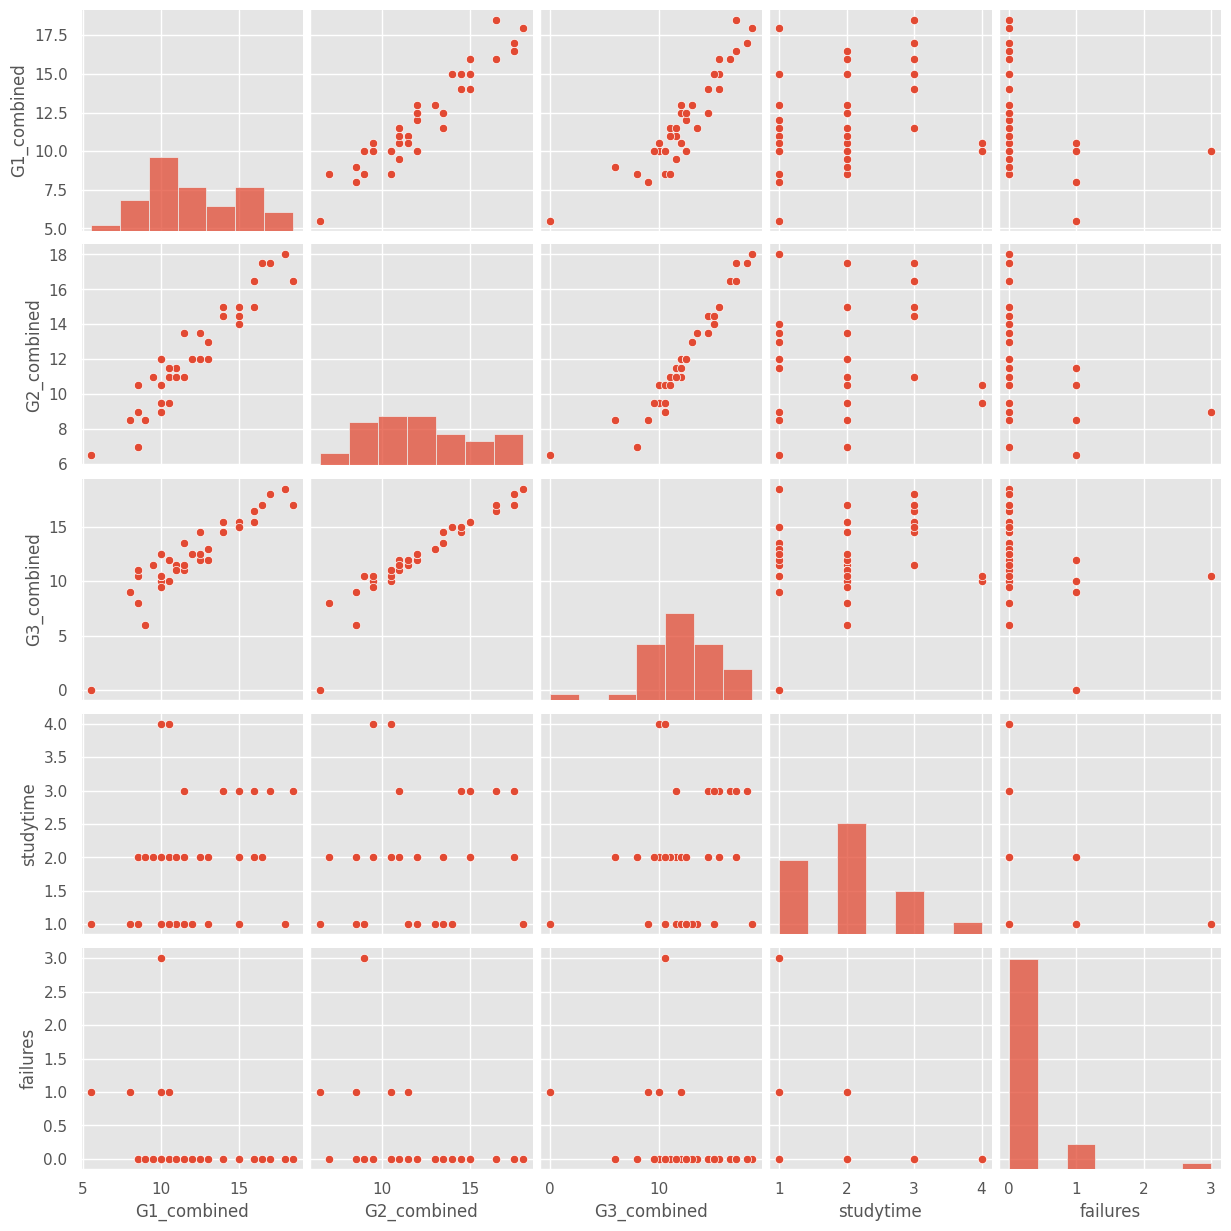

In [384]:
# Example: Visualizing relationships using scatter plots or heatmaps
sns.pairplot(combined_data[['G1_combined', 'G2_combined', 'G3_combined', 'studytime', 'failures']])
plt.show()


In [385]:
# Display basic information about the dataset
print(combined_data.info())

# Display the first few rows of the dataset
print(combined_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              39 non-null     object 
 1   sex                 39 non-null     object 
 2   age                 39 non-null     int64  
 3   address             39 non-null     object 
 4   famsize             39 non-null     object 
 5   Pstatus             0 non-null      float64
 6   Medu                39 non-null     int64  
 7   Fedu                39 non-null     int64  
 8   traveltime          39 non-null     int64  
 9   studytime           39 non-null     int64  
 10  failures            39 non-null     int64  
 11  schoolsup           0 non-null      float64
 12  famsup              0 non-null      float64
 13  paid                0 non-null      float64
 14  activities          0 non-null      float64
 15  nursery             0 non-null      float64
 16  higher    

In [386]:
# Summary statistics for numerical variables
print(combined_data.describe())


             age  Pstatus       Medu       Fedu  traveltime  studytime  \
count  39.000000      0.0  39.000000  39.000000   39.000000  39.000000   
mean   16.282051      NaN   2.666667   2.487179    1.384615   1.974359   
std     1.255487      NaN   1.242521   1.097168    0.673380   0.842527   
min    15.000000      NaN   0.000000   1.000000    1.000000   1.000000   
25%    15.000000      NaN   2.000000   2.000000    1.000000   1.000000   
50%    16.000000      NaN   3.000000   2.000000    1.000000   2.000000   
75%    17.000000      NaN   4.000000   3.000000    2.000000   2.000000   
max    19.000000      NaN   4.000000   4.000000    3.000000   4.000000   

        failures  schoolsup  famsup  paid  ...  ParentEdu  TotalAlcohol  \
count  39.000000        0.0     0.0   0.0  ...  39.000000     39.000000   
mean    0.179487        NaN     NaN   NaN  ...   5.153846      3.435897   
std     0.555915        NaN     NaN   NaN  ...   2.170841      1.832382   
min     0.000000        NaN     N

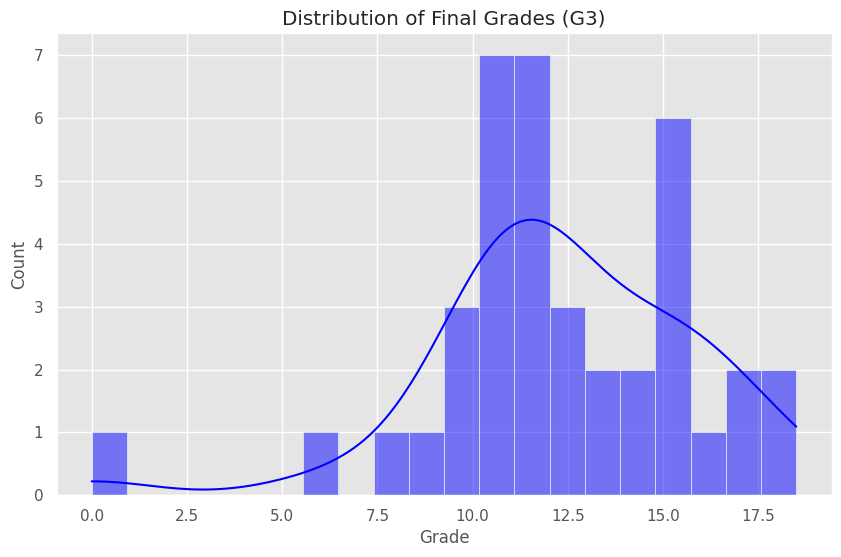

In [387]:
# Distribution of the target variable 'G3' (Final Grade)
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['G3_combined'], bins=20, kde=True, color='blue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()


In [388]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              39 non-null     object 
 1   sex                 39 non-null     object 
 2   age                 39 non-null     int64  
 3   address             39 non-null     object 
 4   famsize             39 non-null     object 
 5   Pstatus             0 non-null      float64
 6   Medu                39 non-null     int64  
 7   Fedu                39 non-null     int64  
 8   traveltime          39 non-null     int64  
 9   studytime           39 non-null     int64  
 10  failures            39 non-null     int64  
 11  schoolsup           0 non-null      float64
 12  famsup              0 non-null      float64
 13  paid                0 non-null      float64
 14  activities          0 non-null      float64
 15  nursery             0 non-null      float64
 16  higher    

In [389]:
# Print the column names of the DataFrame
print(combined_data.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1_x',
       'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y', 'G3_combined', 'G1_combined',
       'G2_combined', 'G3_combined_log', 'FamilySize', 'ParentEdu',
       'TotalAlcohol', 'StudyTravelTime', 'log_absences', 'G1_G2_Avg',
       'G1_G3_Diff', 'G2_G3_Diff', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other',
       'StudyFreeTimeRatio', 'TravelStudyRatio', 'HighFamRel'],
      dtype='object')


In [390]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns (updated based on the provided column names)
categorical = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid',
                    'activities', 'nursery', 'higher', 'internet', 'romantic',
                    'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
                    'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
                    'reason_home', 'reason_other', 'reason_reputation',
                    'guardian_mother', 'guardian_other']

# Initialize the label encoder
encoder = LabelEncoder()

# Encode categorical columns
for col in categorical:
    if col in combined_data.columns:
        combined_data[col] = encoder.fit_transform(combined_data[col])
    else:
        print(f"Column '{col}' not found in the DataFrame.")


In [391]:
# Check for NaN values
print(combined_data.isna().sum())


school                0
sex                   0
age                   0
address               0
famsize               0
Pstatus               0
Medu                  0
Fedu                  0
traveltime            0
studytime             0
failures              0
schoolsup             0
famsup                0
paid                  0
activities            0
nursery               0
higher                0
internet              0
romantic              0
famrel                0
freetime              0
goout                 0
Dalc                  0
Walc                  0
health                0
absences              0
G1_x                  0
G2_x                  0
G3_x                  0
G1_y                  0
G2_y                  0
G3_y                  0
G3_combined           0
G1_combined           0
G2_combined           0
G3_combined_log       0
FamilySize            0
ParentEdu             0
TotalAlcohol          0
StudyTravelTime       0
log_absences          0
G1_G2_Avg       

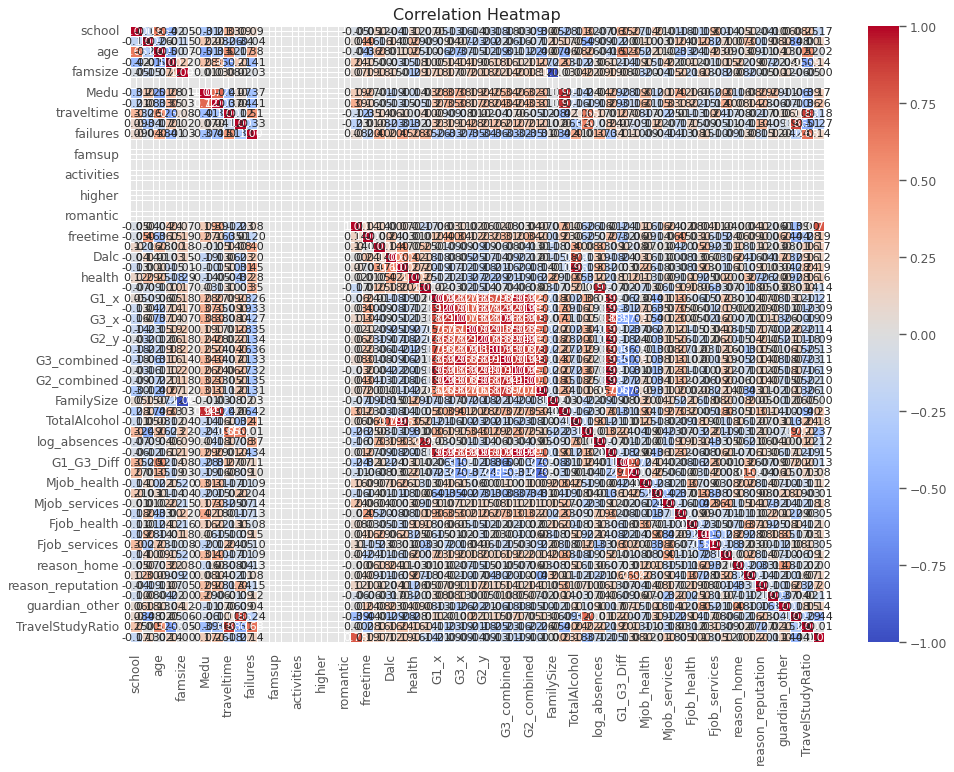

In [392]:
# Compute the correlation matrix
correlation_matrix = combined_data.corr()

# Adjust the figure size and dpi
plt.figure(figsize=(14, 10), dpi=80)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

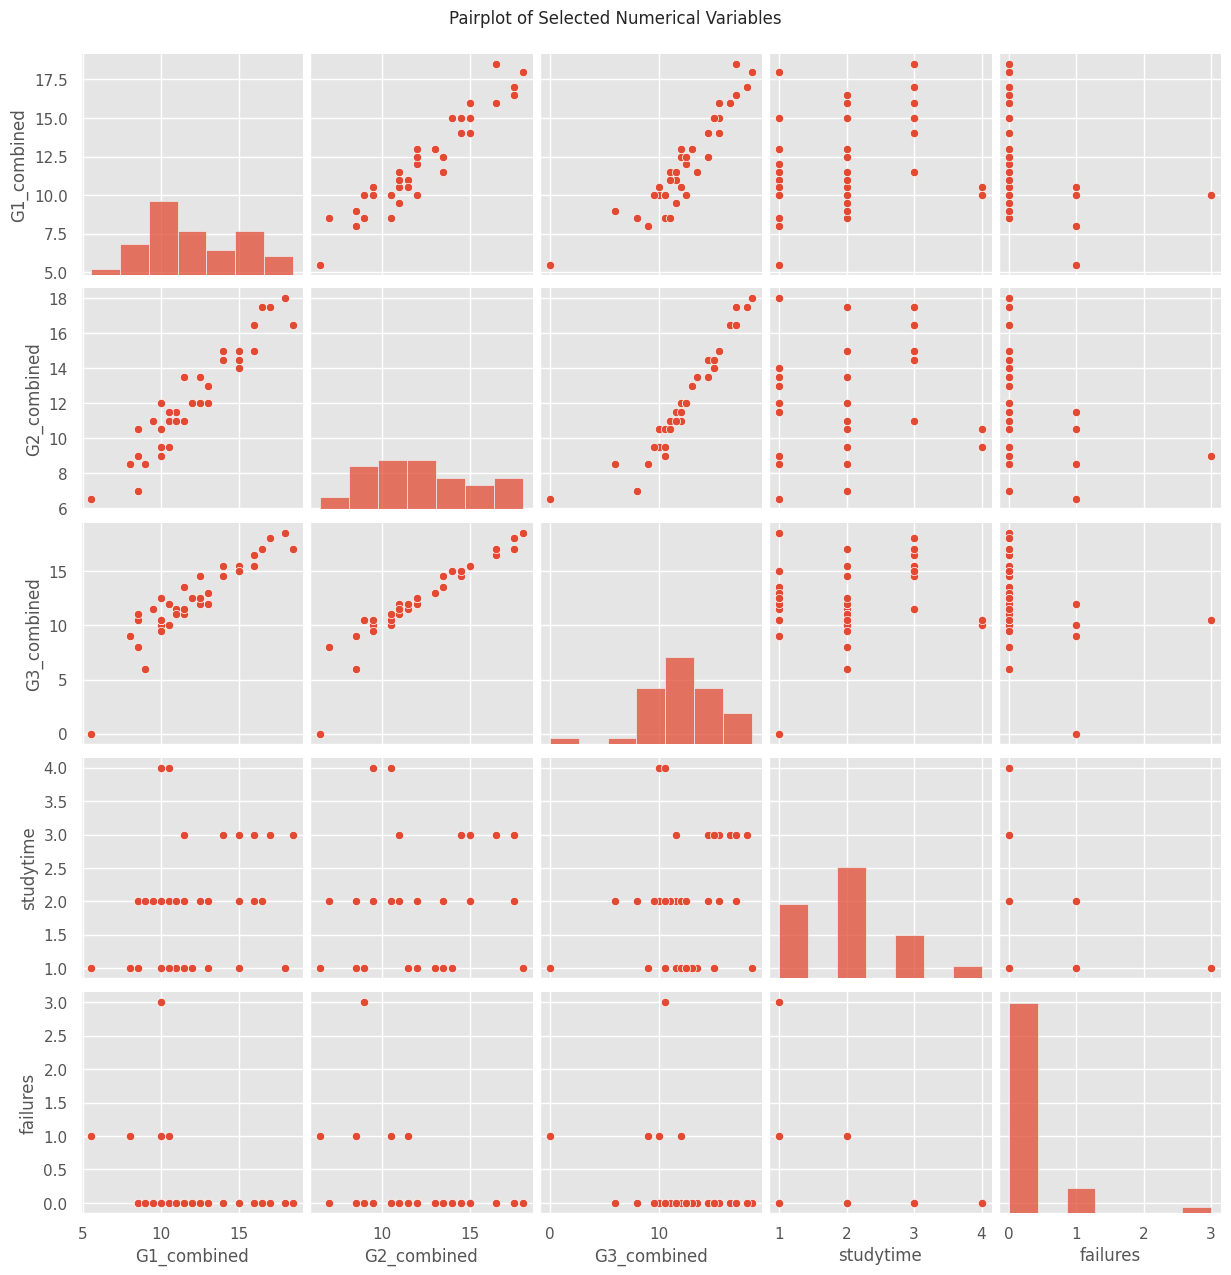

In [393]:
# Pairplot of numerical variables to visualize relationships
sns.pairplot(combined_data[['G1_combined', 'G2_combined', 'G3_combined', 'studytime', 'failures']])
plt.suptitle('Pairplot of Selected Numerical Variables', y=1.02)
plt.show()


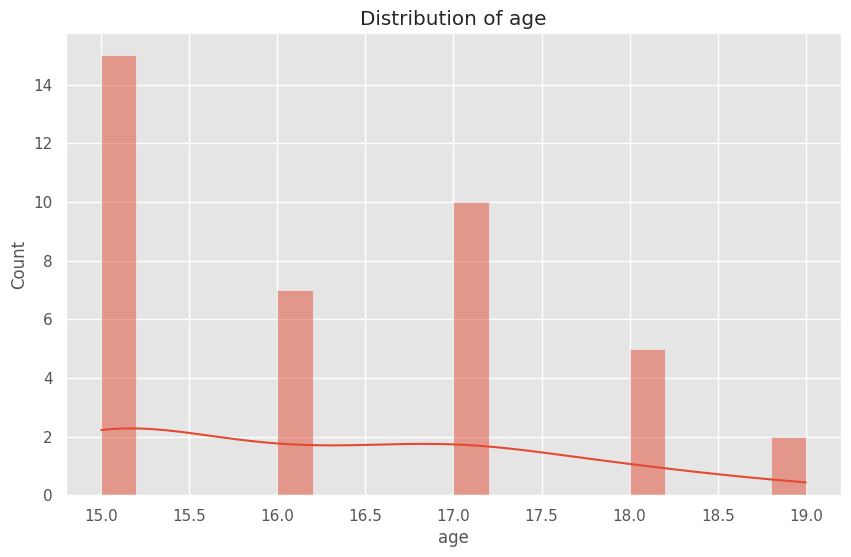

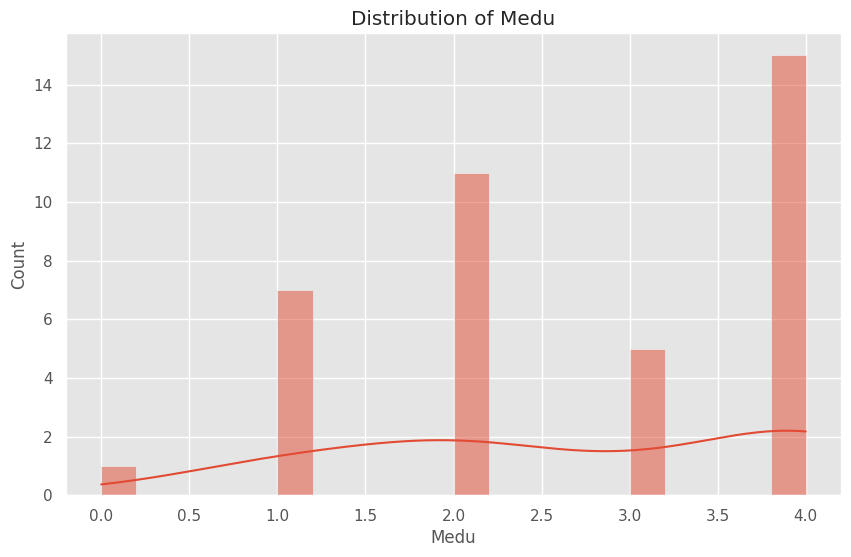

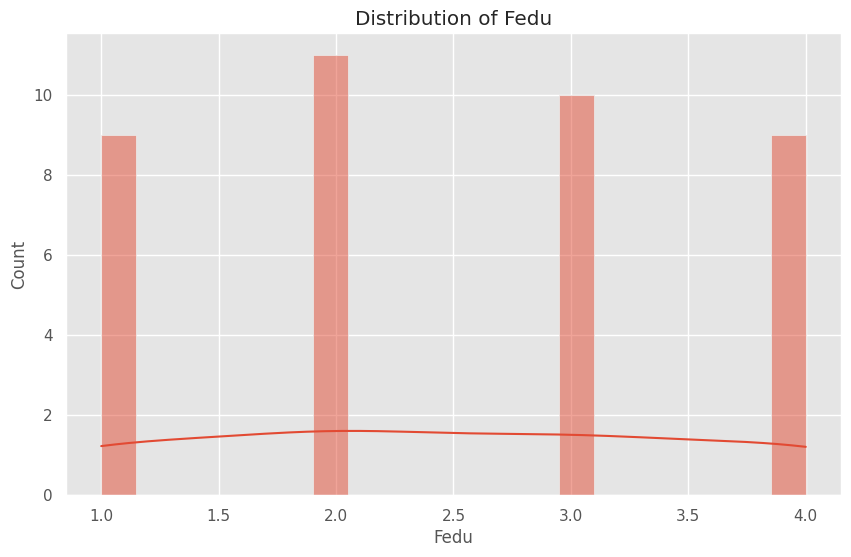

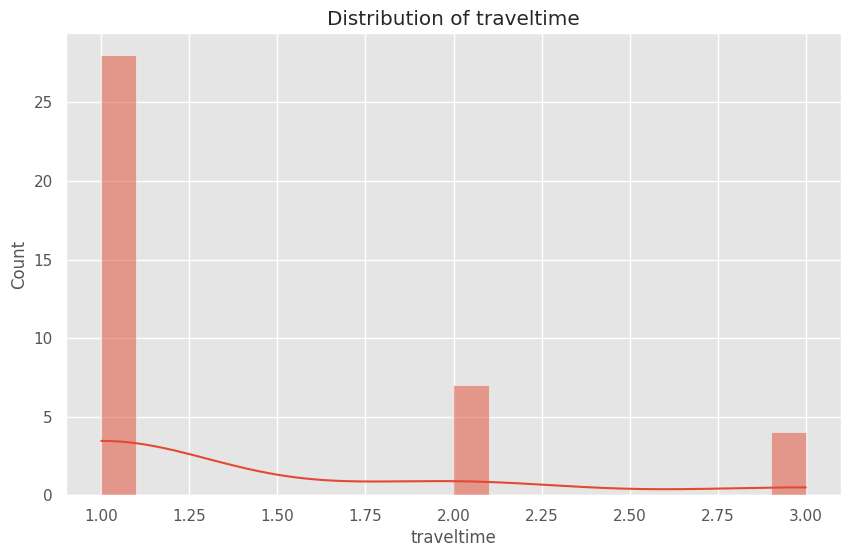

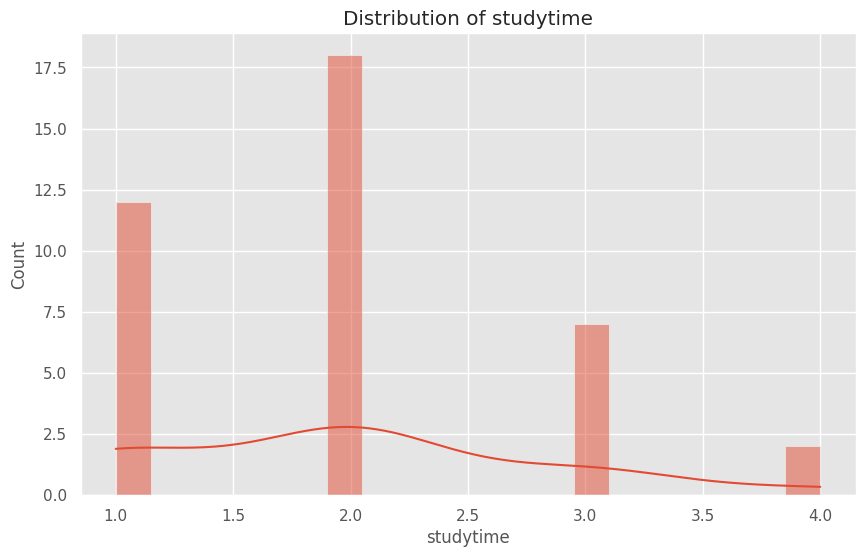

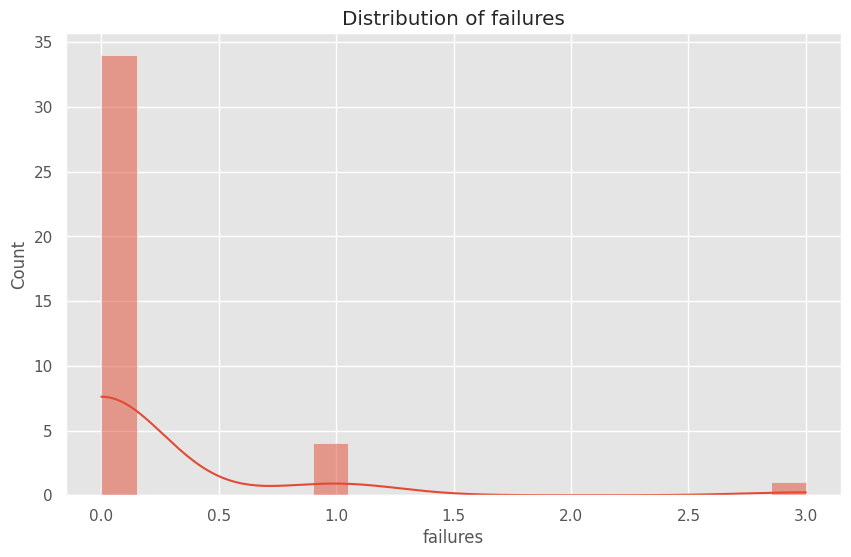

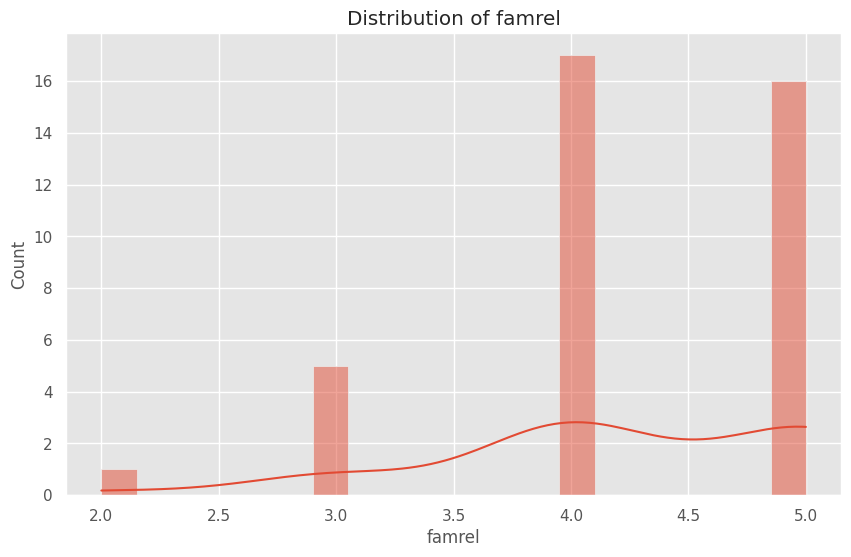

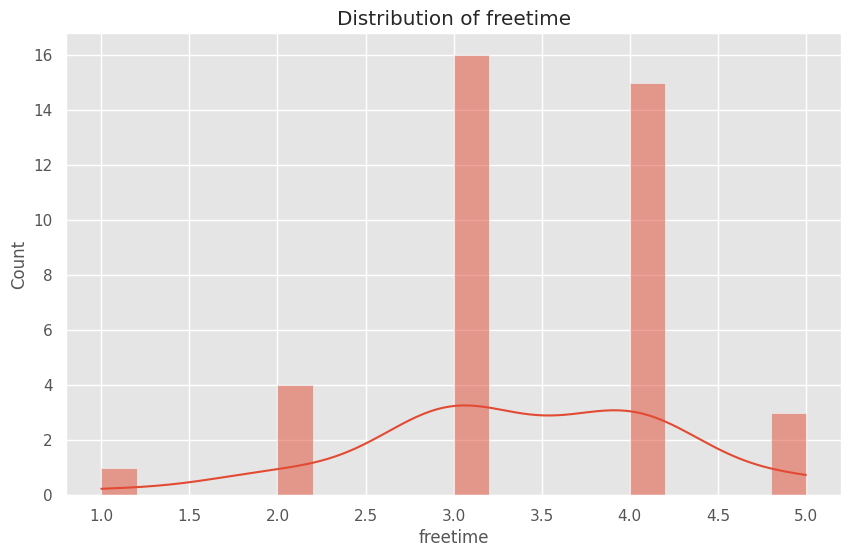

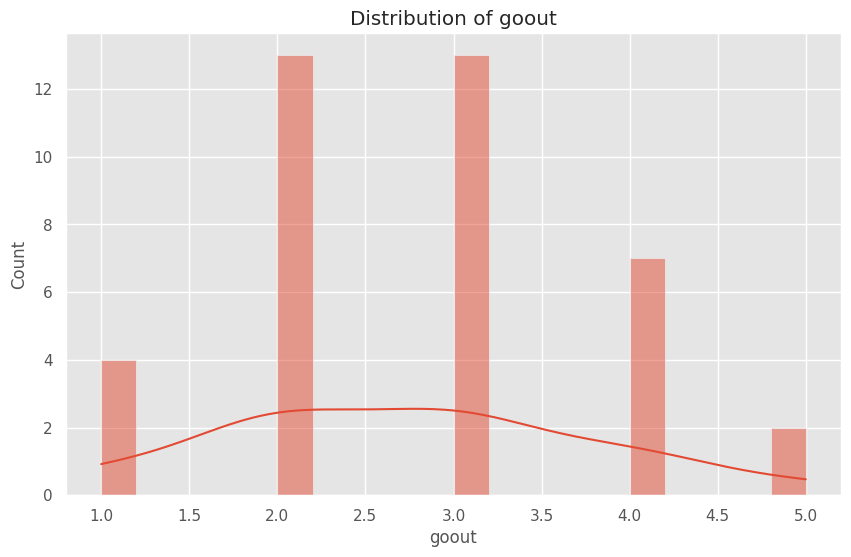

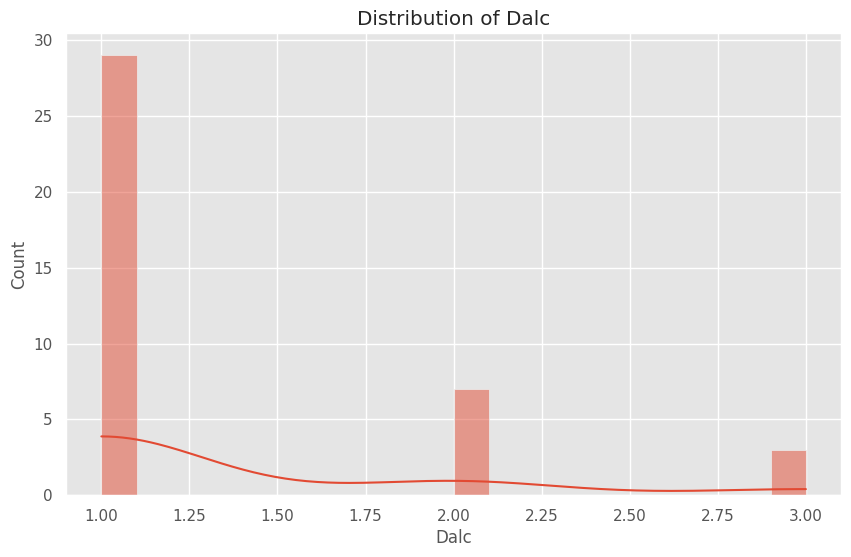

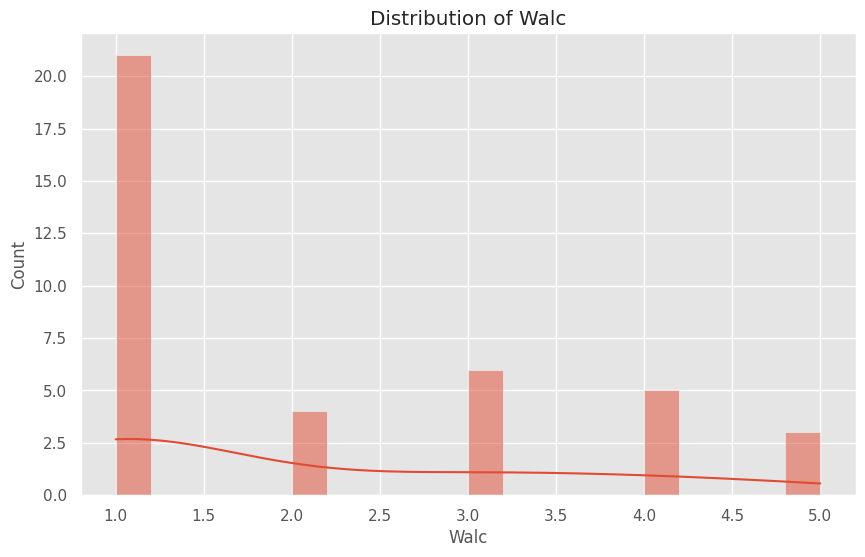

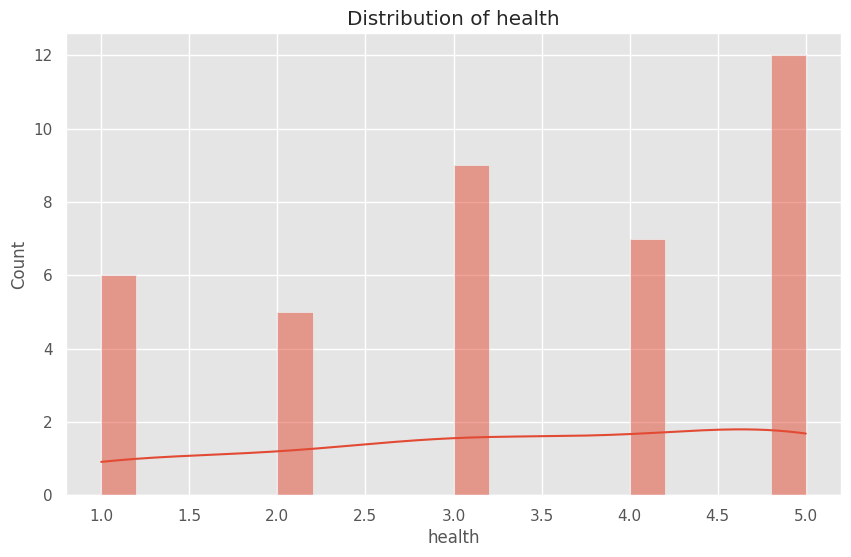

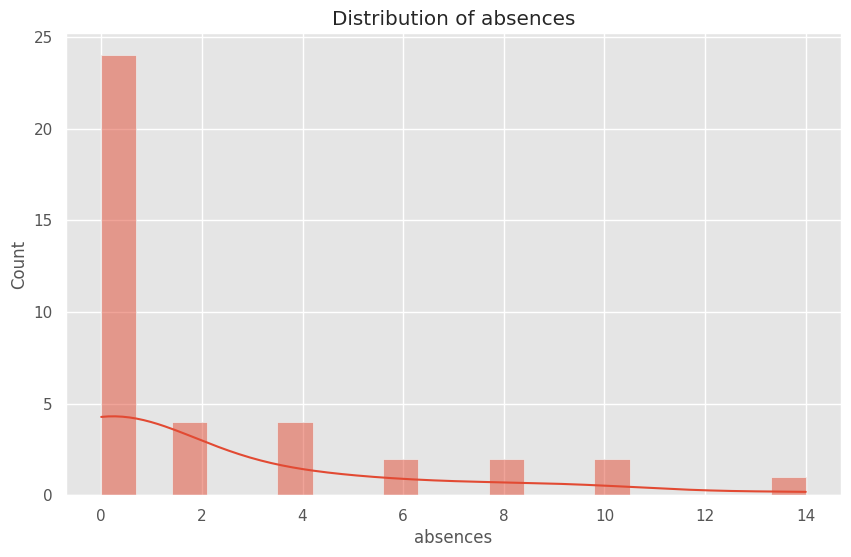

In [394]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_data[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

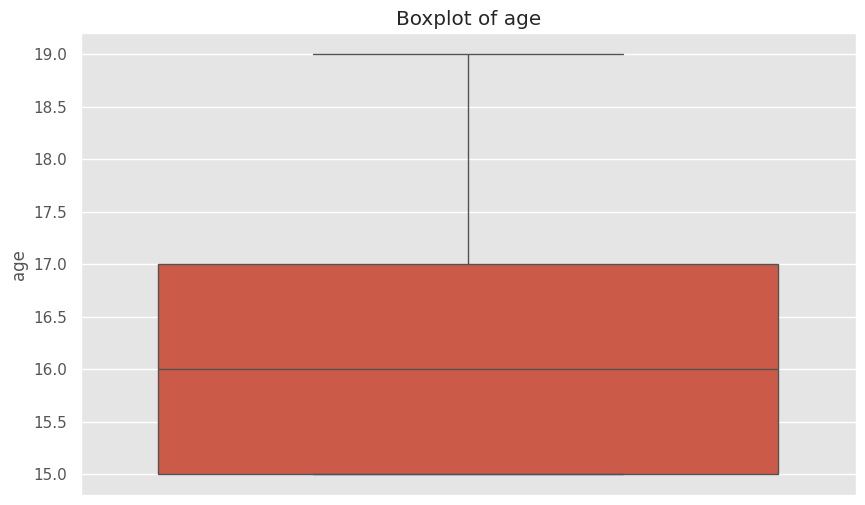

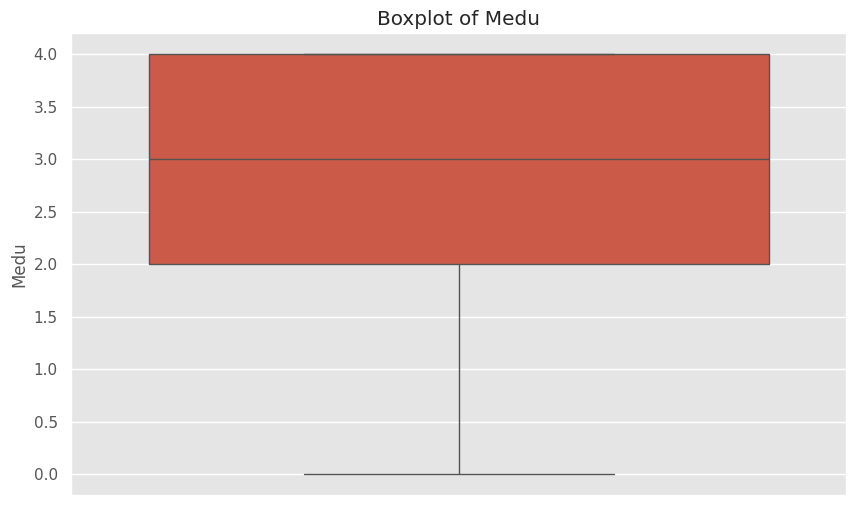

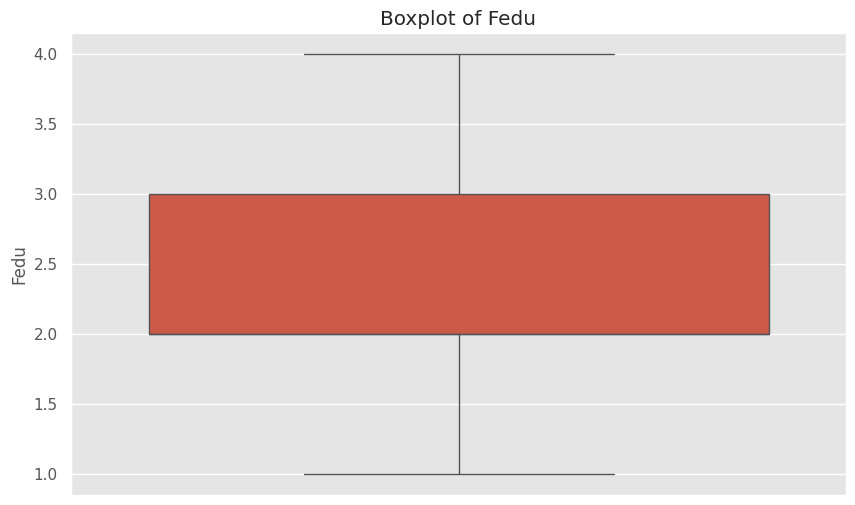

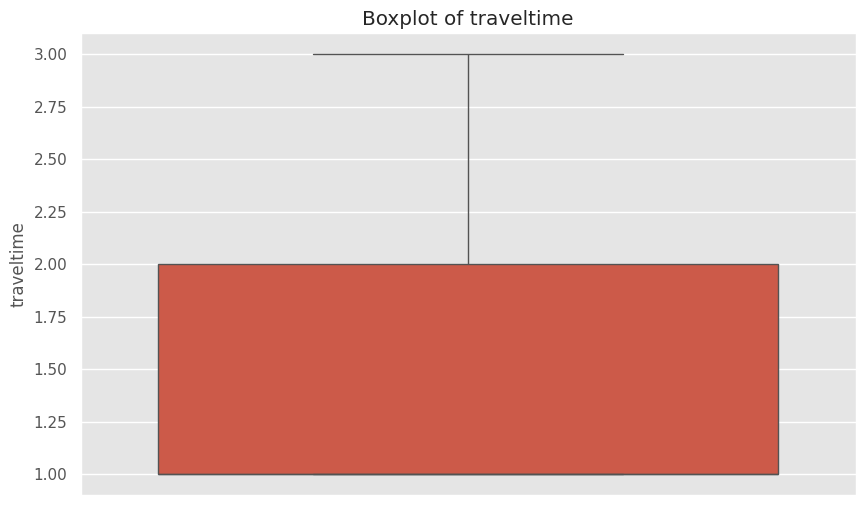

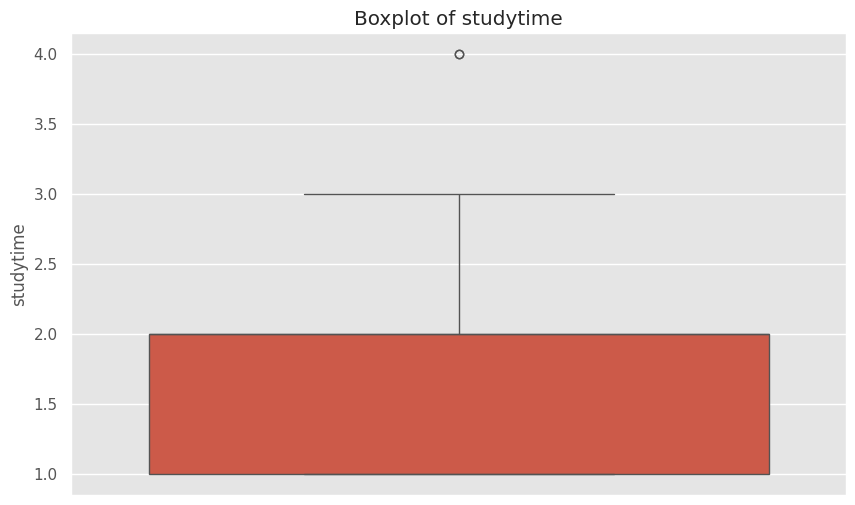

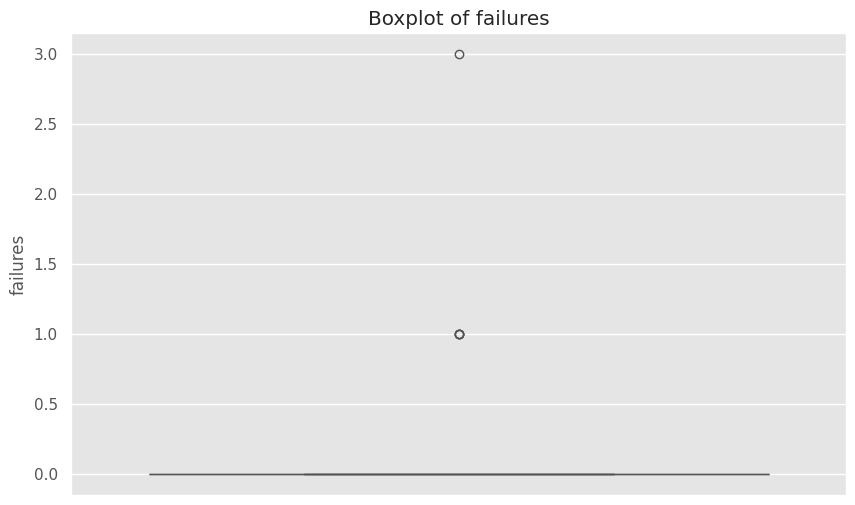

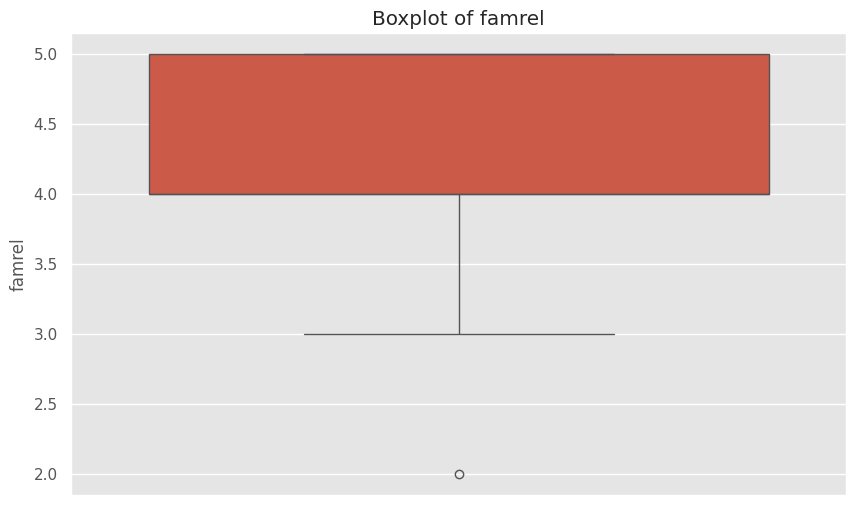

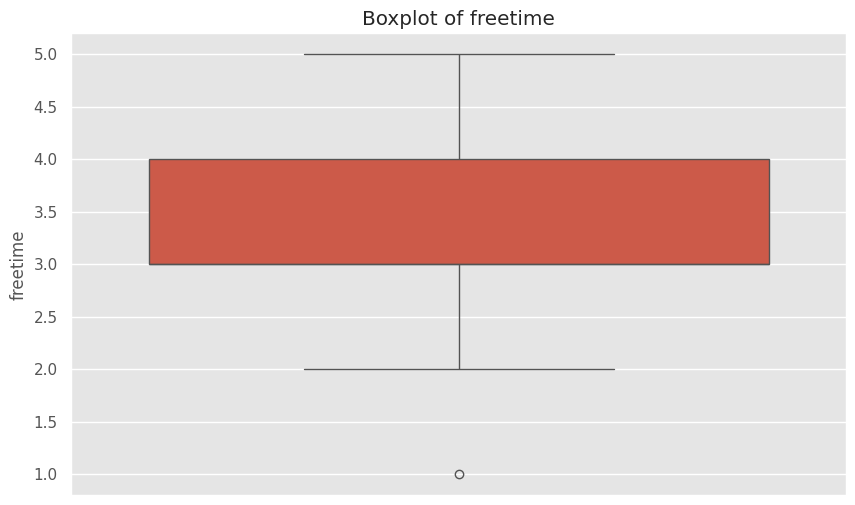

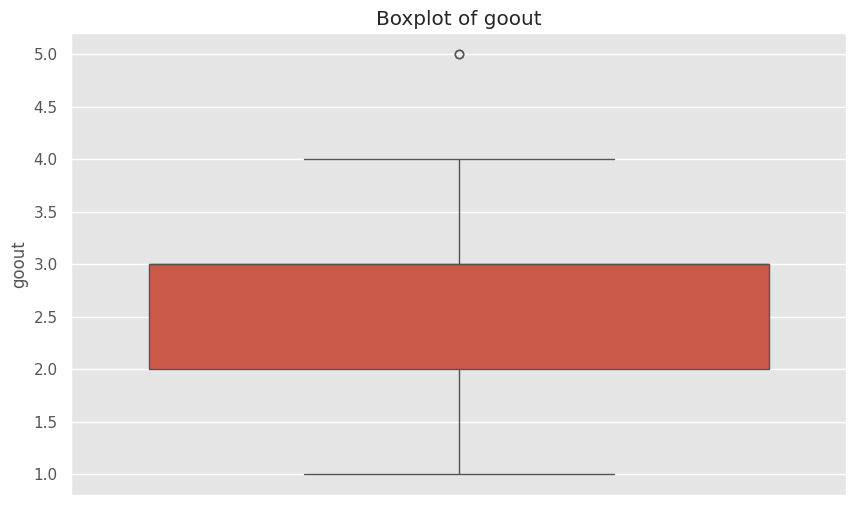

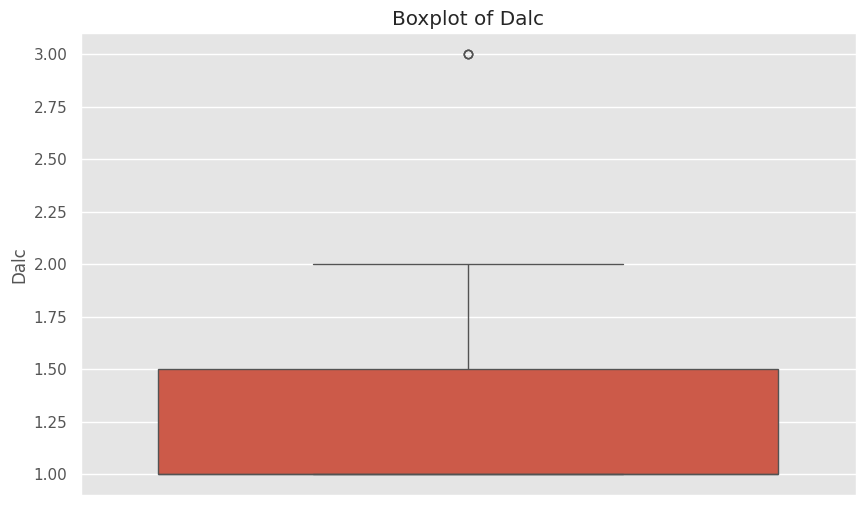

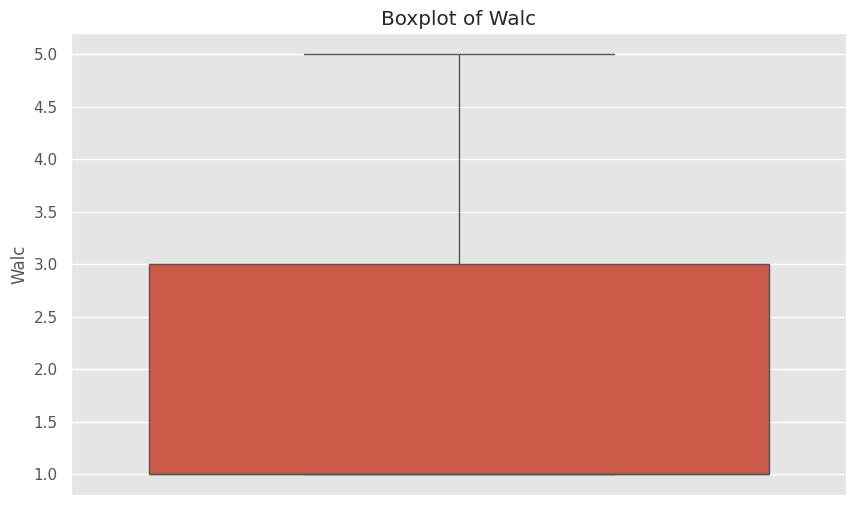

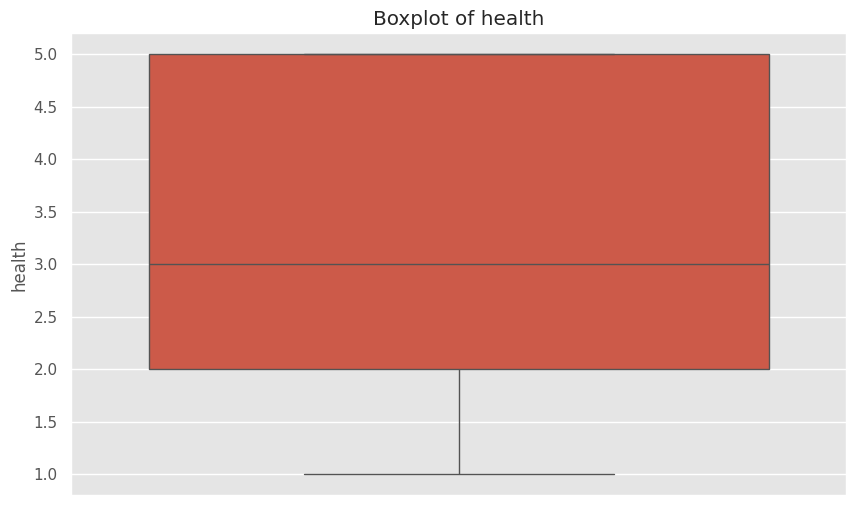

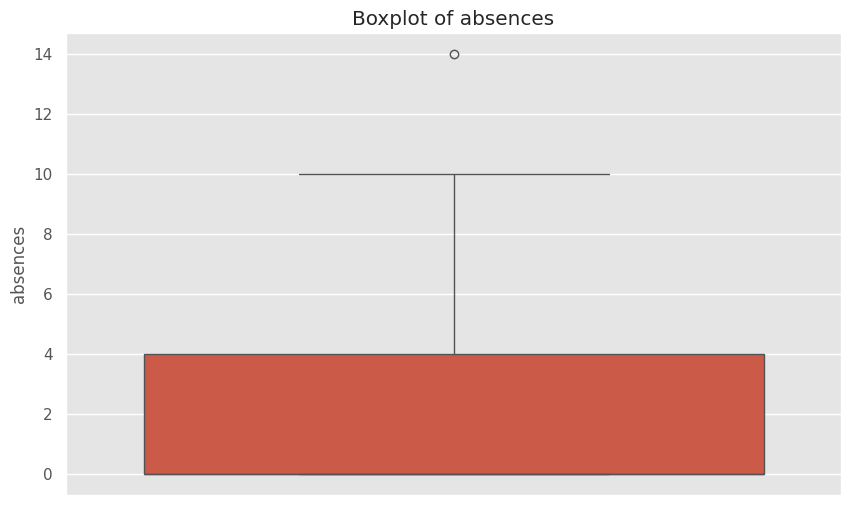

In [395]:
# Boxplots for detecting outliers in numerical variables
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=combined_data[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()


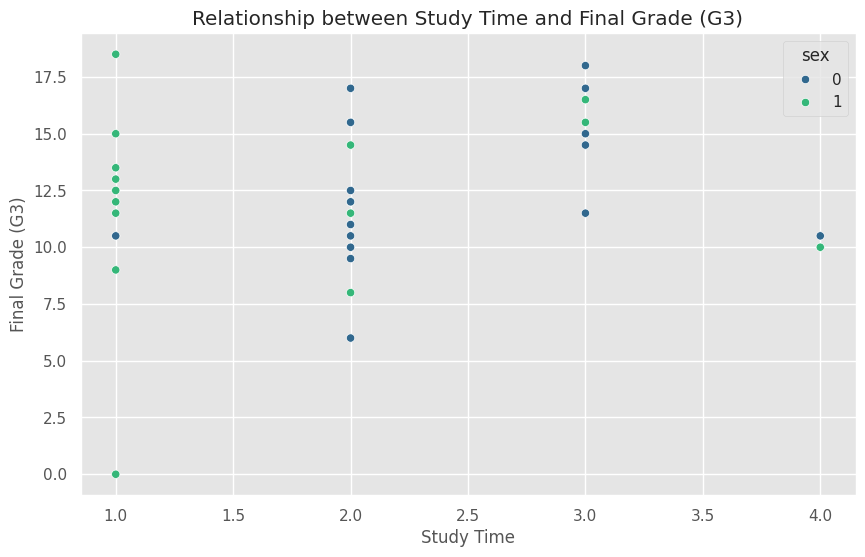

In [396]:
# Scatterplot to visualize the relationship between study time and final grade (G3)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='studytime', y='G3_combined', data=combined_data, hue='sex', palette='viridis')
plt.title('Relationship between Study Time and Final Grade (G3)')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()


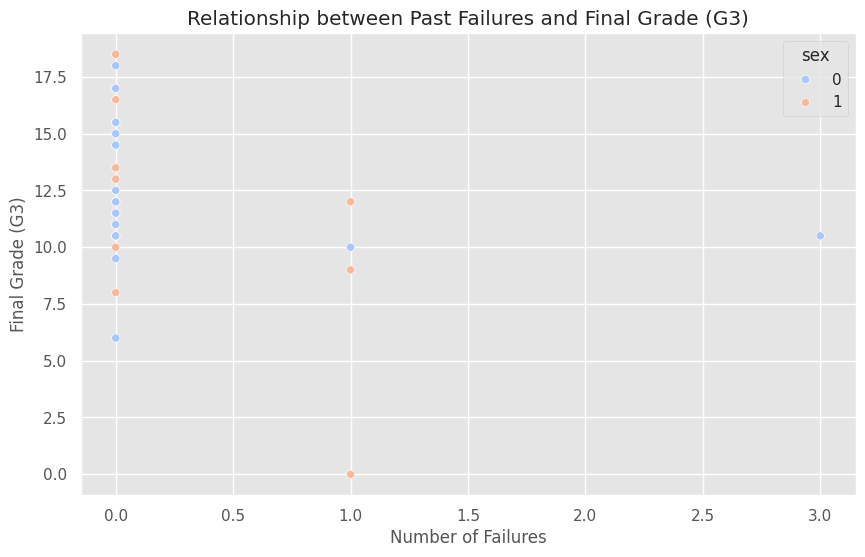

In [397]:
# Scatterplot to visualize the relationship between past failures and final grade (G3)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='failures', y='G3_combined', data=combined_data, hue='sex', palette='coolwarm')
plt.title('Relationship between Past Failures and Final Grade (G3)')
plt.xlabel('Number of Failures')
plt.ylabel('Final Grade (G3)')
plt.show()


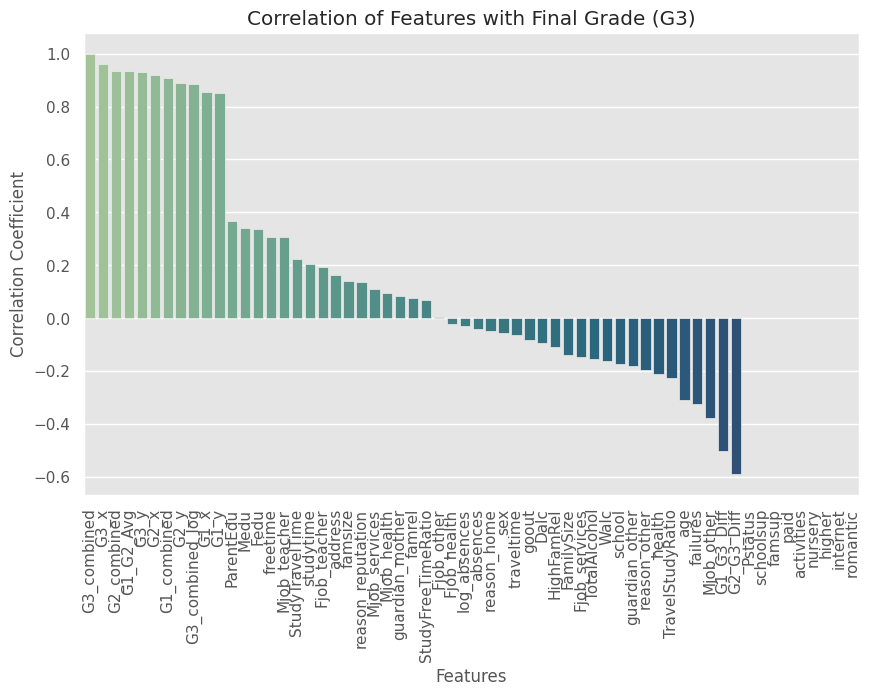

In [398]:
# Correlation of features with the target variable 'G3'
feature_correlation = combined_data.corr()['G3_combined'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_correlation.index, y=feature_correlation.values, palette='crest')
plt.title('Correlation of Features with Final Grade (G3)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()


In [399]:
X = combined_data.drop(['G1_combined', 'G2_combined', 'G3_combined'], axis=1)  # Features
y = combined_data['G3_combined']  # Target variable

In [400]:
categorical_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [401]:
print(X.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1_x',
       'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y', 'G3_combined_log', 'FamilySize',
       'ParentEdu', 'TotalAlcohol', 'StudyTravelTime', 'log_absences',
       'G1_G2_Avg', 'G1_G3_Diff', 'G2_G3_Diff', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other',
       'StudyFreeTimeRatio', 'TravelStudyRatio', 'HighFamRel'],
      dtype='object')


In [402]:
missing_cols = [col for col in categorical_cols if col not in X.columns]
print("Missing columns:", missing_cols)

Missing columns: ['Mjob', 'Fjob', 'reason', 'guardian']


In [403]:
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                    'schoolsup', 'famsup', 'paid', 'activities',
                    'nursery', 'higher', 'internet', 'romantic']

# Initialize the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the categorical data
X_encoded = onehot_encoder.fit_transform(X[categorical_cols])

# Convert the result to a DataFrame with appropriate column names
encoded_df = pd.DataFrame(X_encoded, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate with encoded columns
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# Display the first few rows to verify the changes
print(X.head())


   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   16     2     2           1          2         0       4         4      4   
1   15     2     2           1          3         0       4         5      2   
2   15     4     3           1          2         0       4         4      1   
3   15     4     4           1          1         0       5         4      2   
4   15     4     4           1          2         0       5         4      2   

   Dalc  ...  reason_reputation  guardian_mother  guardian_other  \
0     1  ...                  0                1               0   
1     1  ...                  0                0               1   
2     1  ...                  1                1               0   
3     1  ...                  0                0               0   
4     3  ...                  0                1               0   

   StudyFreeTimeRatio  TravelStudyRatio  HighFamRel  school_1  sex_1  \
0                 0.4          0.33333

In [404]:
print(X.columns)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1_x',
       'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y', 'G3_combined_log', 'FamilySize',
       'ParentEdu', 'TotalAlcohol', 'StudyTravelTime', 'log_absences',
       'G1_G2_Avg', 'G1_G3_Diff', 'G2_G3_Diff', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other',
       'StudyFreeTimeRatio', 'TravelStudyRatio', 'HighFamRel', 'school_1',
       'sex_1', 'address_1', 'famsize_1'],
      dtype='object')


In [405]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform numerical data
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [406]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing data
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')


Training data shape: (31, 48)
Test data shape: (8, 48)


In [407]:
print(X.dtypes)


age                   float64
Medu                  float64
Fedu                  float64
traveltime            float64
studytime             float64
failures              float64
famrel                float64
freetime              float64
goout                 float64
Dalc                  float64
Walc                  float64
health                float64
absences              float64
G1_x                    int64
G2_x                    int64
G3_x                    int64
G1_y                    int64
G2_y                    int64
G3_y                    int64
G3_combined_log       float64
FamilySize              int64
ParentEdu               int64
TotalAlcohol            int64
StudyTravelTime         int64
log_absences          float64
G1_G2_Avg             float64
G1_G3_Diff            float64
G2_G3_Diff            float64
Mjob_health             int64
Mjob_other              int64
Mjob_services           int64
Mjob_teacher            int64
Fjob_health             int64
Fjob_other

## LinearRegression

Mean Absolute Error:  0.014542996094699001
Mean Squared Error:  0.0002962863681110863
Root Mean Squared Error:  0.017212970926341747
R² on Test data:  0.9999320346682469


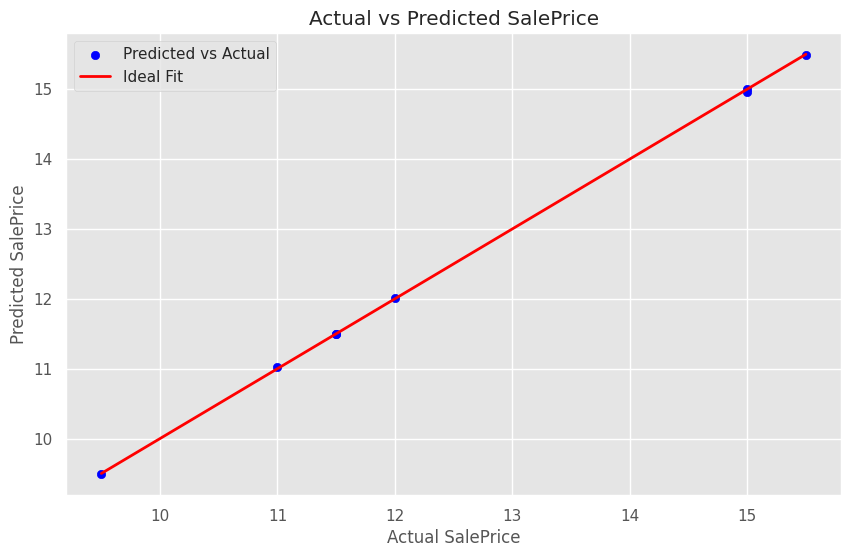

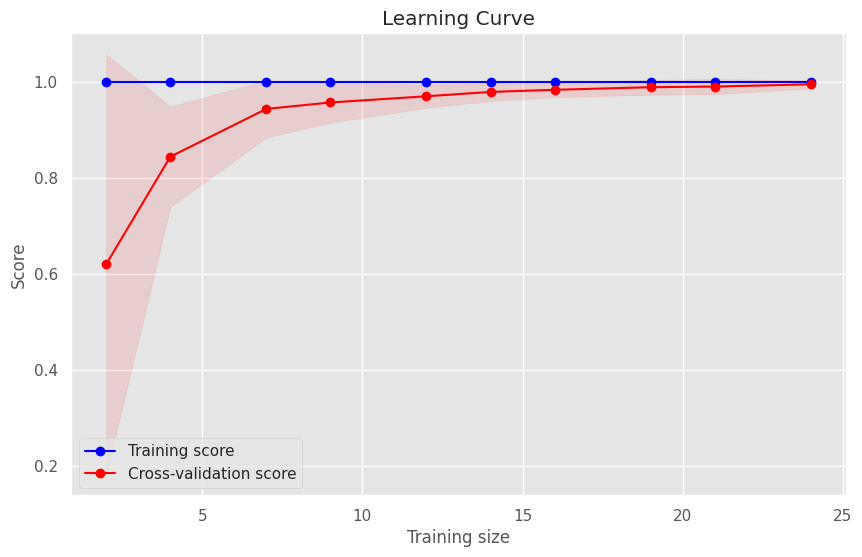

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


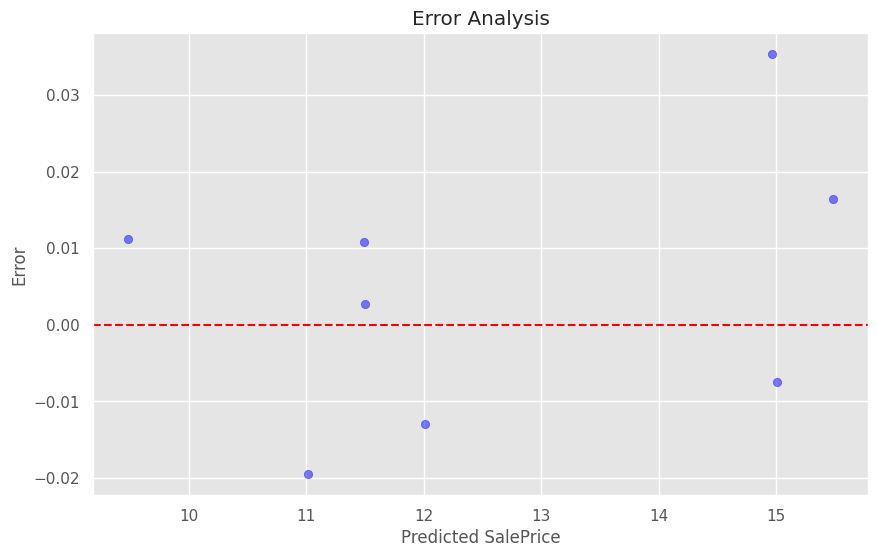

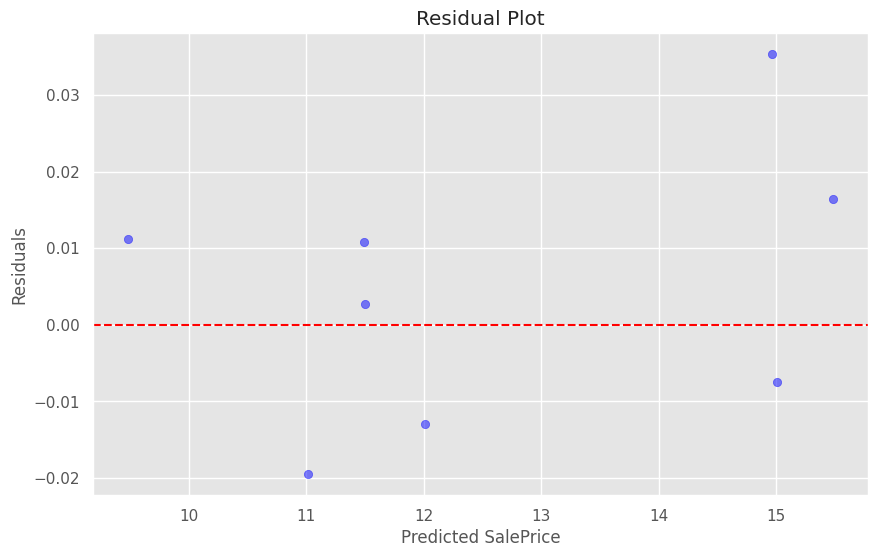

Random State 0:
Mean Absolute Error:  0.025669558810249054
Mean Squared Error:  0.0012429266713529397
Root Mean Squared Error:  0.03525516517267987
R² on Test data:  0.9998319423092256

Random State 1:
Mean Absolute Error:  0.03548637694577561
Mean Squared Error:  0.0018285338353536832
Root Mean Squared Error:  0.04276135913828843
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043237
Mean Squared Error:  0.0012368856317090916
Root Mean Squared Error:  0.03516938486395649
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.2529480559586771
Mean Squared Error:  0.2595729978853824
Root Mean Squared Error:  0.5094830692823682
R² on Test data:  0.9871507350651444

Random State 4:
Mean Absolute Error:  0.13808414828380278
Mean Squared Error:  0.0703261485760362
Root Mean Squared Error:  0.26519077769793614
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [408]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve, train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test data
X_test_prediction = lr.predict(X_test)

# Mean Absolute Error
mae = mean_absolute_error(y_test, X_test_prediction)
print('Mean Absolute Error: ', mae)

# Mean Squared Error
mse = mean_squared_error(y_test, X_test_prediction)
print('Mean Squared Error: ', mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error: ', rmse)

# R² Score
test_data_r2 = r2_score(y_test, X_test_prediction)
print('R² on Test data: ', test_data_r2)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, X_test_prediction, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()

# Plot Learning Curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    # Plot the std deviation as a shaded area
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

# Error Analysis
errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

# Residual Analysis
plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Robustness Checks
for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()

# Comparison with Baseline
baseline_prediction = np.mean(y_train)  # or np.median(y_train)
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## KNN model

Best parameters for KNN:  {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best score for KNN:  -3.128279869321661
Best RMSE for KNN:  1.768694396814119

Training Data Metrics for KNN:
Mean Absolute Error:  0.0
Mean Squared Error:  0.0
Root Mean Squared Error:  0.0
R2 Score:  1.0

Test Data Metrics for KNN:
Mean Absolute Error:  0.3067172504605695
Mean Squared Error:  0.1865688377860029
Root Mean Squared Error:  0.43193615012638487
R2 Score:  0.9572028472462215


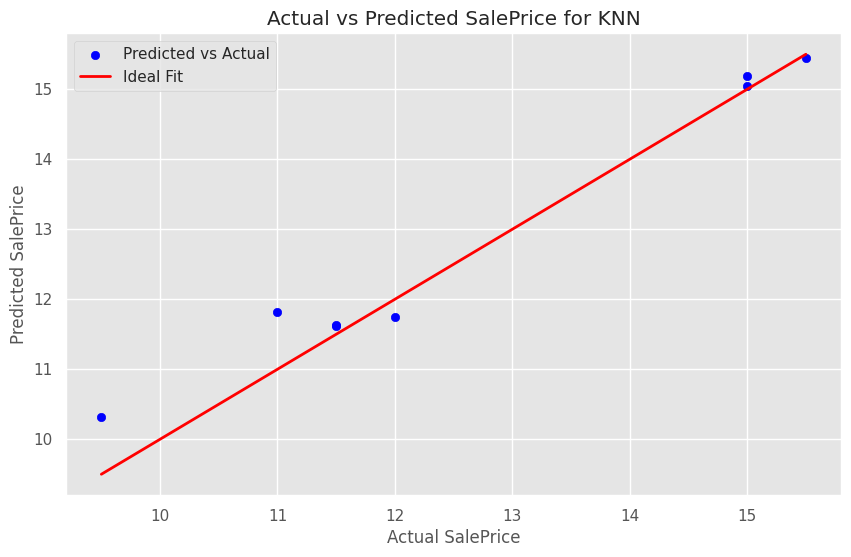

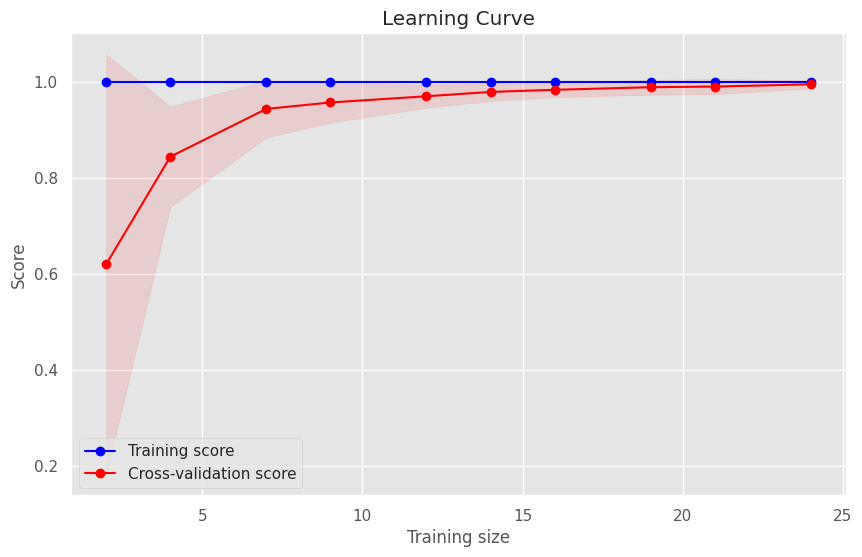

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


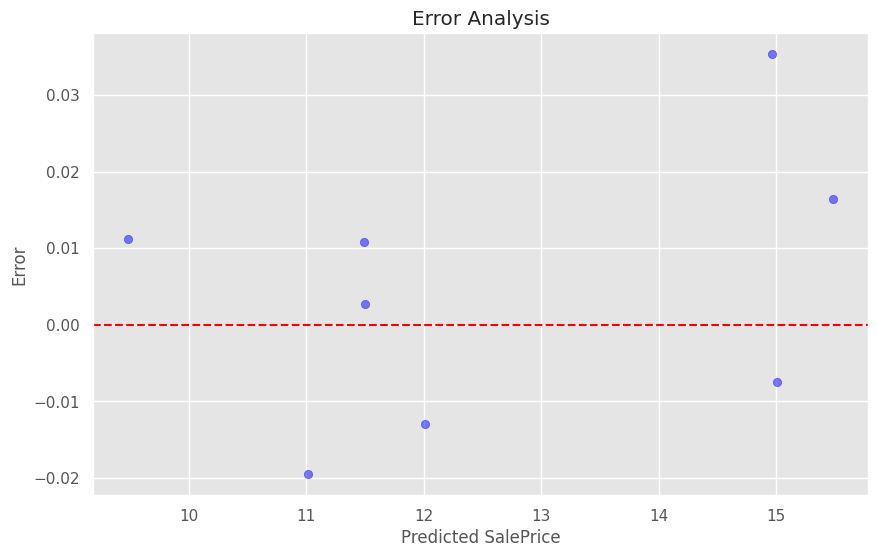

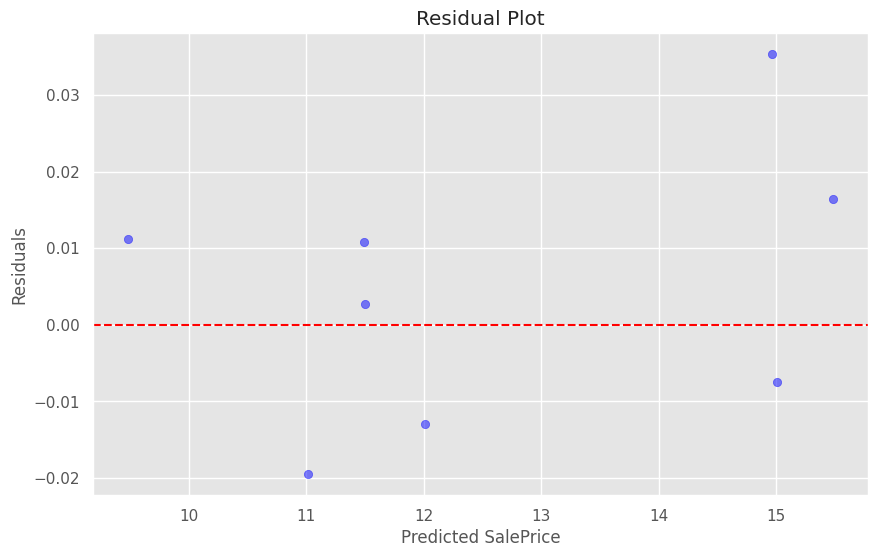

Random State 0:
Mean Absolute Error:  0.025669558810249054
Mean Squared Error:  0.0012429266713529397
Root Mean Squared Error:  0.03525516517267987
R² on Test data:  0.9998319423092256

Random State 1:
Mean Absolute Error:  0.03548637694577561
Mean Squared Error:  0.0018285338353536832
Root Mean Squared Error:  0.04276135913828843
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043237
Mean Squared Error:  0.0012368856317090916
Root Mean Squared Error:  0.03516938486395649
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.2529480559586771
Mean Squared Error:  0.2595729978853824
Root Mean Squared Error:  0.5094830692823682
R² on Test data:  0.9871507350651444

Random State 4:
Mean Absolute Error:  0.13808414828380278
Mean Squared Error:  0.0703261485760362
Root Mean Squared Error:  0.26519077769793614
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [409]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
# Define the KNN model
knn = KNeighborsRegressor()

# Define the parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 100],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
knn_cv = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
knn_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for KNN: ", knn_cv.best_params_)
print("Best score for KNN: ", knn_cv.best_score_)
print("Best RMSE for KNN: ", np.sqrt(-1 * knn_cv.best_score_))

# Get the best estimator
best_knn = knn_cv.best_estimator_

# Predict on training data
y_train_pred = best_knn.predict(X_train)

# Predict on test data
y_test_pred = best_knn.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for KNN:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for KNN:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for KNN')
plt.legend()
plt.show()
# Plot Learning Curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    # Plot the std deviation as a shaded area
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

# Error Analysis
errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

# Residual Analysis
plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Robustness Checks
for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()

# Comparison with Baseline
baseline_prediction = np.mean(y_train)  # or np.median(y_train)
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## SVM model

Best parameters for SVM:  {'C': 6.086584841970366, 'degree': 5, 'gamma': 46.41588833612773, 'kernel': 'linear'}
Best score for SVM:  -0.21285867403544884
Best RMSE for SVM:  0.4613660954550614

Training Data Metrics for SVM:
Mean Absolute Error:  0.06876029516673413
Mean Squared Error:  0.006100169846748682
Root Mean Squared Error:  0.07810358408388621
R2 Score:  0.9995533513735066

Test Data Metrics for SVM:
Mean Absolute Error:  0.04794595416642755
Mean Squared Error:  0.003419930461450527
Root Mean Squared Error:  0.05848017152377827
R2 Score:  0.9992154998224629


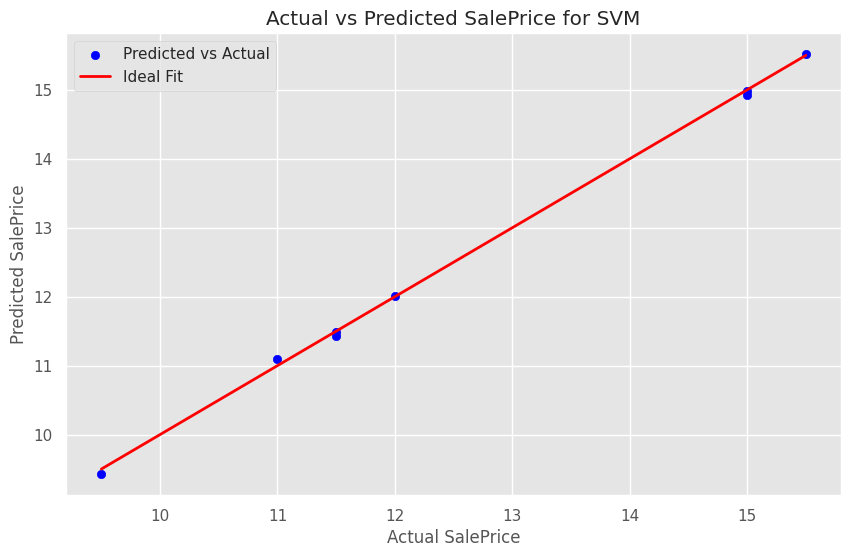

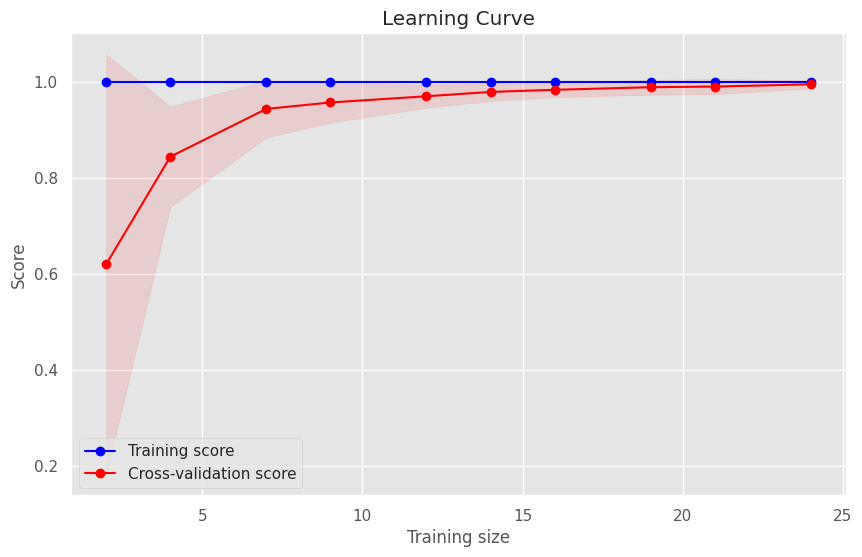

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


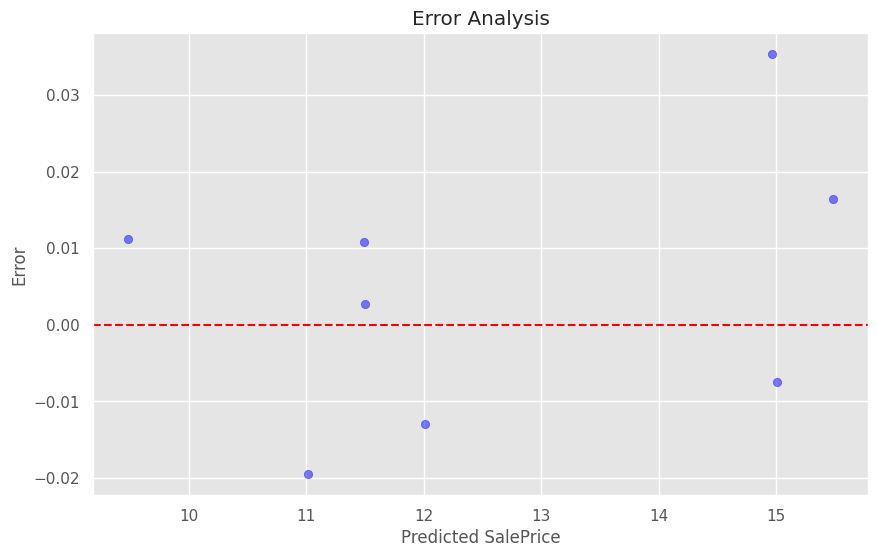

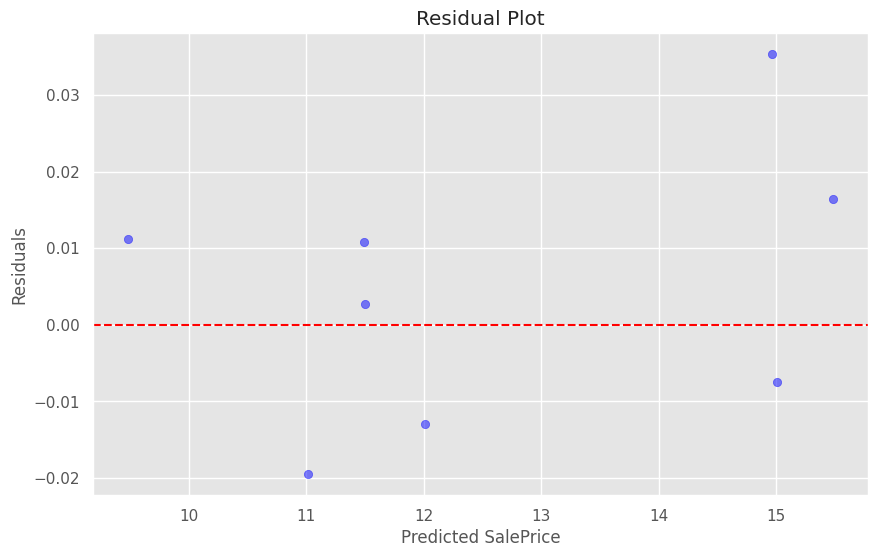

Random State 0:
Mean Absolute Error:  0.025669558810249054
Mean Squared Error:  0.0012429266713529397
Root Mean Squared Error:  0.03525516517267987
R² on Test data:  0.9998319423092256

Random State 1:
Mean Absolute Error:  0.03548637694577561
Mean Squared Error:  0.0018285338353536832
Root Mean Squared Error:  0.04276135913828843
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043237
Mean Squared Error:  0.0012368856317090916
Root Mean Squared Error:  0.03516938486395649
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.2529480559586771
Mean Squared Error:  0.2595729978853824
Root Mean Squared Error:  0.5094830692823682
R² on Test data:  0.9871507350651444

Random State 4:
Mean Absolute Error:  0.13808414828380278
Mean Squared Error:  0.0703261485760362
Root Mean Squared Error:  0.26519077769793614
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [410]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import matplotlib.pyplot as plt

# Define the SVM model
svm = SVR()

# Define the parameter distributions for RandomizedSearchCV
param_dist_svm = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 10)),
    'degree': [3, 4, 5]
}

# Initialize RandomizedSearchCV
svm_random_search = RandomizedSearchCV(svm, param_distributions=param_dist_svm, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
svm_random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for SVM: ", svm_random_search.best_params_)
print("Best score for SVM: ", svm_random_search.best_score_)
print("Best RMSE for SVM: ", np.sqrt(-1 * svm_random_search.best_score_))

# Get the best estimator
best_svm = svm_random_search.best_estimator_

# Predict on training data
y_train_pred = best_svm.predict(X_train)

# Predict on test data
y_test_pred = best_svm.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for SVM:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for SVM:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for SVM')
plt.legend()
plt.show()
# Plot Learning Curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    # Plot the std deviation as a shaded area
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

# Error Analysis
errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

# Residual Analysis
plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Robustness Checks
for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()

# Comparison with Baseline
baseline_prediction = np.mean(y_train)  # or np.median(y_train)
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## Decision Tree model

Best parameters for Decision Tree:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree:  -3.7566980820105824
Best RMSE for Decision Tree:  1.9382203388703212

Training Data Metrics for Decision Tree:
Mean Absolute Error:  0.24731182795698922
Mean Squared Error:  0.21908602150537634
Root Mean Squared Error:  0.46806625760182324
R2 Score:  0.9839587301587301

Test Data Metrics for Decision Tree:
Mean Absolute Error:  1.0625
Mean Squared Error:  2.0625
Root Mean Squared Error:  1.4361406616345072
R2 Score:  0.5268817204301075


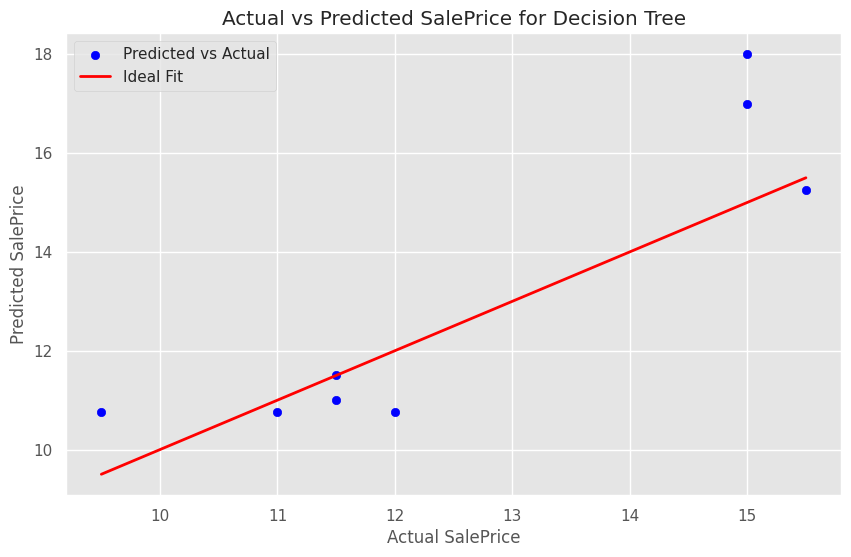

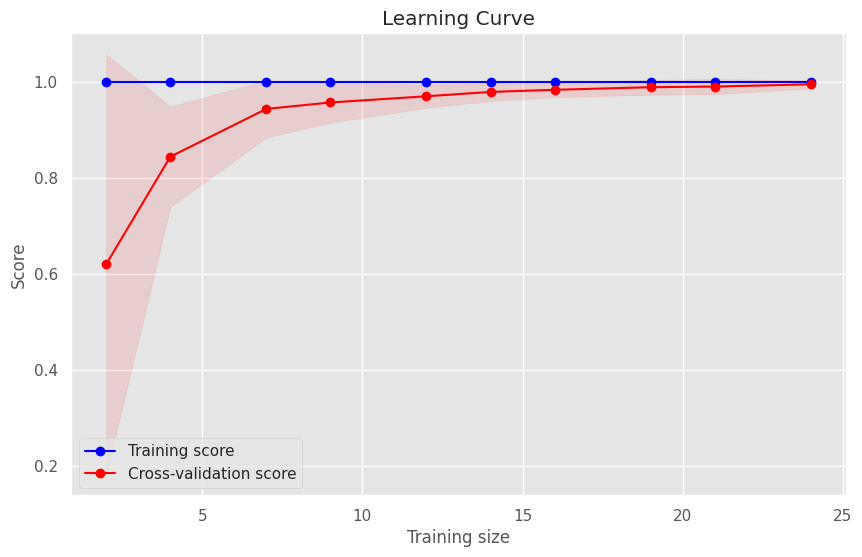

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


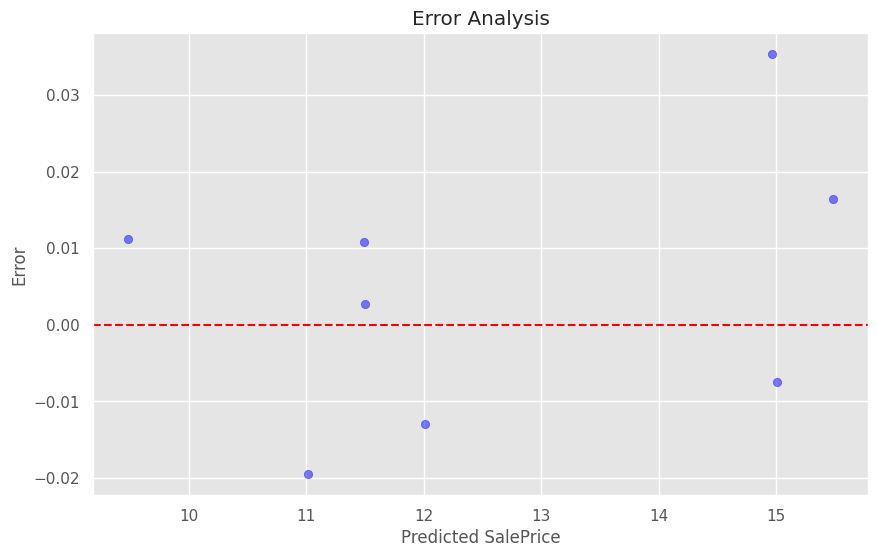

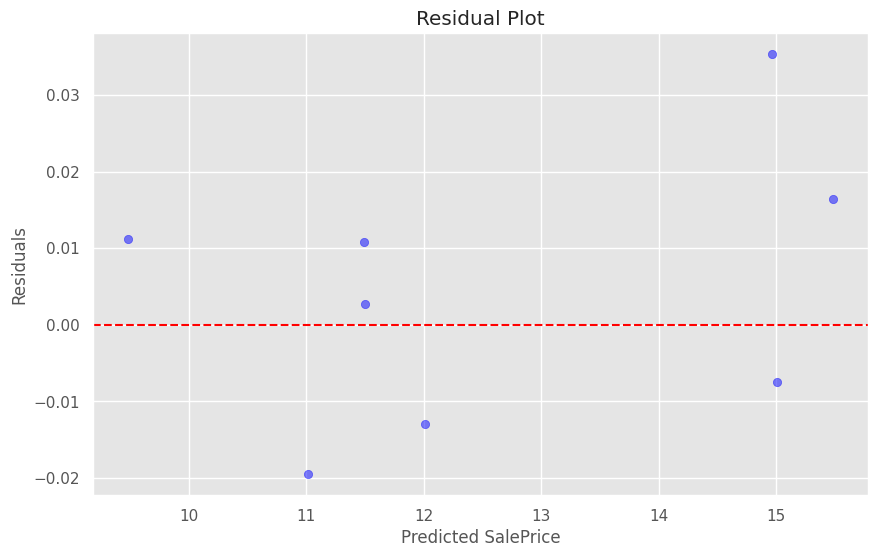

Random State 0:
Mean Absolute Error:  0.025669558810249054
Mean Squared Error:  0.0012429266713529397
Root Mean Squared Error:  0.03525516517267987
R² on Test data:  0.9998319423092256

Random State 1:
Mean Absolute Error:  0.03548637694577561
Mean Squared Error:  0.0018285338353536832
Root Mean Squared Error:  0.04276135913828843
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043237
Mean Squared Error:  0.0012368856317090916
Root Mean Squared Error:  0.03516938486395649
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.2529480559586771
Mean Squared Error:  0.2595729978853824
Root Mean Squared Error:  0.5094830692823682
R² on Test data:  0.9871507350651444

Random State 4:
Mean Absolute Error:  0.13808414828380278
Mean Squared Error:  0.0703261485760362
Root Mean Squared Error:  0.26519077769793614
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [411]:
from sklearn.tree import DecisionTreeRegressor


# Define the Decision Tree model
dt = DecisionTreeRegressor(random_state=13)

# Define the parameter grid for GridSearchCV
param_grid_dt = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}
dt_cv = GridSearchCV(dt, param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
dt_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Decision Tree: ", dt_cv.best_params_)
print("Best score for Decision Tree: ", dt_cv.best_score_)
print("Best RMSE for Decision Tree: ", np.sqrt(-1 * dt_cv.best_score_))

# Get the best estimator
best_dt = dt_cv.best_estimator_

# Predict on training data
y_train_pred = best_dt.predict(X_train)

# Predict on test data
y_test_pred = best_dt.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for Decision Tree:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for Decision Tree:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for Decision Tree')
plt.legend()
plt.show()
# Plot Learning Curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    # Plot the std deviation as a shaded area
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

# Error Analysis
errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

# Residual Analysis
plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Robustness Checks
for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()

# Comparison with Baseline
baseline_prediction = np.mean(y_train)  # or np.median(y_train)
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## ElasticNet model

Best parameters for ElasticNet:  {'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 1000}
Best score for ElasticNet:  -9.999196826267734e-05
Best RMSE for ElasticNet:  0.009999598405069943

Training Data Metrics for ElasticNet:
Mean Absolute Error:  0.002033774606903274
Mean Squared Error:  8.022300674751554e-06
Root Mean Squared Error:  0.0028323666208228686
R2 Score:  0.9999994126147849

Test Data Metrics for ElasticNet:
Mean Absolute Error:  0.0012222716654719523
Mean Squared Error:  1.9684640536473024e-06
Root Mean Squared Error:  0.0014030196198369083
R2 Score:  0.9999995484526902


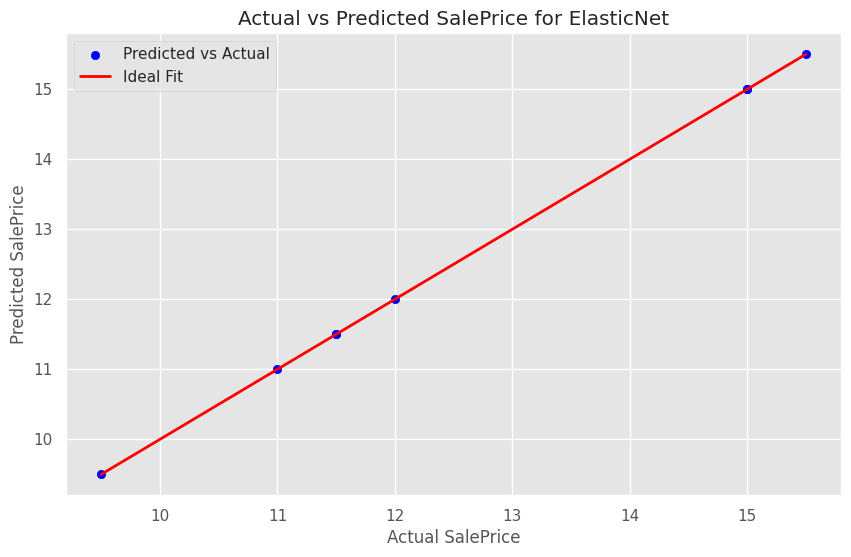

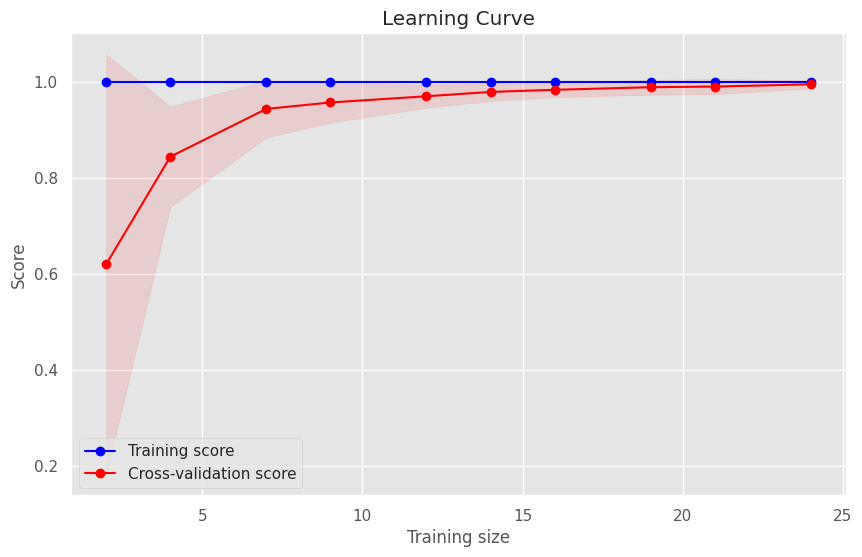

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


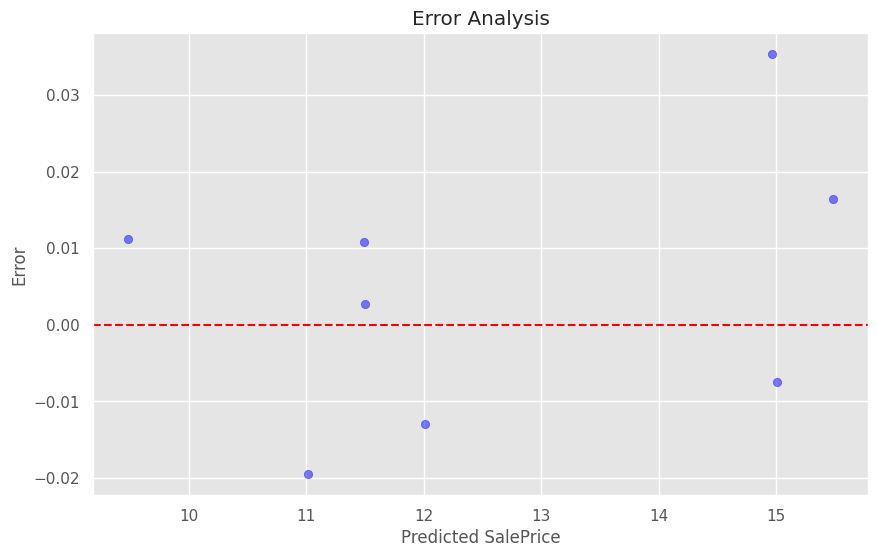

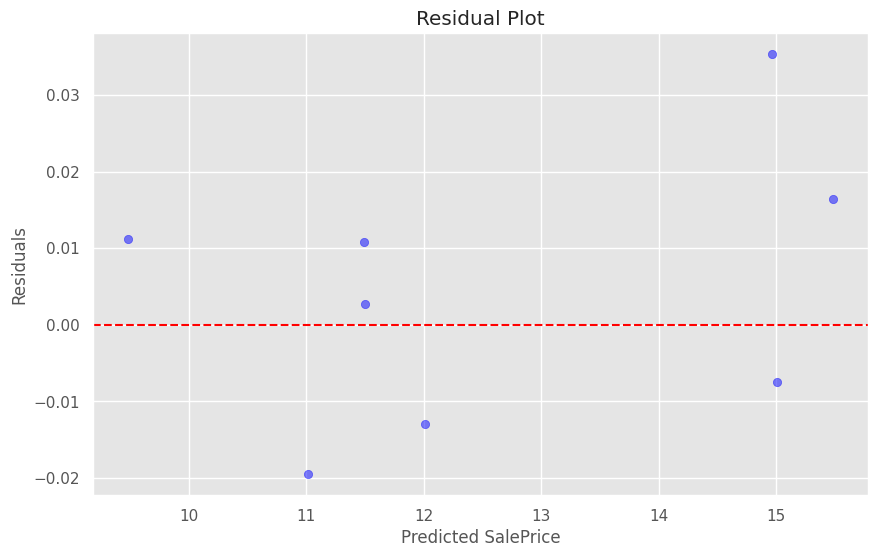

Random State 0:
Mean Absolute Error:  0.025669558810249054
Mean Squared Error:  0.0012429266713529397
Root Mean Squared Error:  0.03525516517267987
R² on Test data:  0.9998319423092256

Random State 1:
Mean Absolute Error:  0.03548637694577561
Mean Squared Error:  0.0018285338353536832
Root Mean Squared Error:  0.04276135913828843
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043237
Mean Squared Error:  0.0012368856317090916
Root Mean Squared Error:  0.03516938486395649
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.2529480559586771
Mean Squared Error:  0.2595729978853824
Root Mean Squared Error:  0.5094830692823682
R² on Test data:  0.9871507350651444

Random State 4:
Mean Absolute Error:  0.13808414828380278
Mean Squared Error:  0.0703261485760362
Root Mean Squared Error:  0.26519077769793614
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [412]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define the ElasticNet model
elasticnet = ElasticNet(random_state=13)

# Define the parameter grid for GridSearchCV
param_grid_en = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9],
    'max_iter': [1000, 2000, 3000]
}
en_cv = GridSearchCV(elasticnet, param_grid_en, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
en_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for ElasticNet: ", en_cv.best_params_)
print("Best score for ElasticNet: ", en_cv.best_score_)
print("Best RMSE for ElasticNet: ", np.sqrt(-1 * en_cv.best_score_))

# Get the best estimator
best_en = en_cv.best_estimator_

# Predict on training data
y_train_pred = best_en.predict(X_train)

# Predict on test data
y_test_pred = best_en.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for ElasticNet:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for ElasticNet:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for ElasticNet')
plt.legend()
plt.show()
# Plot Learning Curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    # Plot the std deviation as a shaded area
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

# Error Analysis
errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

# Residual Analysis
plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Robustness Checks
for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()

# Comparison with Baseline
baseline_prediction = np.mean(y_train)  # or np.median(y_train)
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## Bayesian Ridge model

Best parameters for Bayesian Ridge:  {'alpha_1': 0.0001, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 0.0001, 'n_iter': 100}
Best score for Bayesian Ridge:  -0.07747812991046572
Best RMSE for Bayesian Ridge:  0.2783489355296077

Training Data Metrics for Bayesian Ridge:
Mean Absolute Error:  1.3506346961203542e-06
Mean Squared Error:  3.484491687333945e-12
Root Mean Squared Error:  1.8666793209691764e-06
R2 Score:  0.9999999999997449

Test Data Metrics for Bayesian Ridge:
Mean Absolute Error:  0.014545502771434071
Mean Squared Error:  0.00029639548284954596
Root Mean Squared Error:  0.0172161401844184
R2 Score:  0.9999320096383427


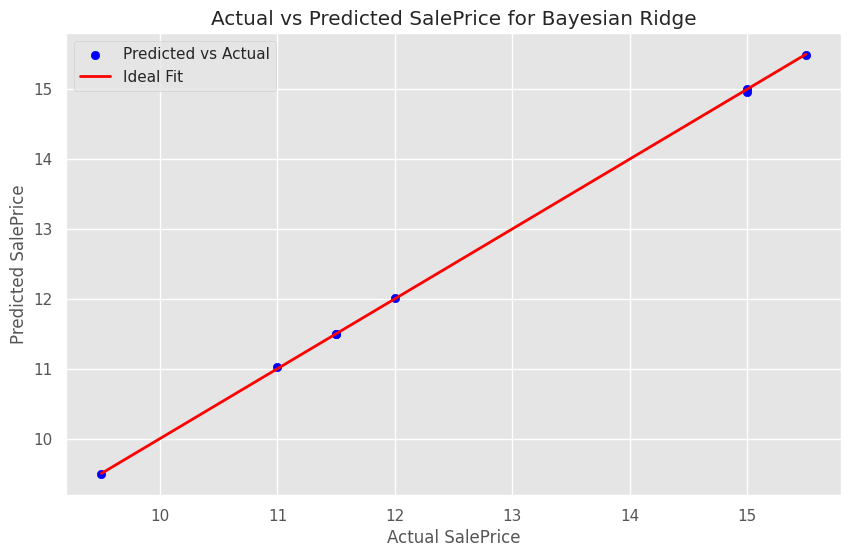

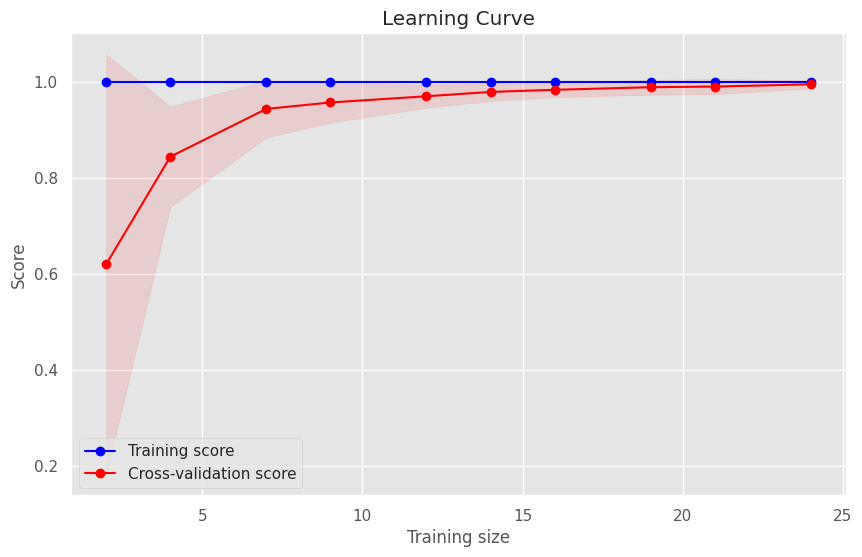

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


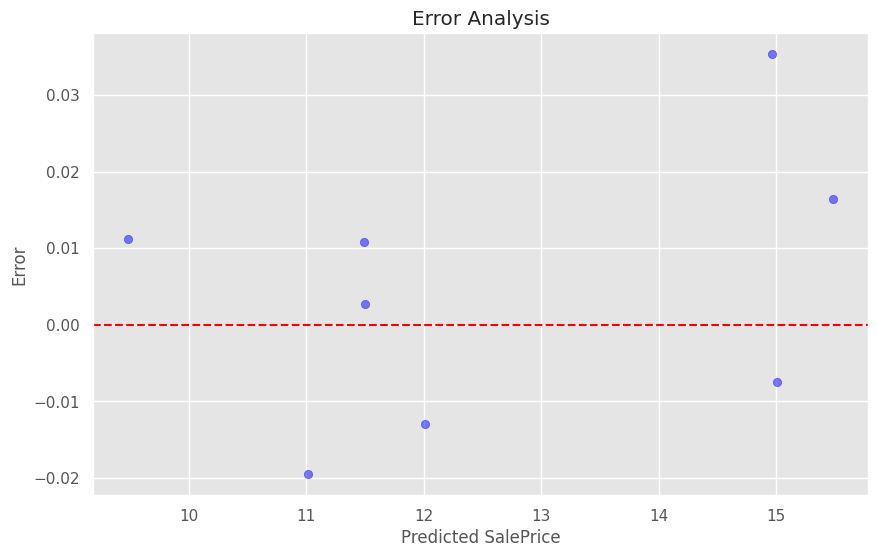

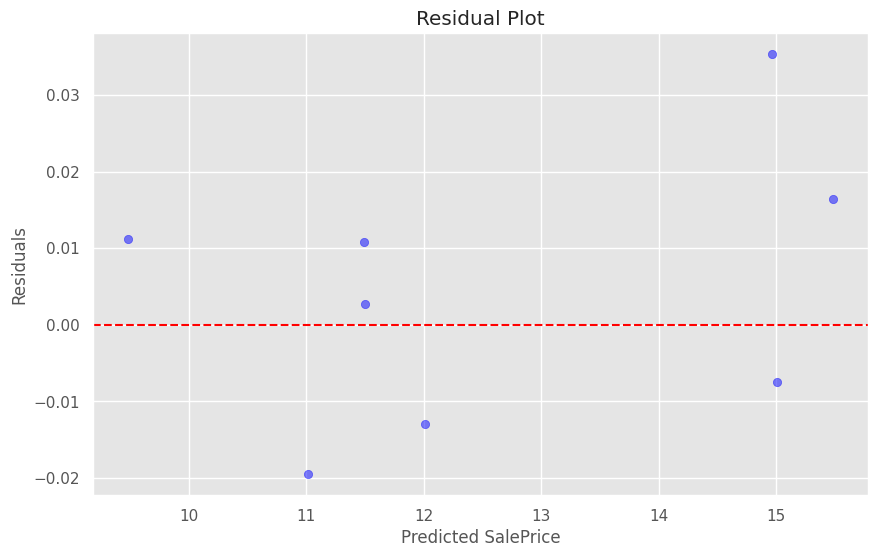

Random State 0:
Mean Absolute Error:  0.025669558810249054
Mean Squared Error:  0.0012429266713529397
Root Mean Squared Error:  0.03525516517267987
R² on Test data:  0.9998319423092256

Random State 1:
Mean Absolute Error:  0.03548637694577561
Mean Squared Error:  0.0018285338353536832
Root Mean Squared Error:  0.04276135913828843
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043237
Mean Squared Error:  0.0012368856317090916
Root Mean Squared Error:  0.03516938486395649
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.2529480559586771
Mean Squared Error:  0.2595729978853824
Root Mean Squared Error:  0.5094830692823682
R² on Test data:  0.9871507350651444

Random State 4:
Mean Absolute Error:  0.13808414828380278
Mean Squared Error:  0.0703261485760362
Root Mean Squared Error:  0.26519077769793614
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [413]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define the Bayesian Ridge model
bayesian_ridge = BayesianRidge()

# Define the parameter grid for GridSearchCV
param_grid_br = {
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4],
    'n_iter': [100, 200, 300]
}
br_cv = GridSearchCV(bayesian_ridge, param_grid_br, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
br_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Bayesian Ridge: ", br_cv.best_params_)
print("Best score for Bayesian Ridge: ", br_cv.best_score_)
print("Best RMSE for Bayesian Ridge: ", np.sqrt(-1 * br_cv.best_score_))

# Get the best estimator
best_br = br_cv.best_estimator_

# Predict on training data
y_train_pred = best_br.predict(X_train)

# Predict on test data
y_test_pred = best_br.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for Bayesian Ridge:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for Bayesian Ridge:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for Bayesian Ridge')
plt.legend()
plt.show()

# Plot Learning Curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    # Plot the std deviation as a shaded area
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

# Error Analysis
errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

# Residual Analysis
plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Robustness Checks
for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()

# Comparison with Baseline
baseline_prediction = np.mean(y_train)  # or np.median(y_train)
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## AdaBoost Regressor model

Best parameters for AdaBoost:  {'learning_rate': 1, 'n_estimators': 50}
Best score for AdaBoost:  -2.5305028729237335
Best RMSE for AdaBoost:  1.590755440953679

Training Data Metrics for AdaBoost:
Mean Absolute Error:  0.17137747083193014
Mean Squared Error:  0.059363351021195755
Root Mean Squared Error:  0.24364595424754287
R2 Score:  0.9956534719747528

Test Data Metrics for AdaBoost:
Mean Absolute Error:  0.3293831168831167
Mean Squared Error:  0.1527916807218755
Root Mean Squared Error:  0.3908857642865438
R2 Score:  0.9649510123075268


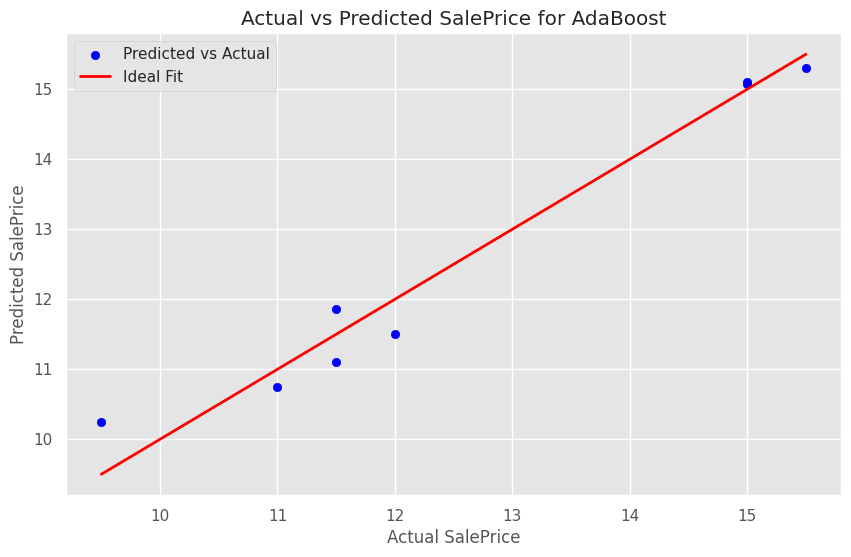

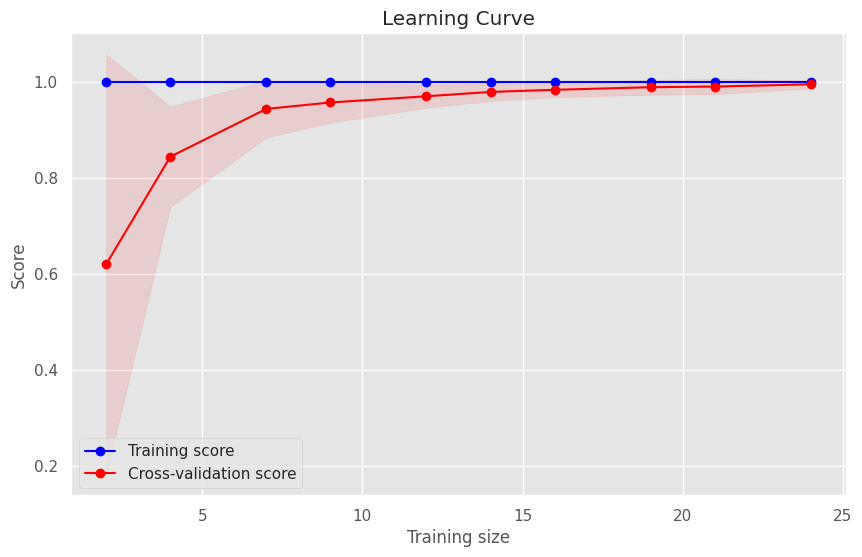

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


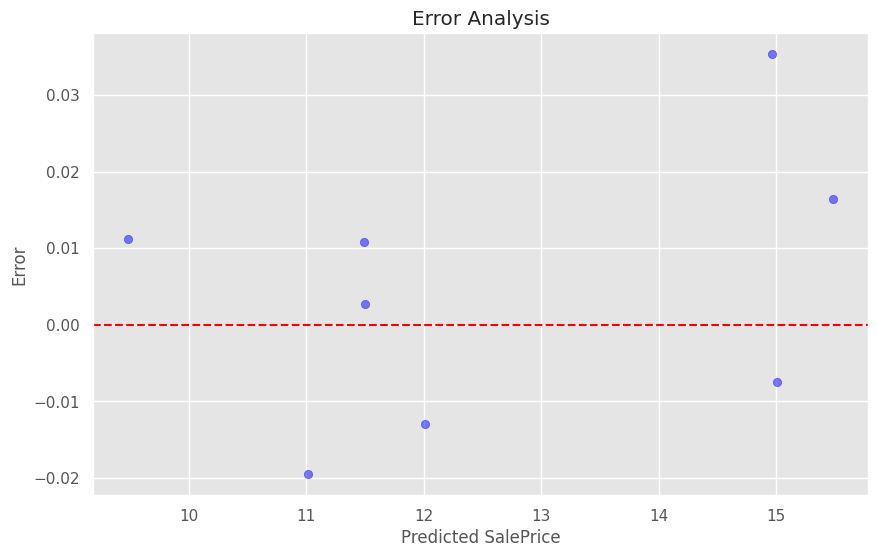

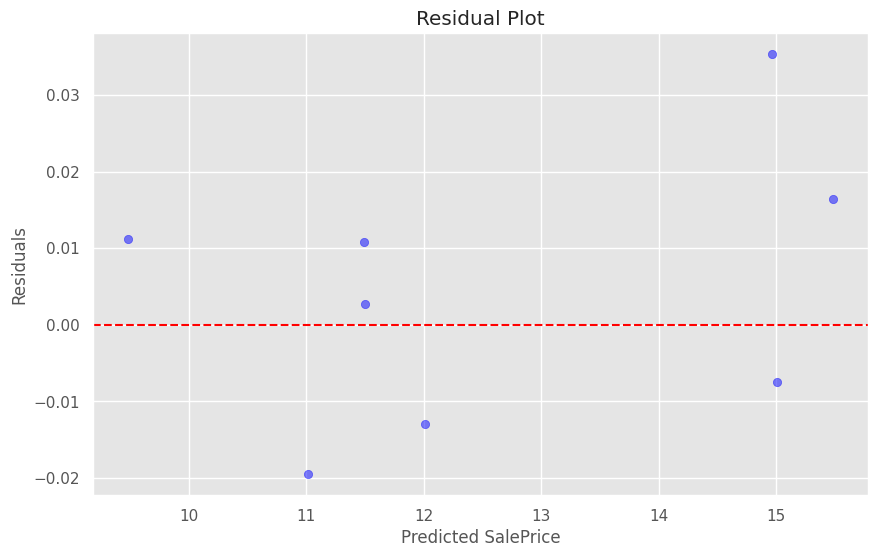

Random State 0:
Mean Absolute Error:  0.025669558810249054
Mean Squared Error:  0.0012429266713529397
Root Mean Squared Error:  0.03525516517267987
R² on Test data:  0.9998319423092256

Random State 1:
Mean Absolute Error:  0.03548637694577561
Mean Squared Error:  0.0018285338353536832
Root Mean Squared Error:  0.04276135913828843
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043237
Mean Squared Error:  0.0012368856317090916
Root Mean Squared Error:  0.03516938486395649
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.2529480559586771
Mean Squared Error:  0.2595729978853824
Root Mean Squared Error:  0.5094830692823682
R² on Test data:  0.9871507350651444

Random State 4:
Mean Absolute Error:  0.13808414828380278
Mean Squared Error:  0.0703261485760362
Root Mean Squared Error:  0.26519077769793614
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [414]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define the AdaBoost Regressor model
ada = AdaBoostRegressor(random_state=13)

# Define the parameter grid for GridSearchCV
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
ada_cv = GridSearchCV(ada, param_grid_ada, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for AdaBoost: ", ada_cv.best_params_)
print("Best score for AdaBoost: ", ada_cv.best_score_)
print("Best RMSE for AdaBoost: ", np.sqrt(-1 * ada_cv.best_score_))

# Get the best estimator
best_ada = ada_cv.best_estimator_

# Predict on training data
y_train_pred = best_ada.predict(X_train)

# Predict on test data
y_test_pred = best_ada.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for AdaBoost:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for AdaBoost:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for AdaBoost')
plt.legend()
plt.show()

# Plot Learning Curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    # Plot the std deviation as a shaded area
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

# Error Analysis
errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

# Residual Analysis
plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Robustness Checks
for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()

# Comparison with Baseline
baseline_prediction = np.mean(y_train)  # or np.median(y_train)
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## Random Forest Regressor

Best parameters:  {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 500}
Best score:  -2.6417515809486165
Best RMSE:  1.6253466033276154

Training Data Metrics:
Mean Absolute Error:  0.2925350230414753
Mean Squared Error:  0.49981408999487986
Root Mean Squared Error:  0.7069753107392647
R2 Score:  0.9634040883439939

Test Data Metrics:
Mean Absolute Error:  0.1942526785714287
Mean Squared Error:  0.06977240436011917
Root Mean Squared Error:  0.26414466559088257
R2 Score:  0.9839948606485748


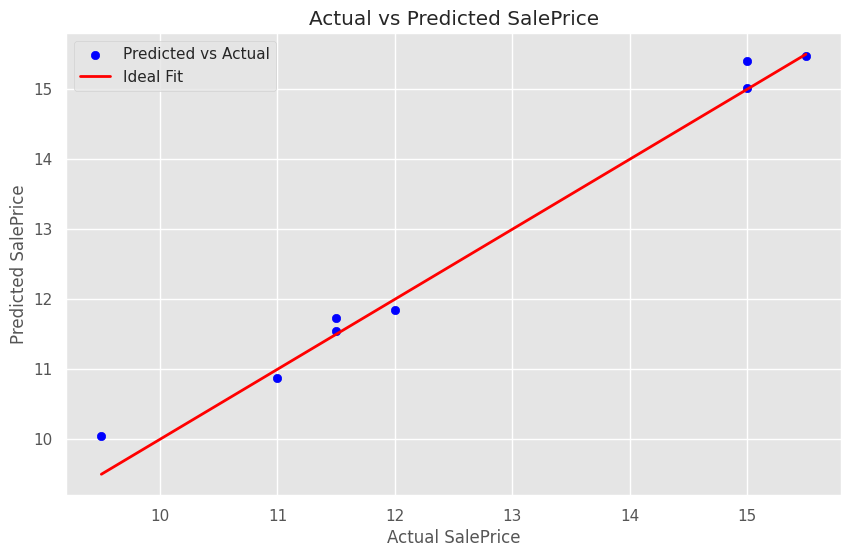

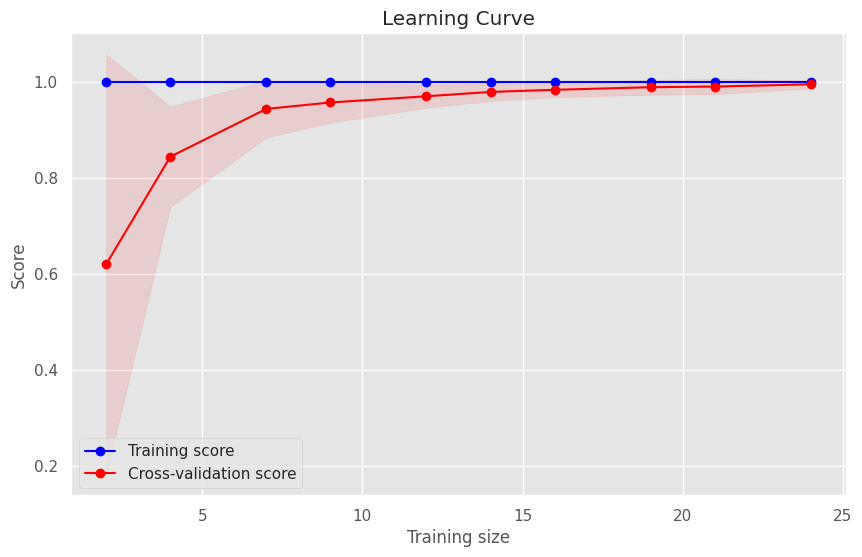

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


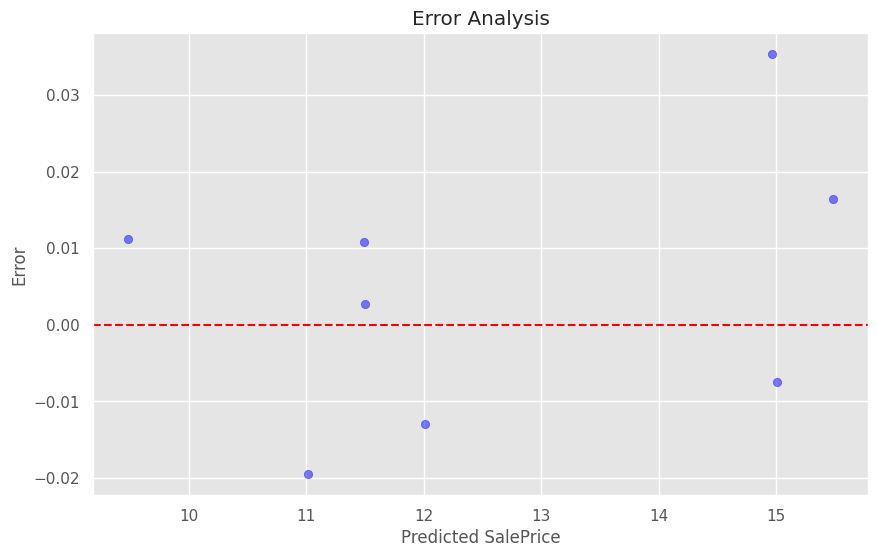

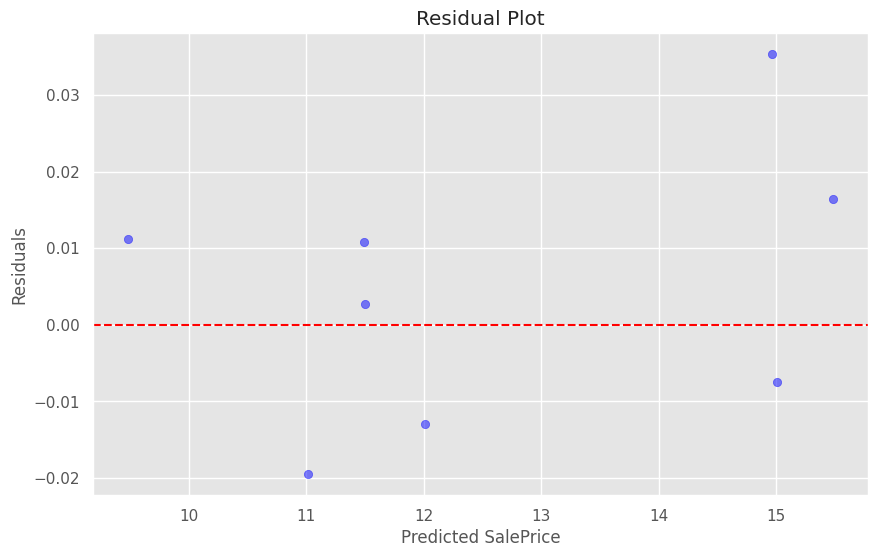

Random State 0:
Mean Absolute Error:  0.025669558810249054
Mean Squared Error:  0.0012429266713529397
Root Mean Squared Error:  0.03525516517267987
R² on Test data:  0.9998319423092256

Random State 1:
Mean Absolute Error:  0.03548637694577561
Mean Squared Error:  0.0018285338353536832
Root Mean Squared Error:  0.04276135913828843
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043237
Mean Squared Error:  0.0012368856317090916
Root Mean Squared Error:  0.03516938486395649
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.2529480559586771
Mean Squared Error:  0.2595729978853824
Root Mean Squared Error:  0.5094830692823682
R² on Test data:  0.9871507350651444

Random State 4:
Mean Absolute Error:  0.13808414828380278
Mean Squared Error:  0.0703261485760362
Root Mean Squared Error:  0.26519077769793614
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [415]:
RFR = RandomForestRegressor(random_state=13)

# Define the parameter grid for GridSearchCV for hyper parametr tuning
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500 , 1000],
    'min_samples_split': [3, 5, 10]
}
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rfr_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", rfr_cv.best_params_)
print("Best score: ", rfr_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * rfr_cv.best_score_))

# Get the best estimator
best_rfr = rfr_cv.best_estimator_

# Predict on training data
y_train_pred = best_rfr.predict(X_train)

# Predict on test data
y_test_pred = best_rfr.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()

# Plot Learning Curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    # Plot the std deviation as a shaded area
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

# Error Analysis
errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

# Residual Analysis
plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Robustness Checks
for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()

# Comparison with Baseline
baseline_prediction = np.mean(y_train)  # or np.median(y_train)
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## XGB Regressor

Best parameters:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 1.0}
Best score:  -4.144764283883957
Best RMSE:  2.03586941719845

Training Data Metrics:
Mean Absolute Error:  0.02518647813027905
Mean Squared Error:  0.0015848790009067224
Root Mean Squared Error:  0.03981053881708614
R2 Score:  0.9998839566689622

Test Data Metrics:
Mean Absolute Error:  0.15274250507354736
Mean Squared Error:  0.06525755717700576
Root Mean Squared Error:  0.2554555874844114
R2 Score:  0.9850305245185363


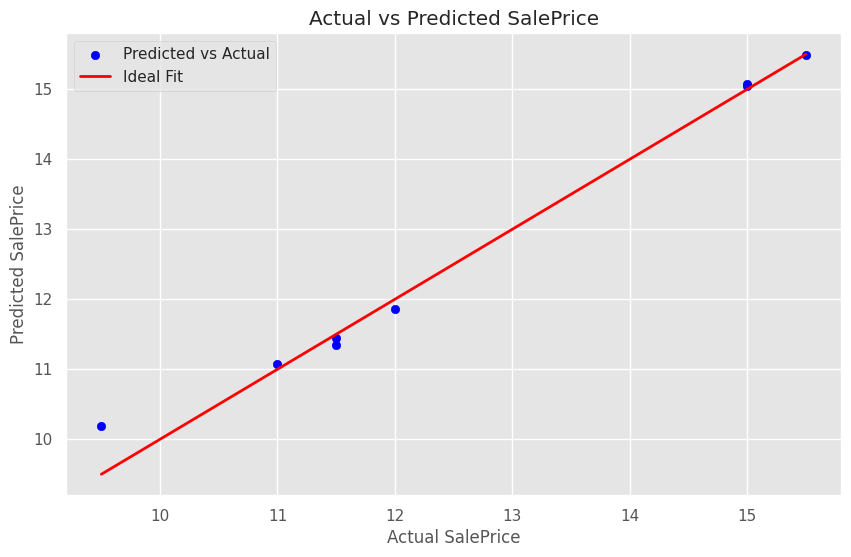

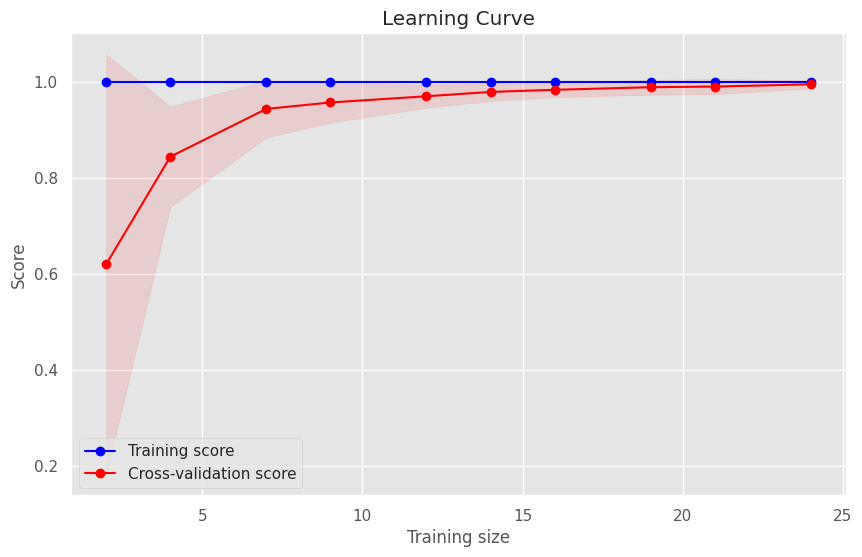

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


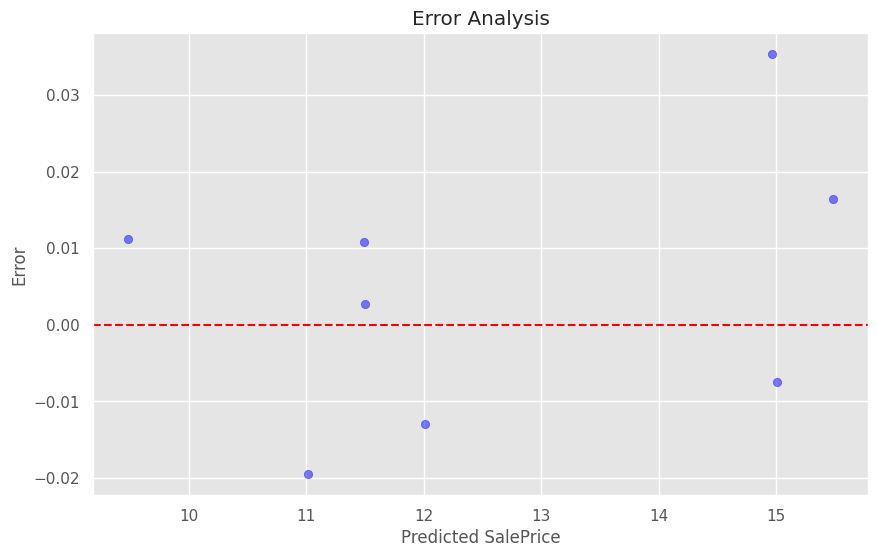

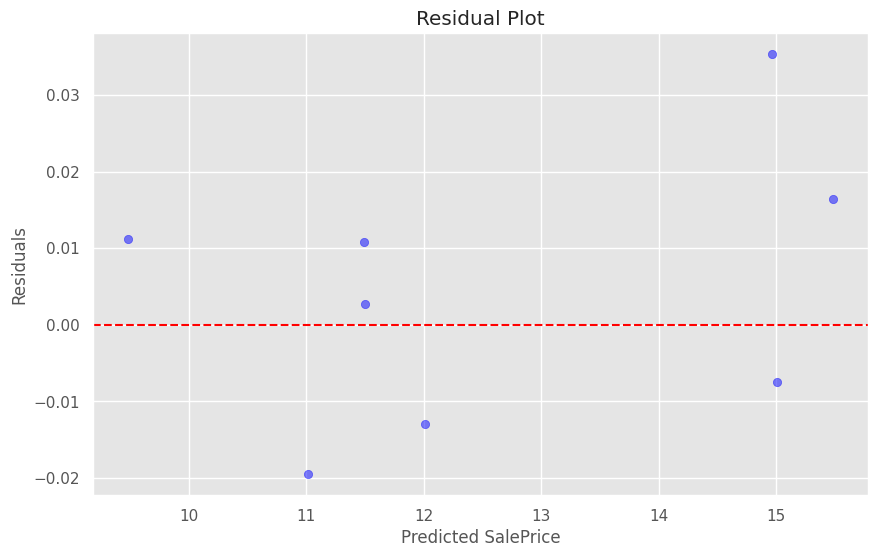

Random State 0:
Mean Absolute Error:  0.025669558810249054
Mean Squared Error:  0.0012429266713529397
Root Mean Squared Error:  0.03525516517267987
R² on Test data:  0.9998319423092256

Random State 1:
Mean Absolute Error:  0.03548637694577561
Mean Squared Error:  0.0018285338353536832
Root Mean Squared Error:  0.04276135913828843
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043237
Mean Squared Error:  0.0012368856317090916
Root Mean Squared Error:  0.03516938486395649
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.2529480559586771
Mean Squared Error:  0.2595729978853824
Root Mean Squared Error:  0.5094830692823682
R² on Test data:  0.9871507350651444

Random State 4:
Mean Absolute Error:  0.13808414828380278
Mean Squared Error:  0.0703261485760362
Root Mean Squared Error:  0.26519077769793614
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [416]:
XGB = XGBRegressor(random_state=13)
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", xgb_cv.best_params_)
print("Best score: ", xgb_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * xgb_cv.best_score_))

# Get the best estimator
best_xgb = xgb_cv.best_estimator_

# Predict on training data
y_train_pred = best_xgb.predict(X_train)

# Predict on test data
y_test_pred = best_xgb.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()

# Plot Learning Curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    # Plot the std deviation as a shaded area
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

# Error Analysis
errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

# Residual Analysis
plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Robustness Checks
for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()

# Comparison with Baseline
baseline_prediction = np.mean(y_train)  # or np.median(y_train)
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## Ridge regressor

Best parameters:  {'alpha': 0.05, 'solver': 'lsqr'}
Best score:  -0.0802054673721623
Best RMSE:  0.2832056979867501

Training Data Metrics:
Mean Absolute Error:  0.00033096933820679945
Mean Squared Error:  1.8988912547199407e-07
Root Mean Squared Error:  0.00043576269398836116
R2 Score:  0.9999999860964991

Test Data Metrics:
Mean Absolute Error:  0.015150307901210969
Mean Squared Error:  0.00032181635065173545
Root Mean Squared Error:  0.01793924052605727
R2 Score:  0.9999261783281659


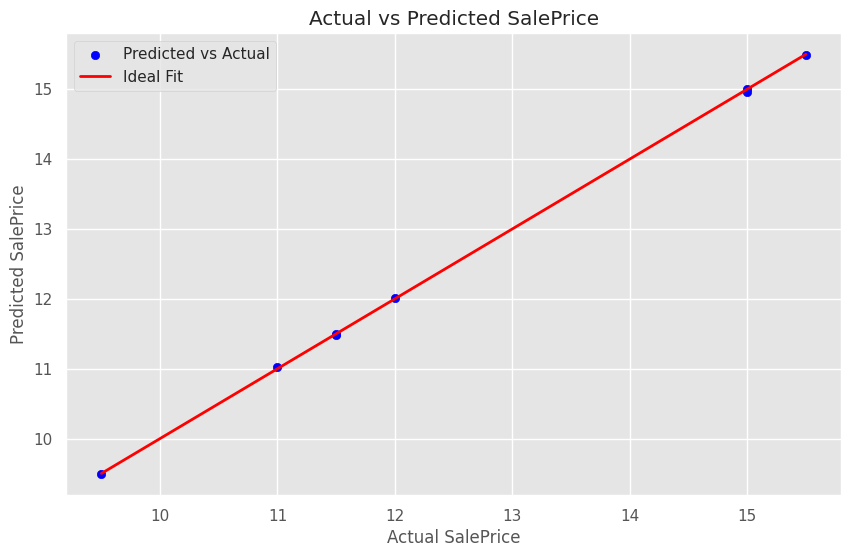

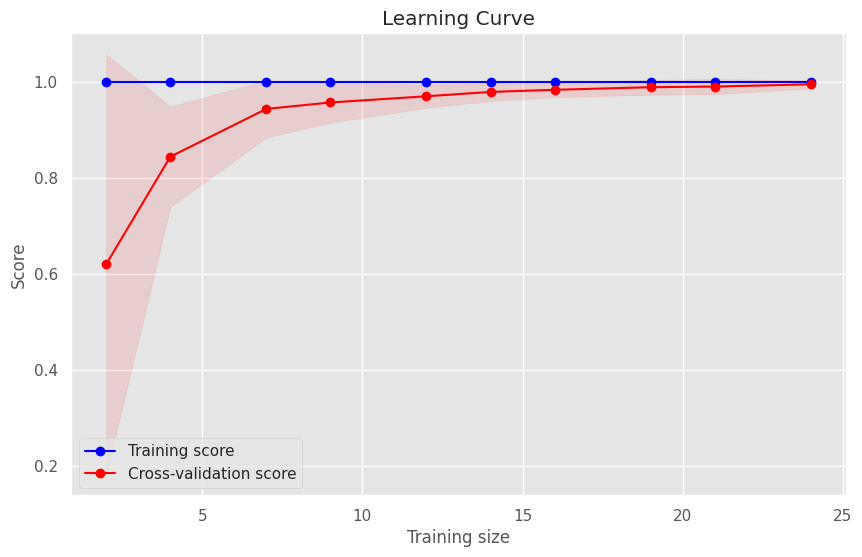

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


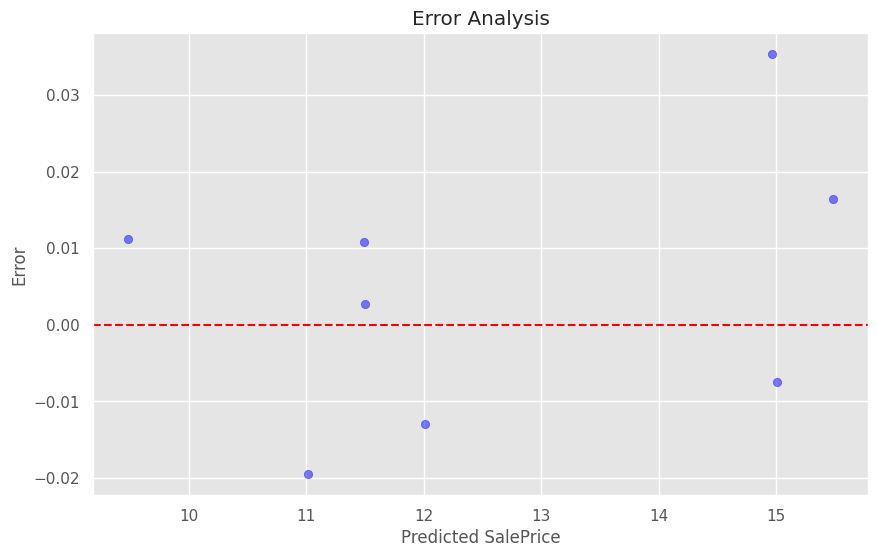

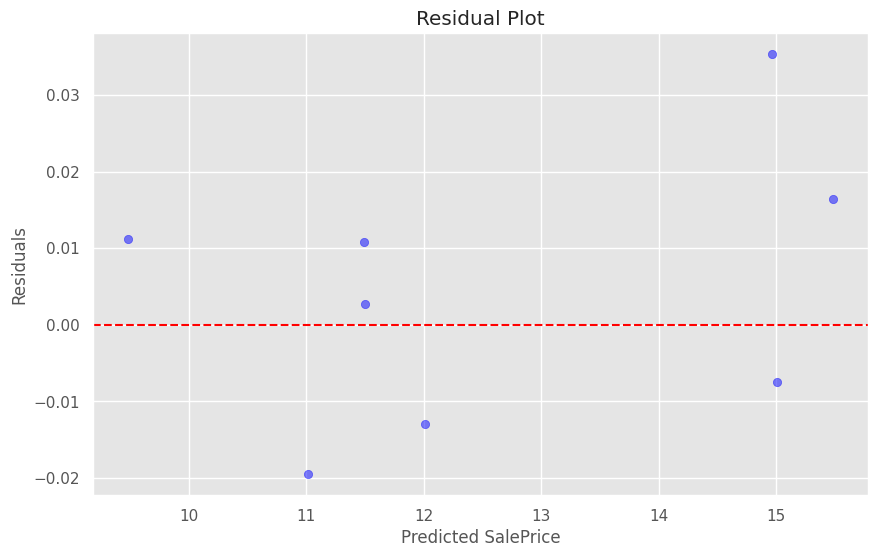

Random State 0:
Mean Absolute Error:  0.025669558810249054
Mean Squared Error:  0.0012429266713529397
Root Mean Squared Error:  0.03525516517267987
R² on Test data:  0.9998319423092256

Random State 1:
Mean Absolute Error:  0.03548637694577561
Mean Squared Error:  0.0018285338353536832
Root Mean Squared Error:  0.04276135913828843
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043237
Mean Squared Error:  0.0012368856317090916
Root Mean Squared Error:  0.03516938486395649
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.2529480559586771
Mean Squared Error:  0.2595729978853824
Root Mean Squared Error:  0.5094830692823682
R² on Test data:  0.9871507350651444

Random State 4:
Mean Absolute Error:  0.13808414828380278
Mean Squared Error:  0.0703261485760362
Root Mean Squared Error:  0.26519077769793614
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [417]:
# Initialize the Ridge regressor
ridge = Ridge()

# Define the parameter grid for GridSearchCV
param_grid_ridge = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

# Perform GridSearchCV
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", ridge_cv.best_params_)
print("Best score: ", ridge_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * ridge_cv.best_score_))
# Get the best estimator
best_ridge = ridge_cv.best_estimator_

# Predict on training data
y_train_pred = best_ridge.predict(X_train)

# Predict on test data
y_test_pred = best_ridge.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()

# Plot Learning Curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    # Plot the std deviation as a shaded area
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

# Error Analysis
errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

# Residual Analysis
plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Robustness Checks
for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()

# Comparison with Baseline
baseline_prediction = np.mean(y_train)  # or np.median(y_train)
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


# Ensemble Learning

## Gradient Boosting Regressor

Best parameters:  {'learning_rate': 0.1, 'max_depth': 15, 'max_features': 0.01, 'min_samples_leaf': 10, 'n_estimators': 200}
Best score:  -5.1390781271705555
Best RMSE:  2.2669534902971775

Training Data Metrics:
Mean Absolute Error:  0.955705098971273
Mean Squared Error:  2.0342072900292125
Root Mean Squared Error:  1.4262563900046907
R2 Score:  0.8510572795643373

Test Data Metrics:
Mean Absolute Error:  0.8224005880004392
Mean Squared Error:  0.9038952449422302
Root Mean Squared Error:  0.9507340558443408
R2 Score:  0.7926548542068003


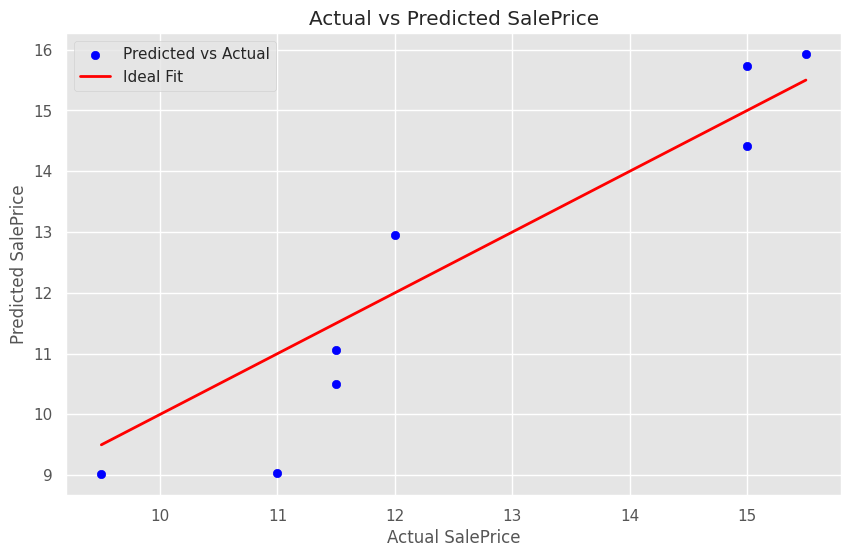

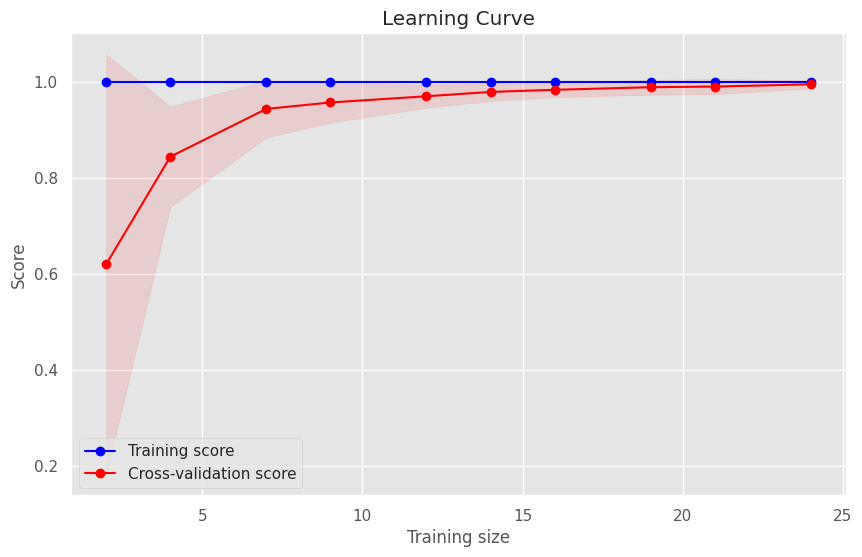

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


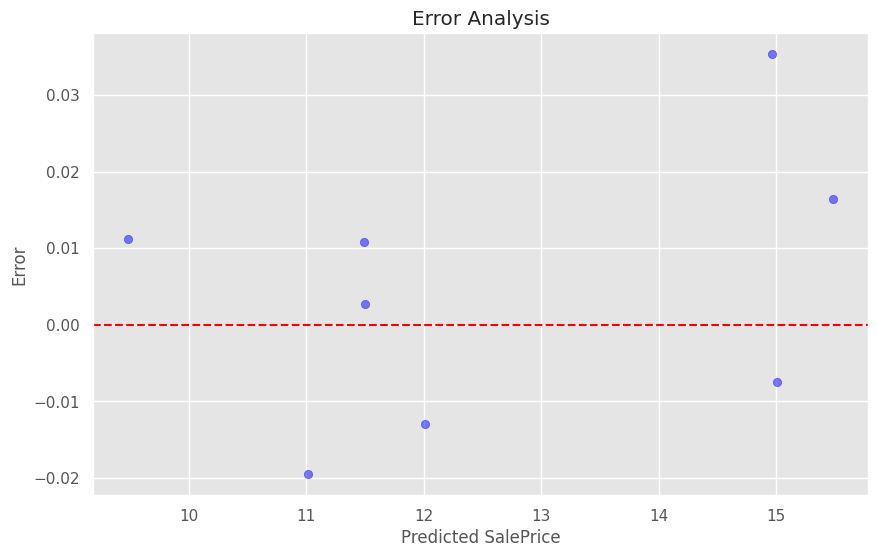

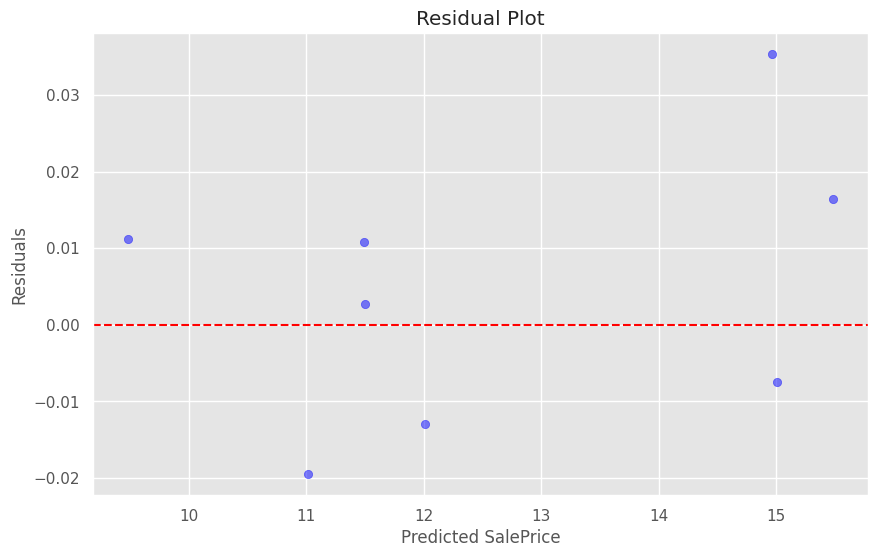

Random State 0:
Mean Absolute Error:  0.025669558810249054
Mean Squared Error:  0.0012429266713529397
Root Mean Squared Error:  0.03525516517267987
R² on Test data:  0.9998319423092256

Random State 1:
Mean Absolute Error:  0.03548637694577561
Mean Squared Error:  0.0018285338353536832
Root Mean Squared Error:  0.04276135913828843
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043237
Mean Squared Error:  0.0012368856317090916
Root Mean Squared Error:  0.03516938486395649
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.2529480559586771
Mean Squared Error:  0.2595729978853824
Root Mean Squared Error:  0.5094830692823682
R² on Test data:  0.9871507350651444

Random State 4:
Mean Absolute Error:  0.13808414828380278
Mean Squared Error:  0.0703261485760362
Root Mean Squared Error:  0.26519077769793614
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [418]:
# Initialize the GradientBoostingRegressor
GBR = GradientBoostingRegressor()

# Define the parameter grid for GridSearchCV
param_grid_GBR = {
    'max_depth': [12, 15, 20],
    'n_estimators': [200, 300, 500],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7]
}

# Perform GridSearchCV
GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
GBR_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", GBR_cv.best_params_)
print("Best score: ", GBR_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * GBR_cv.best_score_))

# Get the best estimator
best_gbr = GBR_cv.best_estimator_

# Predict on training data
y_train_pred = best_gbr.predict(X_train)

# Predict on test data
y_test_pred = best_gbr.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()
# Plot Learning Curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    # Plot the std deviation as a shaded area
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

# Error Analysis
errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

# Residual Analysis
plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Robustness Checks
for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()

# Comparison with Baseline
baseline_prediction = np.mean(y_train)  # or np.median(y_train)
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## LGBM Regressor (LightGBM)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 12.290323
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

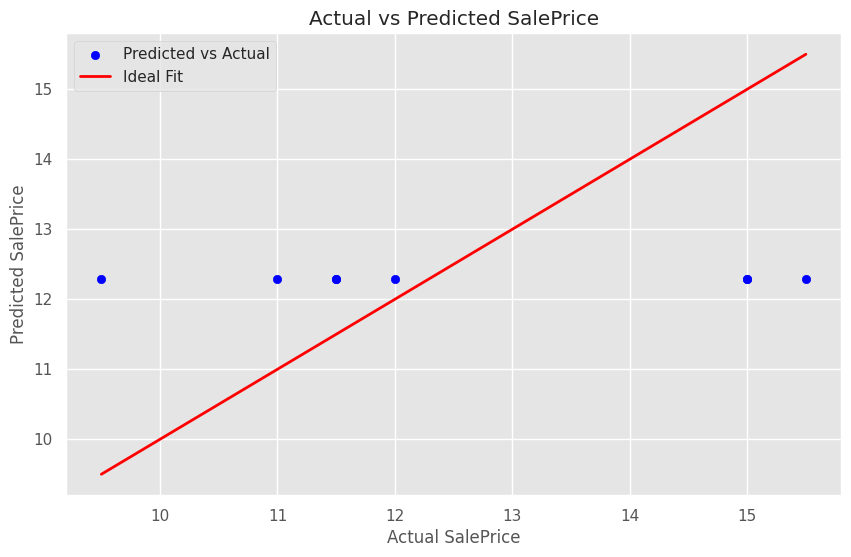

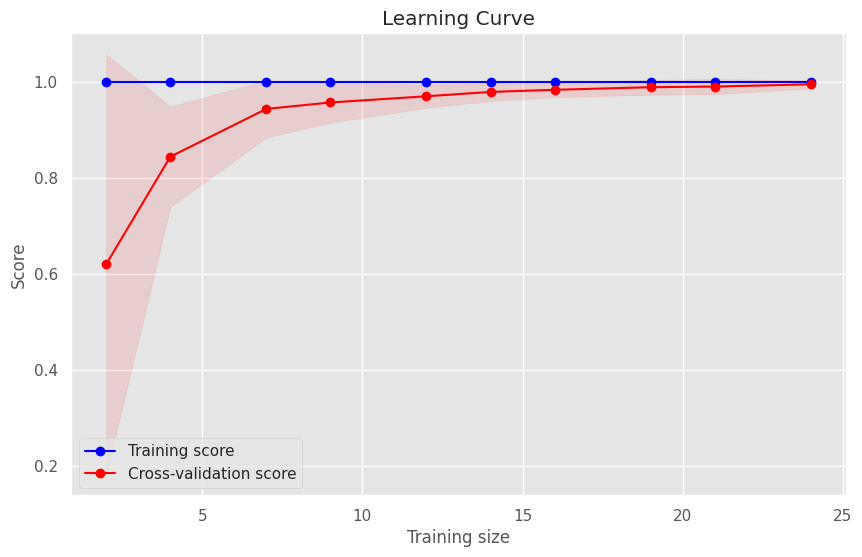

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


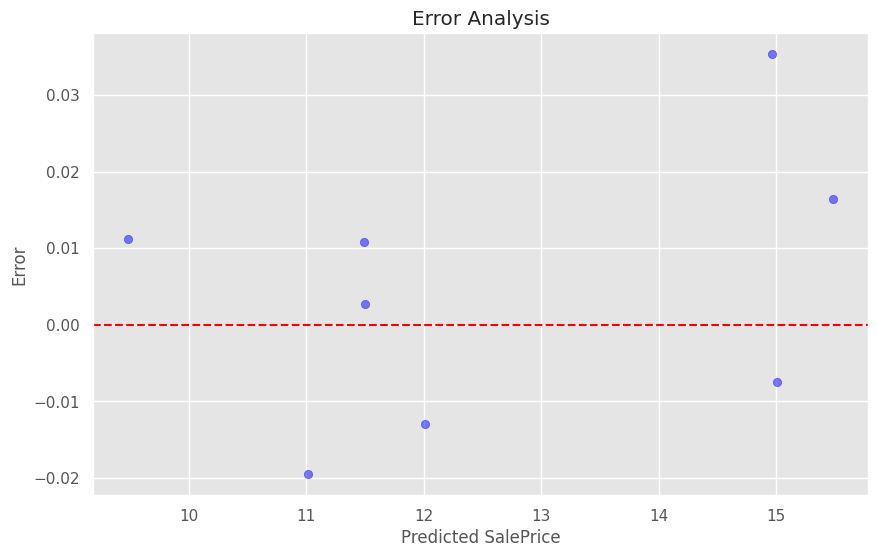

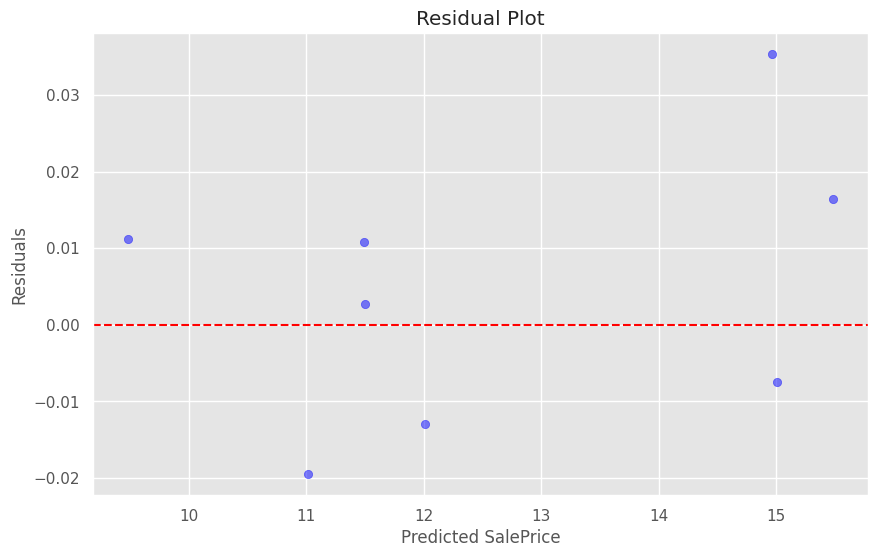

Random State 0:
Mean Absolute Error:  0.025669558810249054
Mean Squared Error:  0.0012429266713529397
Root Mean Squared Error:  0.03525516517267987
R² on Test data:  0.9998319423092256

Random State 1:
Mean Absolute Error:  0.03548637694577561
Mean Squared Error:  0.0018285338353536832
Root Mean Squared Error:  0.04276135913828843
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043237
Mean Squared Error:  0.0012368856317090916
Root Mean Squared Error:  0.03516938486395649
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.2529480559586771
Mean Squared Error:  0.2595729978853824
Root Mean Squared Error:  0.5094830692823682
R² on Test data:  0.9871507350651444

Random State 4:
Mean Absolute Error:  0.13808414828380278
Mean Squared Error:  0.0703261485760362
Root Mean Squared Error:  0.26519077769793614
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [419]:
# Initialize the LGBMRegressor
lgbm_regressor = lgb.LGBMRegressor()

# Define the parameter grid for GridSearchCV
param_grid_lgbm = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

# Perform GridSearchCV
lgbm_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
lgbm_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", lgbm_cv.best_params_)
print("Best score: ", lgbm_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * lgbm_cv.best_score_))

# Get the best estimator
best_lgbm = lgbm_cv.best_estimator_

# Predict on training data
y_train_pred = best_lgbm.predict(X_train)

# Predict on test data
y_test_pred = best_lgbm.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()
# Plot Learning Curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    # Plot the std deviation as a shaded area
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

# Error Analysis
errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

# Residual Analysis
plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Robustness Checks
for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()

# Comparison with Baseline
baseline_prediction = np.mean(y_train)  # or np.median(y_train)
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## CatBoost Regressor

Best parameters:  {'depth': 4, 'iterations': 700, 'learning_rate': 0.05}
Best score:  -4.636318299156399
Best RMSE:  2.153211159908939

Training Data Metrics:
Mean Absolute Error:  0.0012863127875629601
Mean Squared Error:  2.725469403539196e-06
Root Mean Squared Error:  0.0016508995740320475
R2 Score:  0.9999998004437259

Test Data Metrics:
Mean Absolute Error:  0.40388261201493103
Mean Squared Error:  0.1817095006867317
Root Mean Squared Error:  0.42627397373840653
R2 Score:  0.9583175338926494


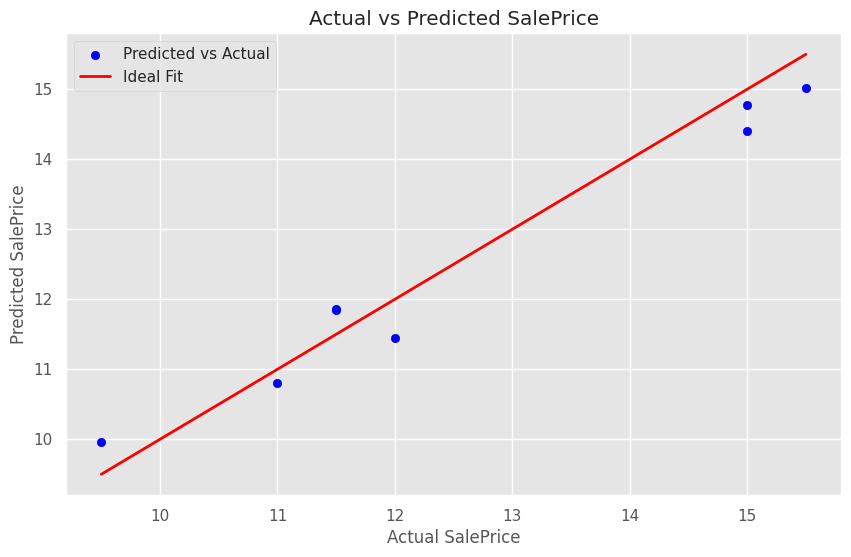

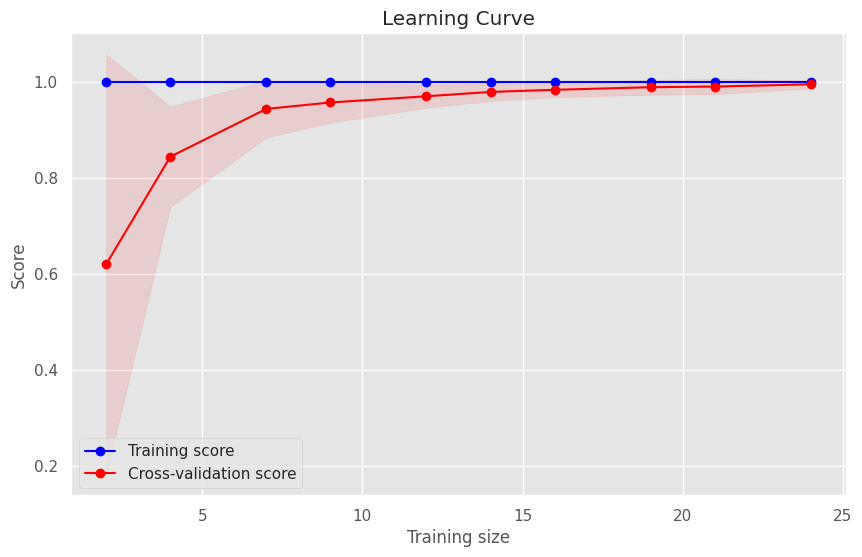

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


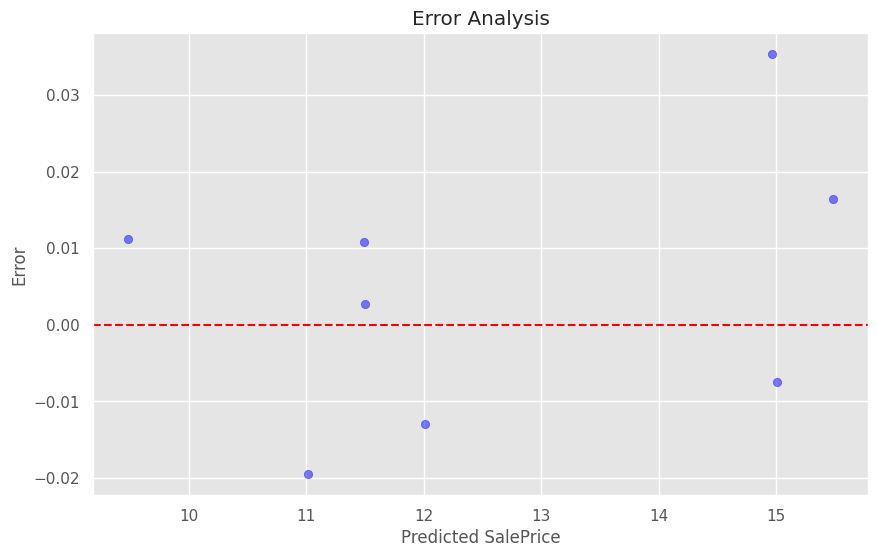

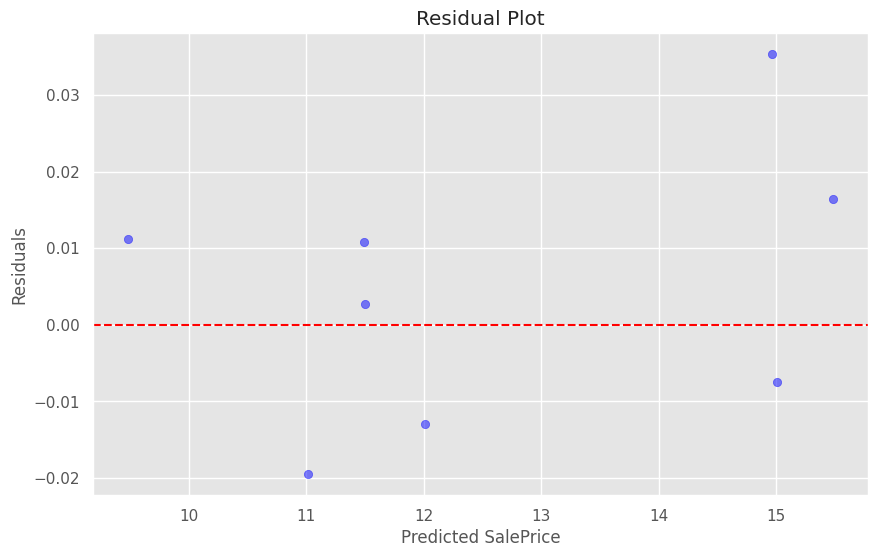

Random State 0:
Mean Absolute Error:  0.025669558810249054
Mean Squared Error:  0.0012429266713529397
Root Mean Squared Error:  0.03525516517267987
R² on Test data:  0.9998319423092256

Random State 1:
Mean Absolute Error:  0.03548637694577561
Mean Squared Error:  0.0018285338353536832
Root Mean Squared Error:  0.04276135913828843
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043237
Mean Squared Error:  0.0012368856317090916
Root Mean Squared Error:  0.03516938486395649
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.2529480559586771
Mean Squared Error:  0.2595729978853824
Root Mean Squared Error:  0.5094830692823682
R² on Test data:  0.9871507350651444

Random State 4:
Mean Absolute Error:  0.13808414828380278
Mean Squared Error:  0.0703261485760362
Root Mean Squared Error:  0.26519077769793614
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [420]:
# Initialize the CatBoostRegressor
catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)

# Define the parameter grid for GridSearchCV
param_grid_cat = {
    'iterations': [100, 500, 700],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

# Perform GridSearchCV
cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
cat_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", cat_cv.best_params_)
print("Best score: ", cat_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * cat_cv.best_score_))
# Get the best estimator
best_catboost = cat_cv.best_estimator_

# Predict on training data
y_train_pred = best_catboost.predict(X_train)

# Predict on test data
y_test_pred = best_catboost.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()
# Plot Learning Curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    # Plot the std deviation as a shaded area
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

# Error Analysis
errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

# Residual Analysis
plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Robustness Checks
for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()

# Comparison with Baseline
baseline_prediction = np.mean(y_train)  # or np.median(y_train)
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## VotingRegressor


Training Data Metrics:
Mean Absolute Error:  0.35539726640754016
Mean Squared Error:  0.28650665267520425
Root Mean Squared Error:  0.535263162075632
R2 Score:  0.9790222557546003

Test Data Metrics:
Mean Absolute Error:  0.19809823741730193
Mean Squared Error:  0.06998859852978415
Root Mean Squared Error:  0.2645535834756055
R2 Score:  0.9839452677207664


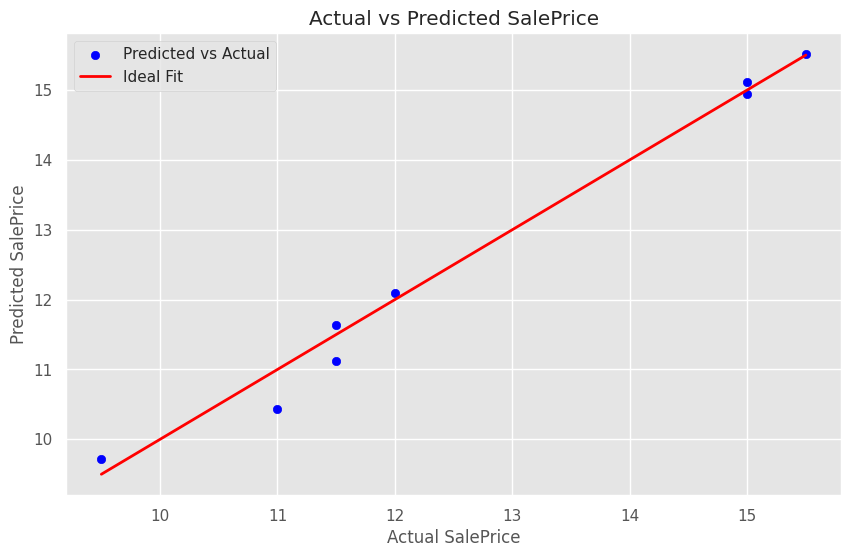

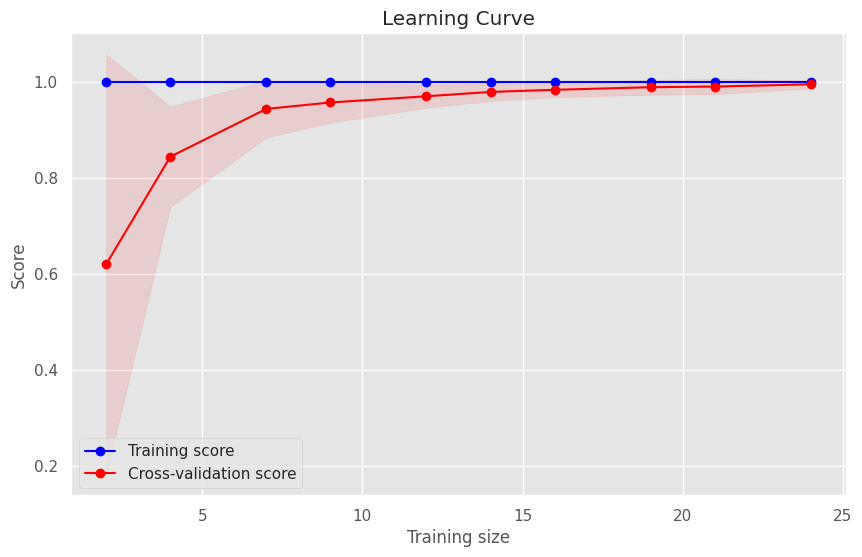

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


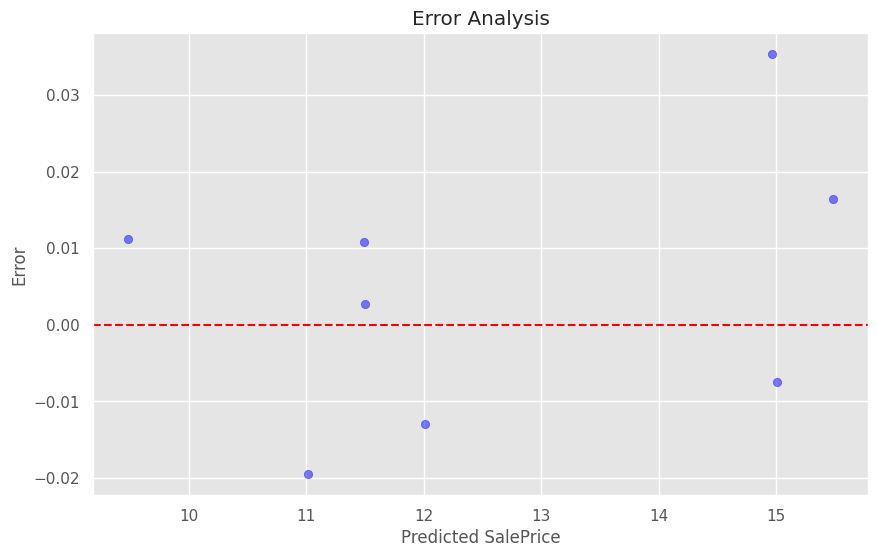

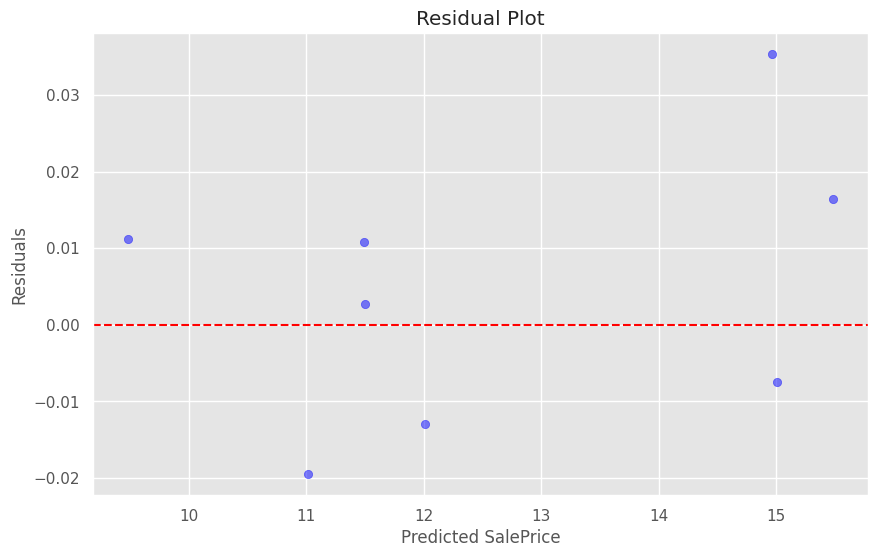

Random State 0:
Mean Absolute Error:  0.025669558810249054
Mean Squared Error:  0.0012429266713529397
Root Mean Squared Error:  0.03525516517267987
R² on Test data:  0.9998319423092256

Random State 1:
Mean Absolute Error:  0.03548637694577561
Mean Squared Error:  0.0018285338353536832
Root Mean Squared Error:  0.04276135913828843
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043237
Mean Squared Error:  0.0012368856317090916
Root Mean Squared Error:  0.03516938486395649
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.2529480559586771
Mean Squared Error:  0.2595729978853824
Root Mean Squared Error:  0.5094830692823682
R² on Test data:  0.9871507350651444

Random State 4:
Mean Absolute Error:  0.13808414828380278
Mean Squared Error:  0.0703261485760362
Root Mean Squared Error:  0.26519077769793614
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [421]:
# Initialize the VotingRegressor with the best estimators and weights
vr = VotingRegressor([
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('ridge', ridge_cv.best_estimator_)
], weights=[2, 3, 1])

# Fit the model on training data
vr.fit(X_train, y_train)

# Predict on test data
y_pred_vr = vr.predict(X_test)
# Predict on training data
y_train_pred_vr = vr.predict(X_train)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred_vr)
train_mse = mean_squared_error(y_train, y_train_pred_vr)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred_vr)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_pred_vr)
test_mse = mean_squared_error(y_test, y_pred_vr)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred_vr)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_vr, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()

# Plot Learning Curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    # Plot the std deviation as a shaded area
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

# Error Analysis
errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

# Residual Analysis
plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Robustness Checks
for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()

# Comparison with Baseline
baseline_prediction = np.mean(y_train)  # or np.median(y_train)
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


## Stacking Regressor

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 12.290323
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

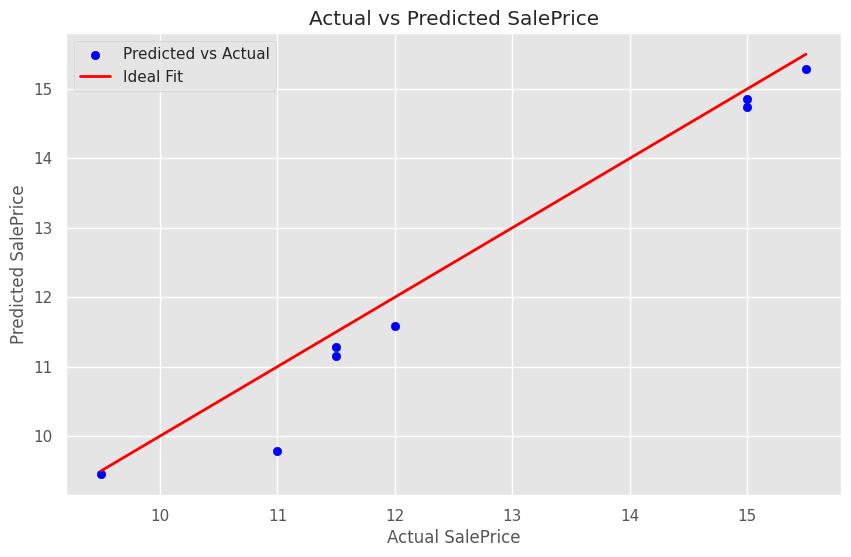

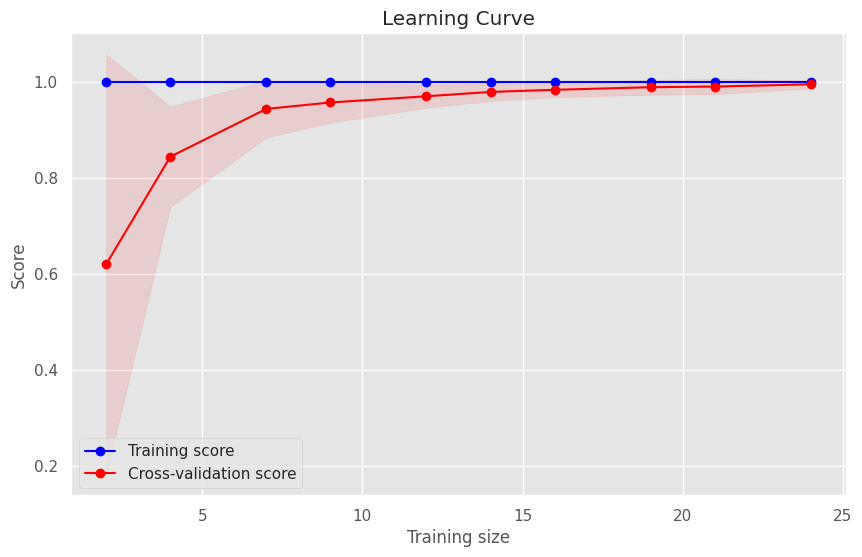

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


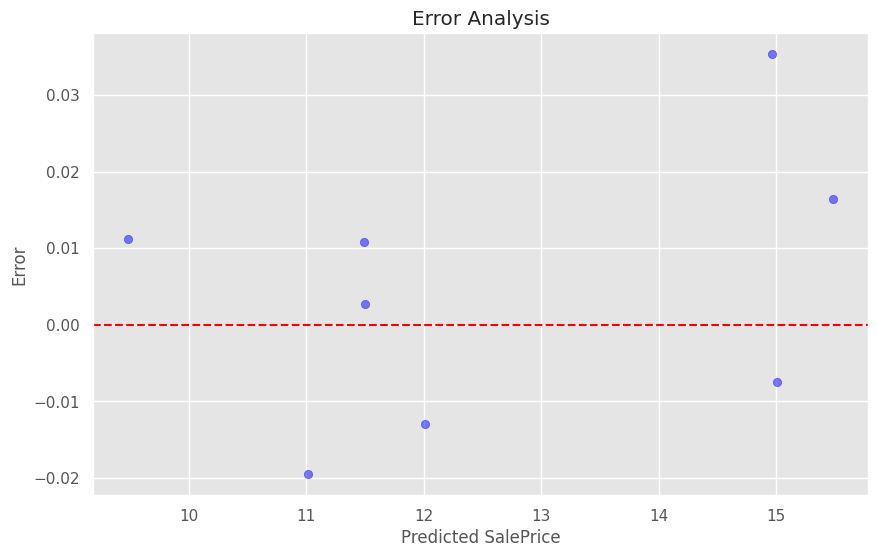

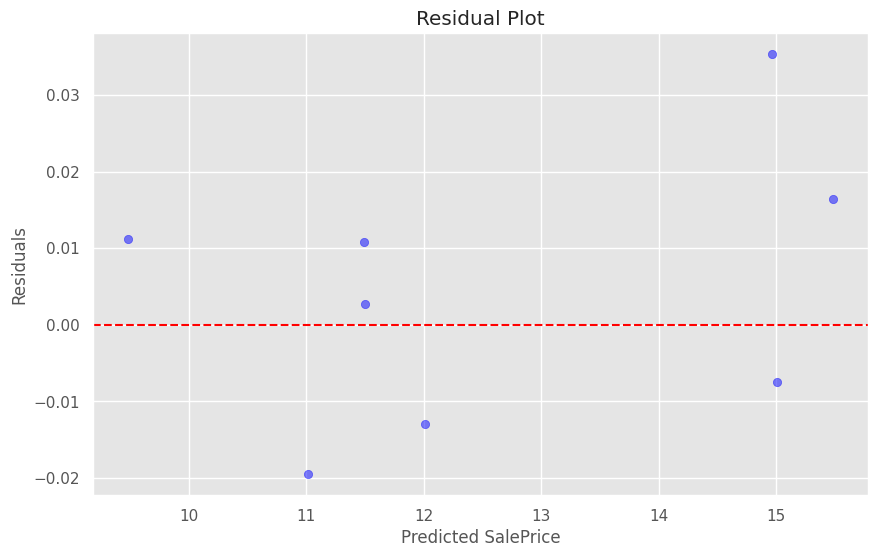

Random State 0:
Mean Absolute Error:  0.025669558810249054
Mean Squared Error:  0.0012429266713529397
Root Mean Squared Error:  0.03525516517267987
R² on Test data:  0.9998319423092256

Random State 1:
Mean Absolute Error:  0.03548637694577561
Mean Squared Error:  0.0018285338353536832
Root Mean Squared Error:  0.04276135913828843
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043237
Mean Squared Error:  0.0012368856317090916
Root Mean Squared Error:  0.03516938486395649
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.2529480559586771
Mean Squared Error:  0.2595729978853824
Root Mean Squared Error:  0.5094830692823682
R² on Test data:  0.9871507350651444

Random State 4:
Mean Absolute Error:  0.13808414828380278
Mean Squared Error:  0.0703261485760362
Root Mean Squared Error:  0.26519077769793614
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [422]:
# Define the list of base estimators
estimators = [
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('cat', cat_cv.best_estimator_),
    ('lgb', lgbm_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_)
]

# Initialize the StackingRegressor with VotingRegressor as the final estimator
stackreg = StackingRegressor(
    estimators=estimators,
    final_estimator=vr
)

# Fit the model on training data
stackreg.fit(X_train, y_train)

# Predict on test data
y_pred_stackreg = stackreg.predict(X_test)
# Predict on training data
y_train_pred_stackreg = stackreg.predict(X_train)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred_stackreg)
train_mse = mean_squared_error(y_train, y_train_pred_stackreg)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred_stackreg)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_pred_stackreg)
test_mse = mean_squared_error(y_test, y_pred_stackreg)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred_stackreg)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stackreg, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()
# Plot Learning Curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    # Plot the std deviation as a shaded area
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

# Error Analysis
errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

# Residual Analysis
plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Robustness Checks
for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()

# Comparison with Baseline
baseline_prediction = np.mean(y_train)  # or np.median(y_train)
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


# Overall calculate matrix

In [423]:
# Define a function to calculate metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predict on training data
    y_train_pred = model.predict(X_train)

    # Predict on test data
    y_test_pred = model.predict(X_test)

    # Calculate metrics for training data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calculate metrics for test data
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    return {
        'Train MAE': train_mae,
        'Train MSE': train_mse,
        'Train RMSE': train_rmse,
        'Train R2': train_r2,
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test R2': test_r2
    }

# Initialize models
models = {
    'Linear Regression': lr,
    'Decision Tree': dt_cv.best_estimator_,
    'Random Forest': rfr_cv.best_estimator_,
    'K-Nearest Neighbors': knn_cv.best_estimator_,
    'Support Vector Machine':svm_random_search.best_estimator_,
    'Gradient Boosting': GBR_cv.best_estimator_,
    'XGBoost': xgb_cv.best_estimator_,
    'Ridge': ridge_cv.best_estimator_,
    'ElasticNet': en_cv.best_estimator_,
    'Bayesian Ridge': br_cv.best_estimator_,
    'AdaBoost': ada_cv.best_estimator_,
    'LGBM': lgbm_cv.best_estimator_,
    'CatBoost': cat_cv.best_estimator_,
    'Stacking Regressor': stackreg
}

# Create a DataFrame to store results
results = []

# Evaluate each model
for name, model in models.items():
    metrics = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append({'Model': name, **metrics})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print(results_df)


                     Model     Train MAE     Train MSE    Train RMSE  \
0        Linear Regression  3.824897e-15  2.362129e-29  4.860174e-15   
1            Decision Tree  2.473118e-01  2.190860e-01  4.680663e-01   
2            Random Forest  2.925350e-01  4.998141e-01  7.069753e-01   
3      K-Nearest Neighbors  0.000000e+00  0.000000e+00  0.000000e+00   
4   Support Vector Machine  6.876030e-02  6.100170e-03  7.810358e-02   
5        Gradient Boosting  9.557051e-01  2.034207e+00  1.426256e+00   
6                  XGBoost  2.518648e-02  1.584879e-03  3.981054e-02   
7                    Ridge  3.309693e-04  1.898891e-07  4.357627e-04   
8               ElasticNet  2.033775e-03  8.022301e-06  2.832367e-03   
9           Bayesian Ridge  1.350635e-06  3.484492e-12  1.866679e-06   
10                AdaBoost  1.713775e-01  5.936335e-02  2.436460e-01   
11                    LGBM  2.719043e+00  1.365765e+01  3.695626e+00   
12                CatBoost  1.286313e-03  2.725469e-06  1.650900

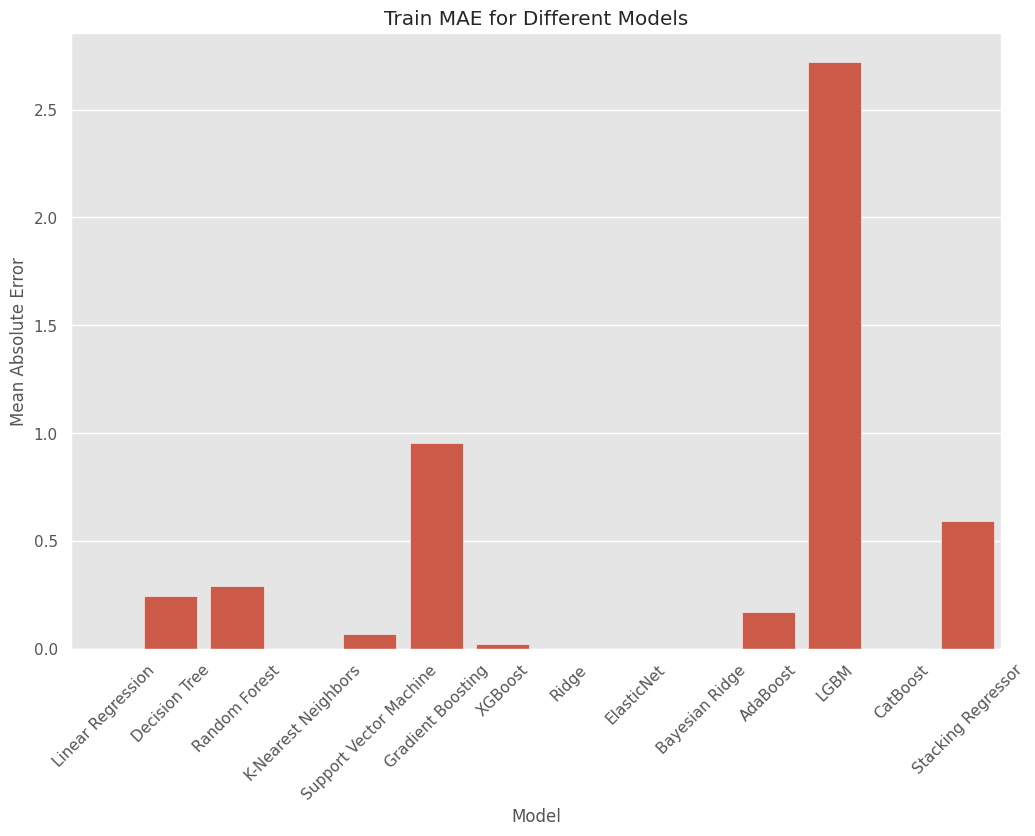

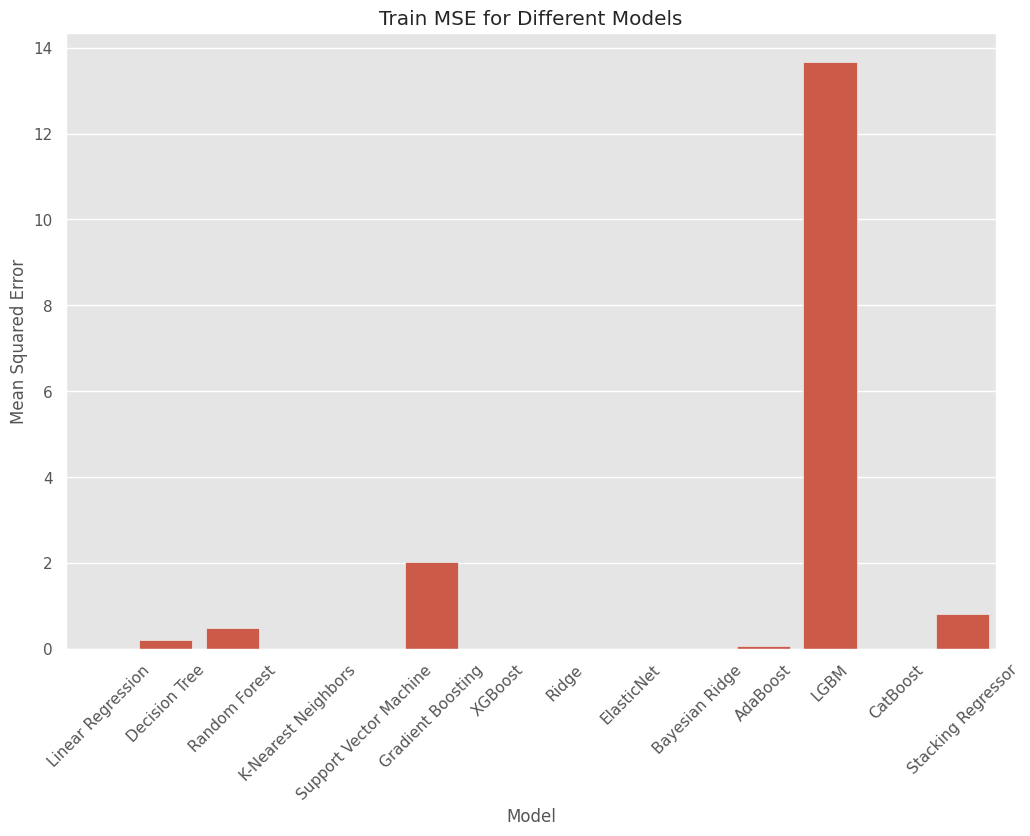

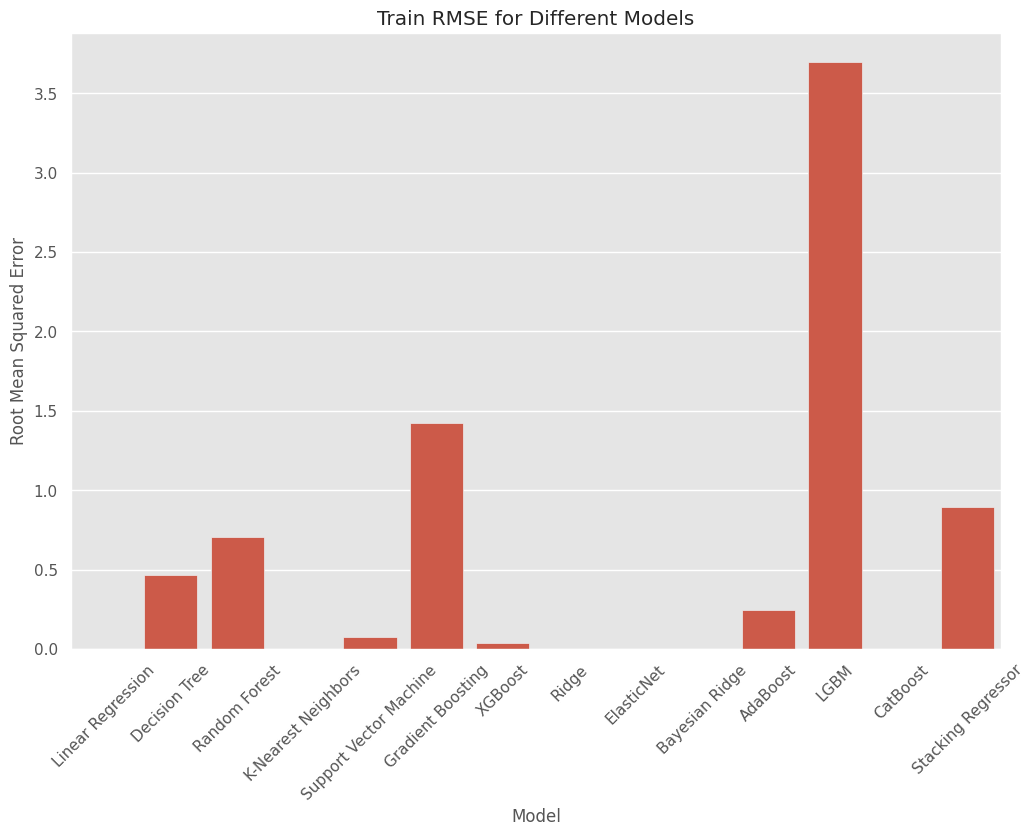

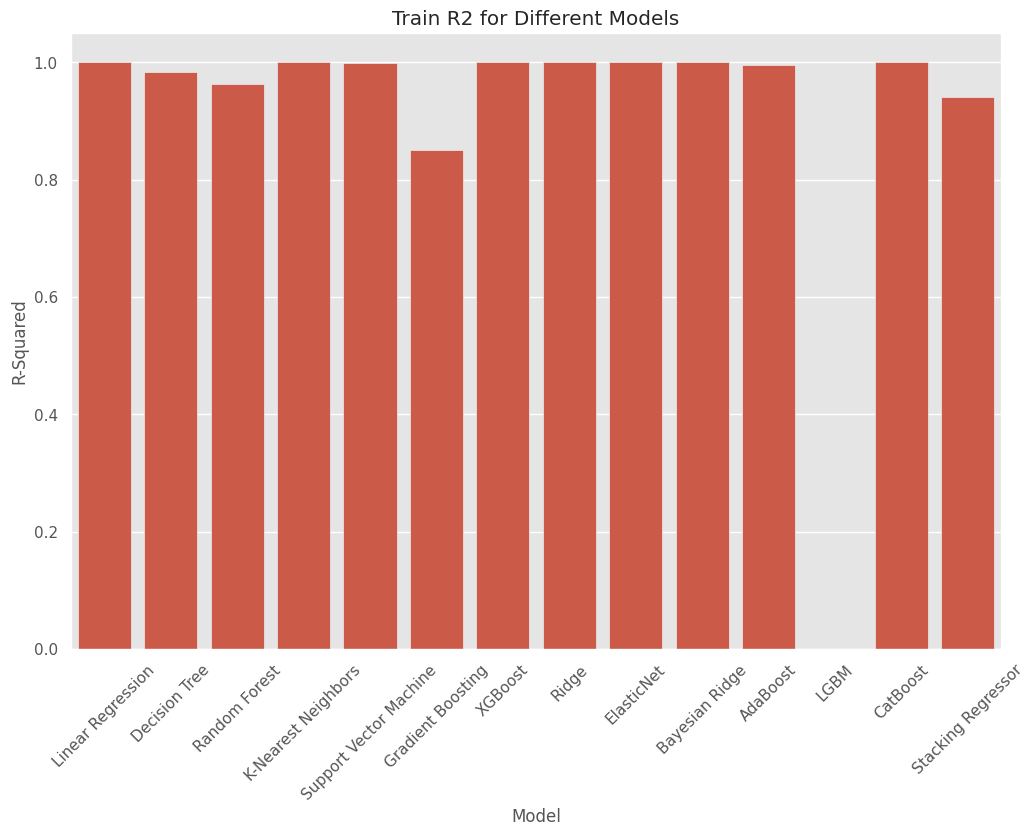

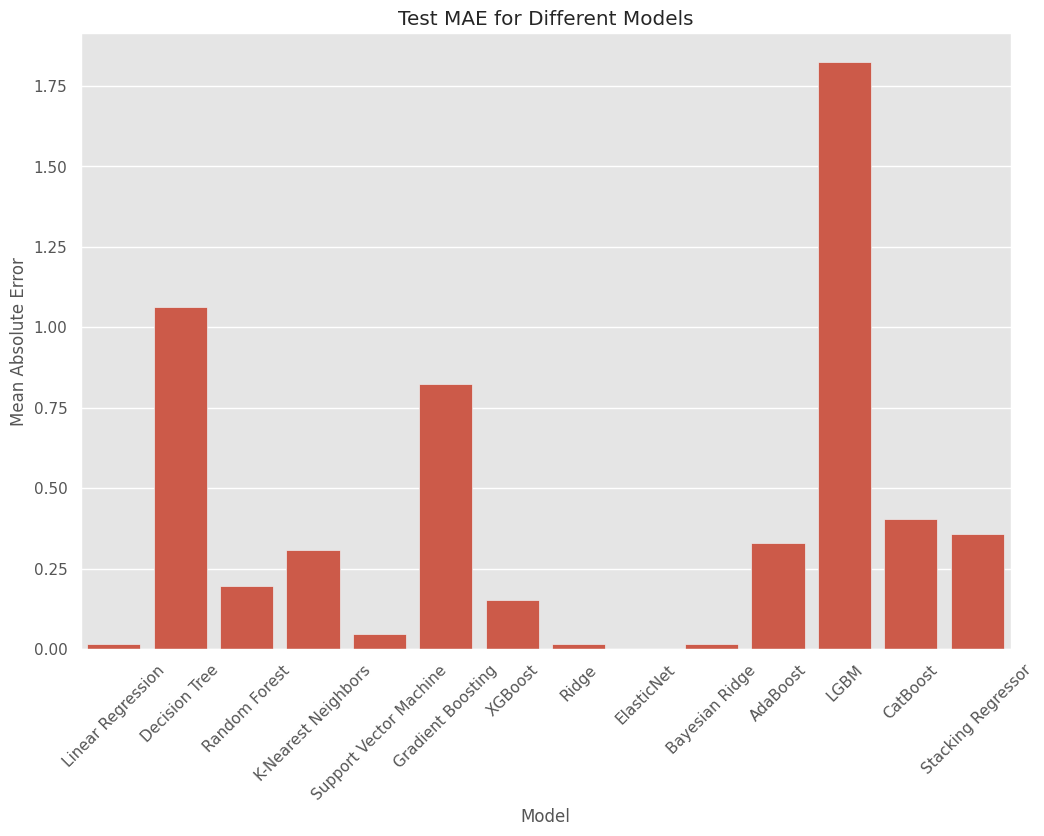

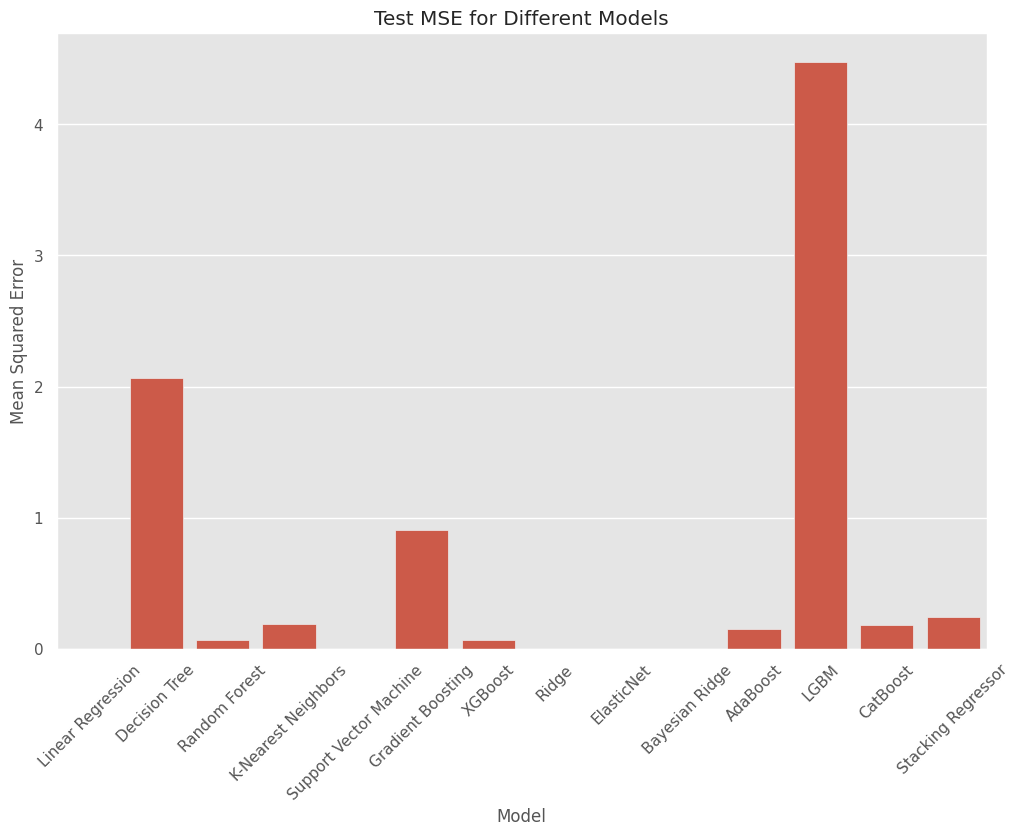

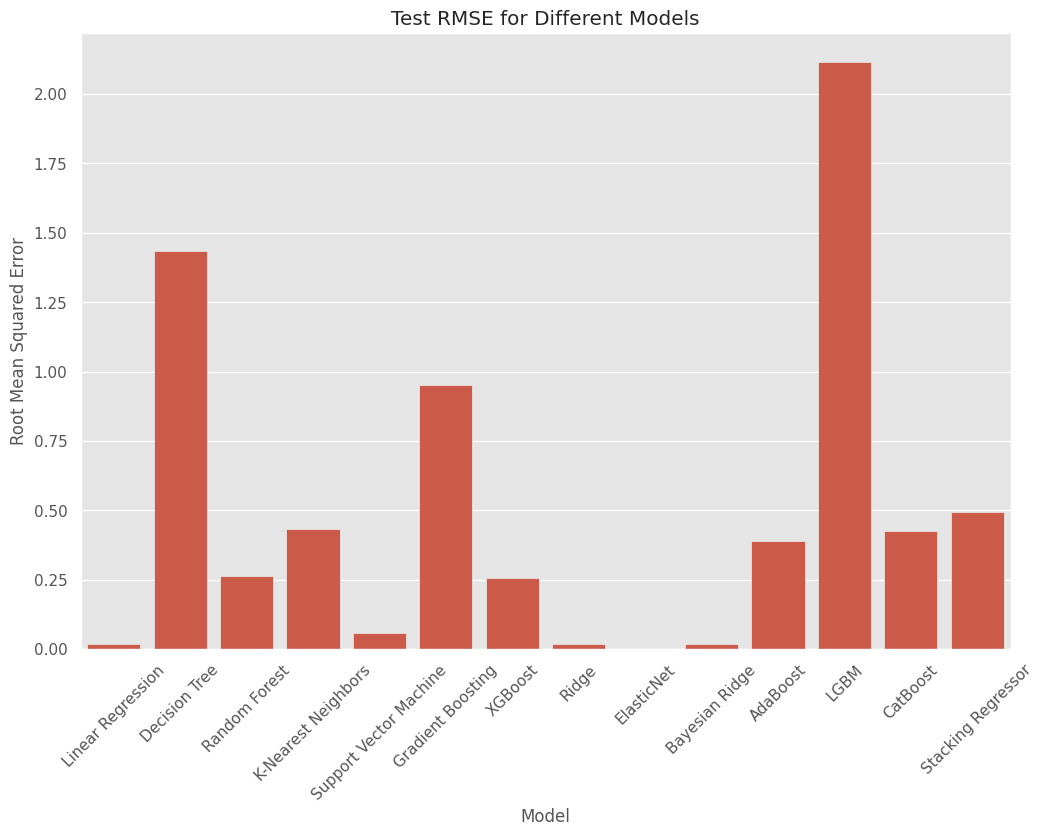

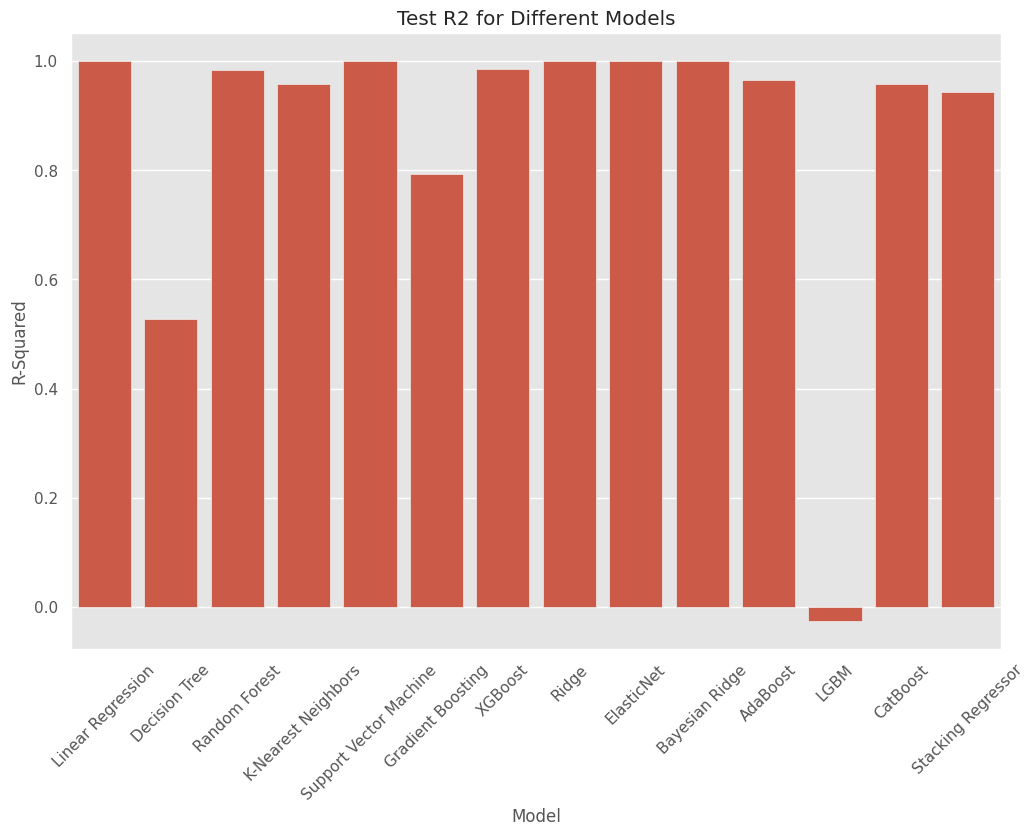

                     Model     Train MAE     Train MSE    Train RMSE  \
0        Linear Regression  3.824897e-15  2.362129e-29  4.860174e-15   
1            Decision Tree  2.473118e-01  2.190860e-01  4.680663e-01   
2            Random Forest  2.925350e-01  4.998141e-01  7.069753e-01   
3      K-Nearest Neighbors  0.000000e+00  0.000000e+00  0.000000e+00   
4   Support Vector Machine  6.876030e-02  6.100170e-03  7.810358e-02   
5        Gradient Boosting  9.557051e-01  2.034207e+00  1.426256e+00   
6                  XGBoost  2.518648e-02  1.584879e-03  3.981054e-02   
7                    Ridge  3.309693e-04  1.898891e-07  4.357627e-04   
8               ElasticNet  2.033775e-03  8.022301e-06  2.832367e-03   
9           Bayesian Ridge  1.350635e-06  3.484492e-12  1.866679e-06   
10                AdaBoost  1.713775e-01  5.936335e-02  2.436460e-01   
11                    LGBM  2.719043e+00  1.365765e+01  3.695626e+00   
12                CatBoost  1.286313e-03  2.725469e-06  1.650900

In [424]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the metrics
def plot_metrics(df, metric, title, ylabel):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Model', y=metric, data=df)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

# Plot metrics for training data
plot_metrics(results_df, 'Train MAE', 'Train MAE for Different Models', 'Mean Absolute Error')
plot_metrics(results_df, 'Train MSE', 'Train MSE for Different Models', 'Mean Squared Error')
plot_metrics(results_df, 'Train RMSE', 'Train RMSE for Different Models', 'Root Mean Squared Error')
plot_metrics(results_df, 'Train R2', 'Train R2 for Different Models', 'R-Squared')

# Plot metrics for test data
plot_metrics(results_df, 'Test MAE', 'Test MAE for Different Models', 'Mean Absolute Error')
plot_metrics(results_df, 'Test MSE', 'Test MSE for Different Models', 'Mean Squared Error')
plot_metrics(results_df, 'Test RMSE', 'Test RMSE for Different Models', 'Root Mean Squared Error')
plot_metrics(results_df, 'Test R2', 'Test R2 for Different Models', 'R-Squared')

# Print the results DataFrame for reference
print(results_df)


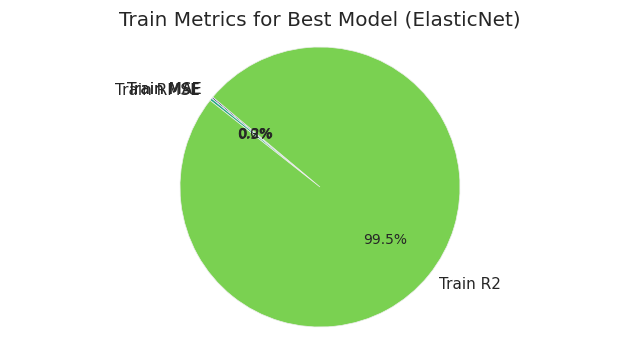

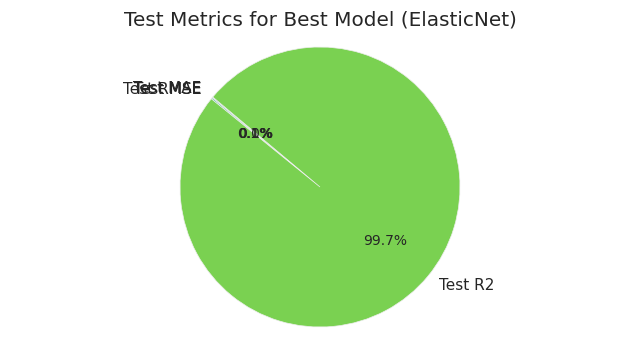

In [425]:
# Pie charts for the best model metrics (assuming the best model is the one with the lowest Test RMSE)
best_model = results_df.loc[results_df['Test RMSE'].idxmin()]

# Pie chart for Train Metrics
train_metrics = best_model[['Train MAE', 'Train MSE', 'Train RMSE', 'Train R2']]
plt.figure(figsize=(8, 4))
plt.pie(train_metrics, labels=train_metrics.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(train_metrics)))
plt.title(f'Train Metrics for Best Model ({best_model["Model"]})')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Pie chart for Test Metrics
test_metrics = best_model[['Test MAE', 'Test MSE', 'Test RMSE', 'Test R2']]
plt.figure(figsize=(8, 4))
plt.pie(test_metrics, labels=test_metrics.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(test_metrics)))
plt.title(f'Test Metrics for Best Model ({best_model["Model"]})')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

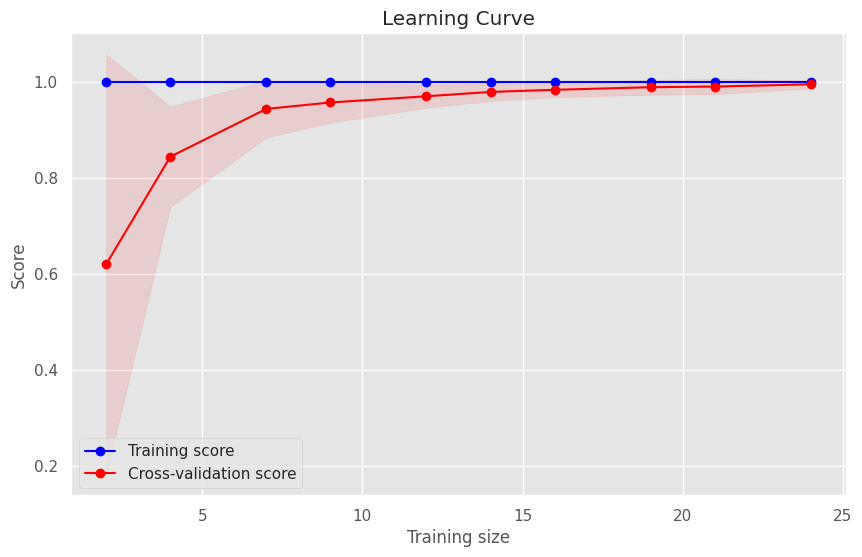

    Actual  Predicted     Error
33     9.5   9.488732  0.011268
36    11.5  11.489229  0.010771
4     11.5  11.497302  0.002698
13    11.0  11.019497 -0.019497
30    15.0  15.007426 -0.007426


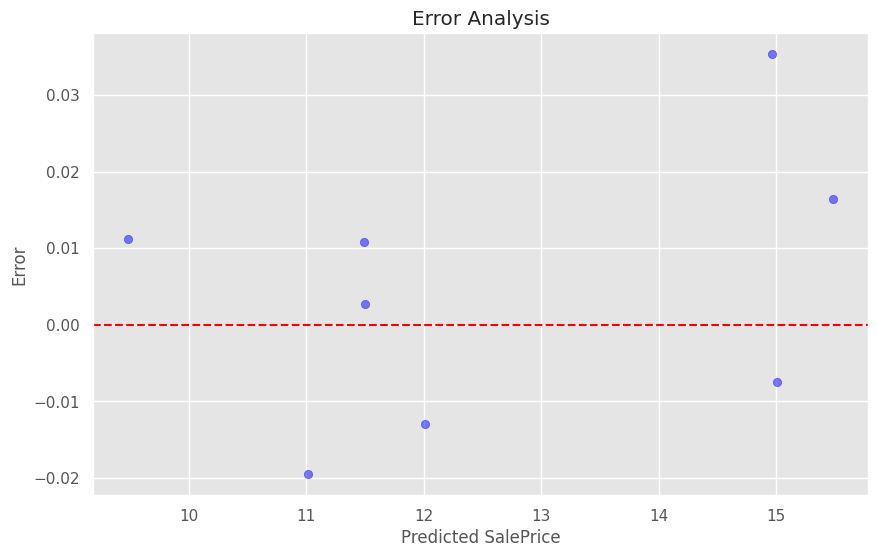

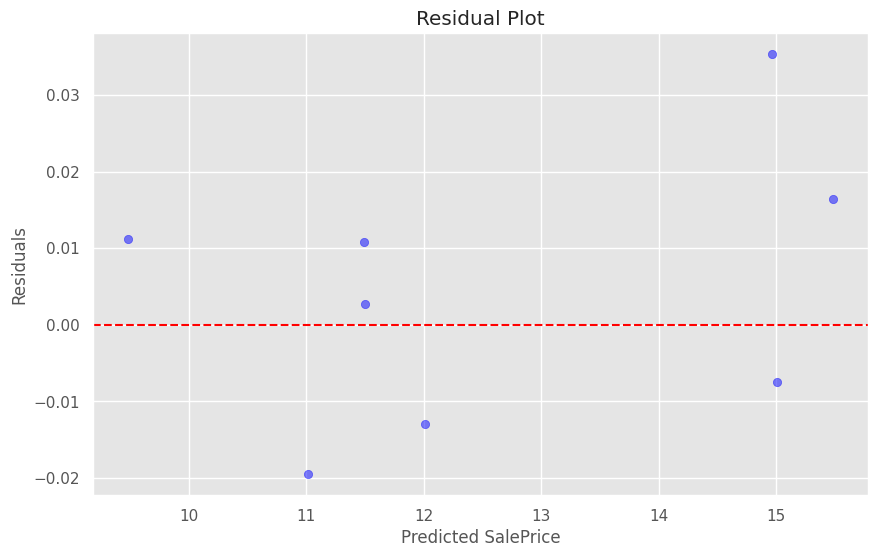

Random State 0:
Mean Absolute Error:  0.025669558810249054
Mean Squared Error:  0.0012429266713529397
Root Mean Squared Error:  0.03525516517267987
R² on Test data:  0.9998319423092256

Random State 1:
Mean Absolute Error:  0.03548637694577561
Mean Squared Error:  0.0018285338353536832
Root Mean Squared Error:  0.04276135913828843
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043237
Mean Squared Error:  0.0012368856317090916
Root Mean Squared Error:  0.03516938486395649
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.2529480559586771
Mean Squared Error:  0.2595729978853824
Root Mean Squared Error:  0.5094830692823682
R² on Test data:  0.9871507350651444

Random State 4:
Mean Absolute Error:  0.13808414828380278
Mean Squared Error:  0.0703261485760362
Root Mean Squared Error:  0.26519077769793614
R² on Test data:  0.9959181921019955

Baseline Mean Absolute Error:  1.8225806451612905


In [426]:
# Plot Learning Curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')

    # Plot the std deviation as a shaded area
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(lr, X_train, y_train)

# Error Analysis
errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': X_test_prediction,
    'Error': y_test - X_test_prediction
})
print(errors_df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()

# Residual Analysis
plt.figure(figsize=(10, 6))
plt.scatter(X_test_prediction, y_test - X_test_prediction, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Robustness Checks
for i in range(5):
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
    lr_sub = LinearRegression()
    lr_sub.fit(X_train_sub, y_train_sub)
    y_test_pred_sub = lr_sub.predict(X_test_sub)
    print(f"Random State {i}:")
    print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
    print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
    print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
    print()

# Comparison with Baseline
baseline_prediction = np.mean(y_train)  # or np.median(y_train)
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)


Training Linear Regression...


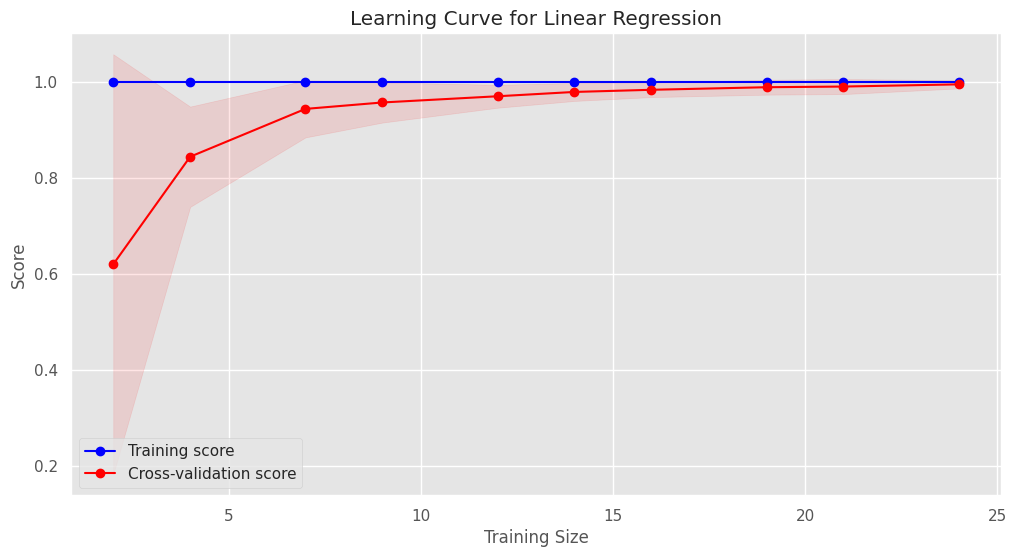

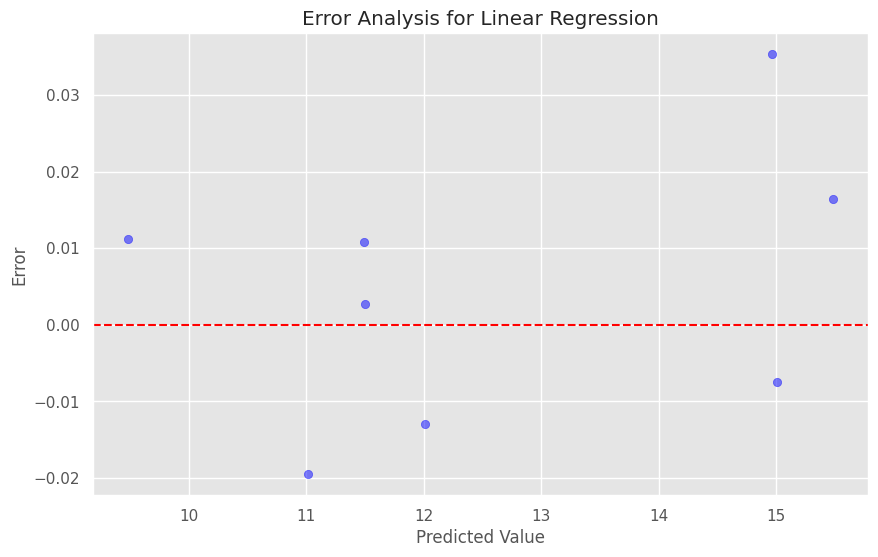

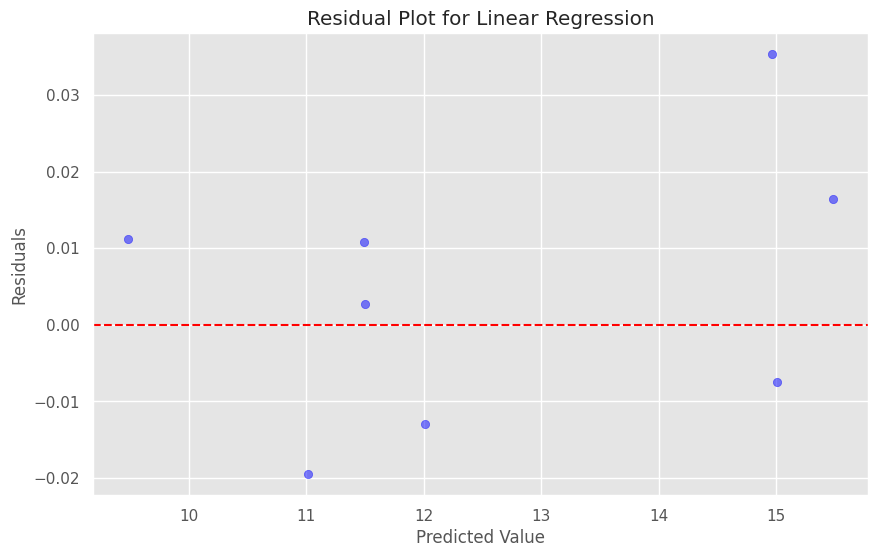

Robustness Check for Linear Regression:
Random State 0:
Mean Absolute Error:  0.025669558810249054
Mean Squared Error:  0.0012429266713529397
Root Mean Squared Error:  0.03525516517267987
R² on Test data:  0.9998319423092256

Random State 1:
Mean Absolute Error:  0.03548637694577561
Mean Squared Error:  0.0018285338353536832
Root Mean Squared Error:  0.04276135913828843
R² on Test data:  0.9998197440545672

Random State 2:
Mean Absolute Error:  0.02833226867043237
Mean Squared Error:  0.0012368856317090916
Root Mean Squared Error:  0.03516938486395649
R² on Test data:  0.9998009370986688

Random State 3:
Mean Absolute Error:  0.2529480559586771
Mean Squared Error:  0.2595729978853824
Root Mean Squared Error:  0.5094830692823682
R² on Test data:  0.9871507350651444

Random State 4:
Mean Absolute Error:  0.13808414828380278
Mean Squared Error:  0.0703261485760362
Root Mean Squared Error:  0.26519077769793614
R² on Test data:  0.9959181921019955

Cross-Validation MSE for Linear Regression

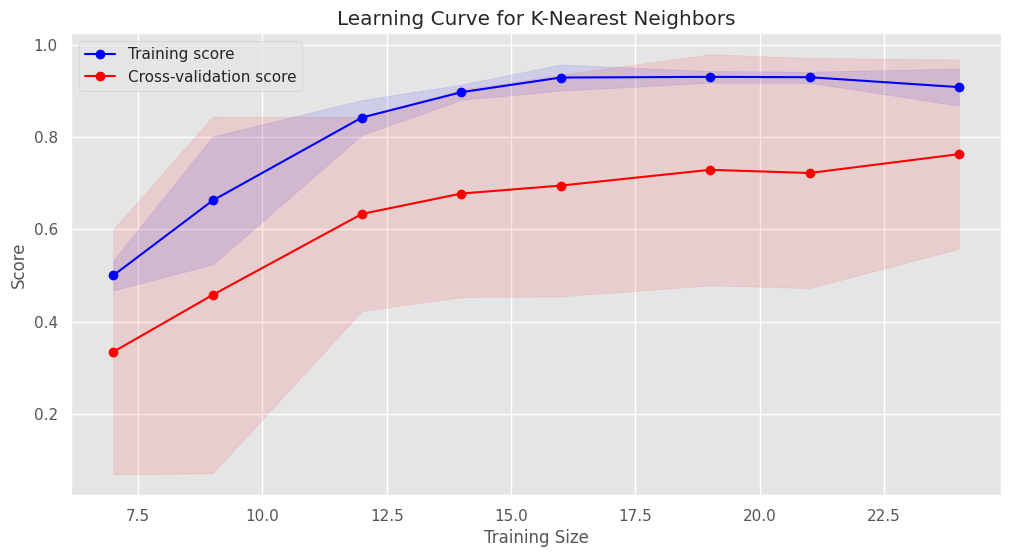

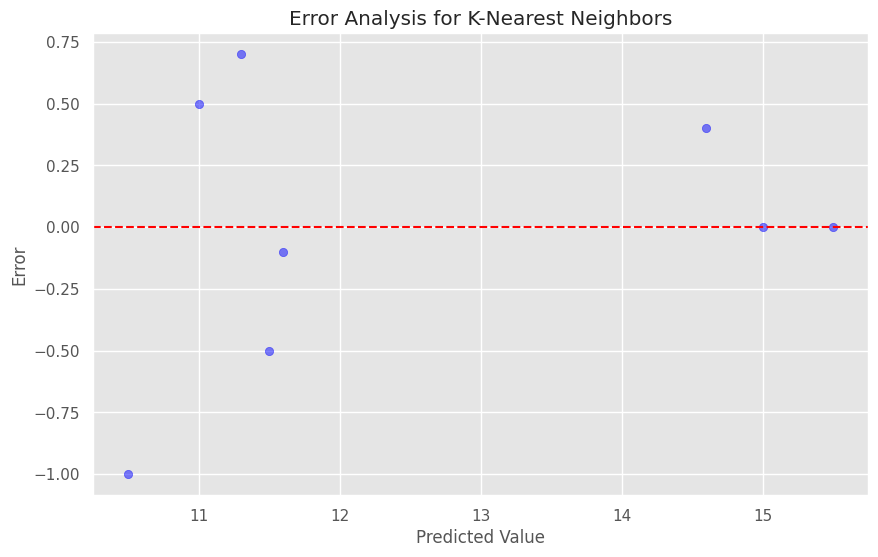

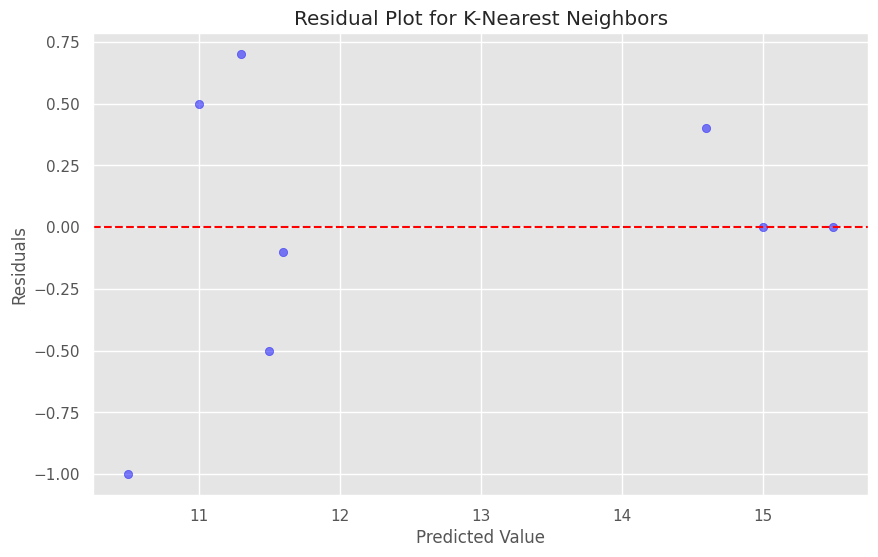

Robustness Check for K-Nearest Neighbors:
Random State 0:
Mean Absolute Error:  0.5499999999999999
Mean Squared Error:  0.5966666666666668
Root Mean Squared Error:  0.7724420150837645
R² on Test data:  0.9193239436619718

Random State 1:
Mean Absolute Error:  0.9333333333333335
Mean Squared Error:  1.9766666666666672
Root Mean Squared Error:  1.4059397805975429
R² on Test data:  0.8051411945918192

Random State 2:
Mean Absolute Error:  0.7999999999999998
Mean Squared Error:  1.0849999999999995
Root Mean Squared Error:  1.0416333327999827
R² on Test data:  0.8253813914501258

Random State 3:
Mean Absolute Error:  1.6416666666666668
Mean Squared Error:  10.4125
Root Mean Squared Error:  3.2268405600525103
R² on Test data:  0.48456514266070816

Random State 4:
Mean Absolute Error:  1.2166666666666666
Mean Squared Error:  7.2700000000000005
Root Mean Squared Error:  2.6962937525425525
R² on Test data:  0.5780411124546554

Cross-Validation MSE for K-Nearest Neighbors: 3.124607142857143
Trai

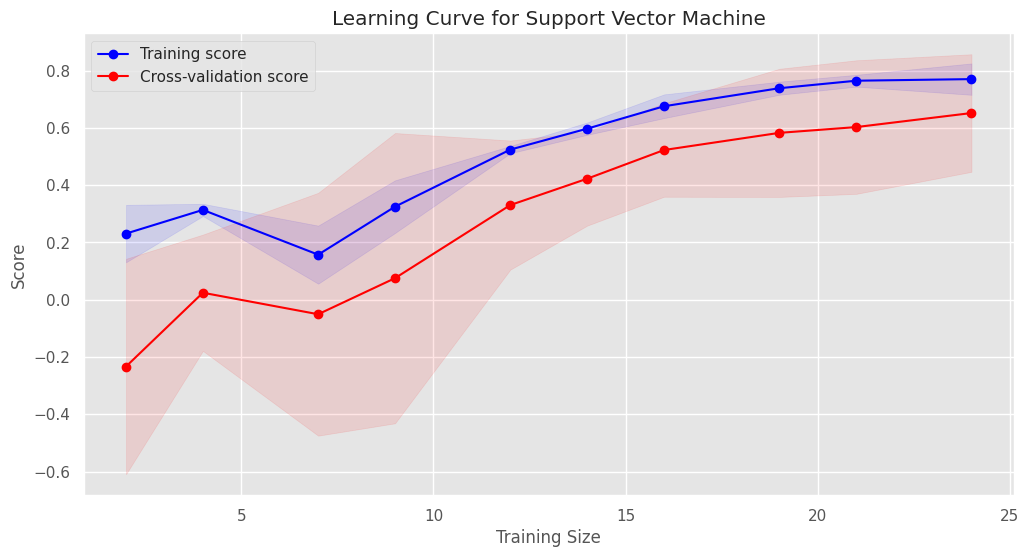

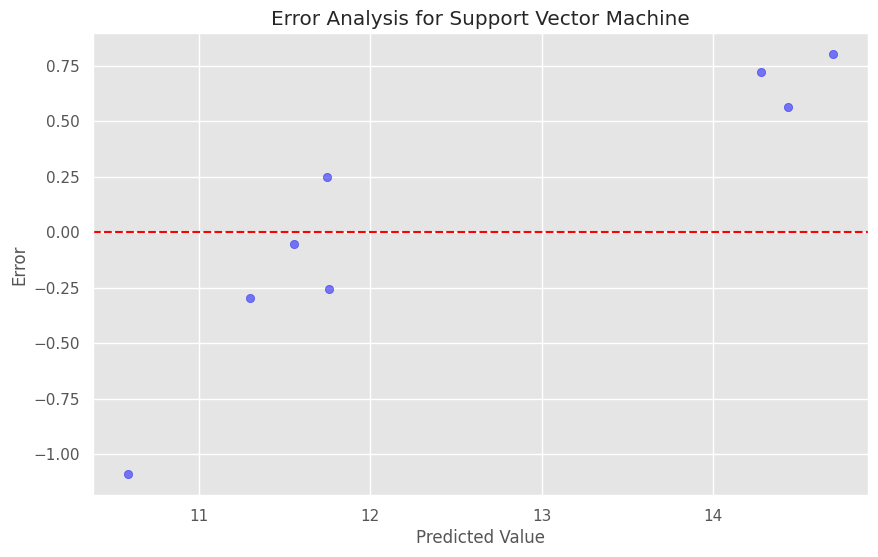

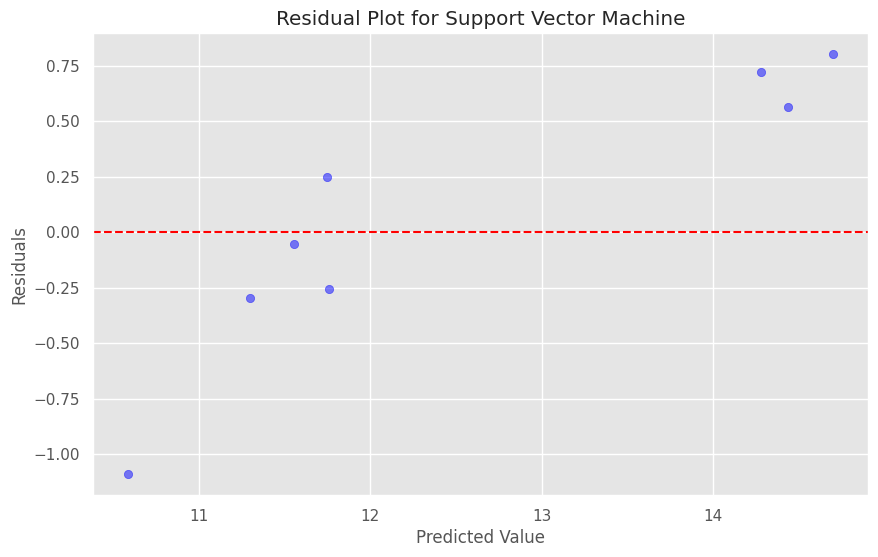

Robustness Check for Support Vector Machine:
Random State 0:
Mean Absolute Error:  0.8030471526752766
Mean Squared Error:  0.9222097552662647
Root Mean Squared Error:  0.9603175283552127
R² on Test data:  0.875306849992167

Random State 1:
Mean Absolute Error:  1.062060442922571
Mean Squared Error:  2.3635930146268334
Root Mean Squared Error:  1.5373981314632958
R² on Test data:  0.7669981898981592

Random State 2:
Mean Absolute Error:  0.9077271777938501
Mean Squared Error:  1.6275300132306307
Root Mean Squared Error:  1.2757468452755942
R² on Test data:  0.7380672568815749

Random State 3:
Mean Absolute Error:  2.0538037508363303
Mean Squared Error:  11.006366161055766
Root Mean Squared Error:  3.3175843864257266
R² on Test data:  0.45516784902302165

Random State 4:
Mean Absolute Error:  1.5138033576577634
Mean Squared Error:  8.470739197717627
Root Mean Squared Error:  2.9104534350711795
R² on Test data:  0.5083488736512138

Cross-Validation MSE for Support Vector Machine: 3.548224

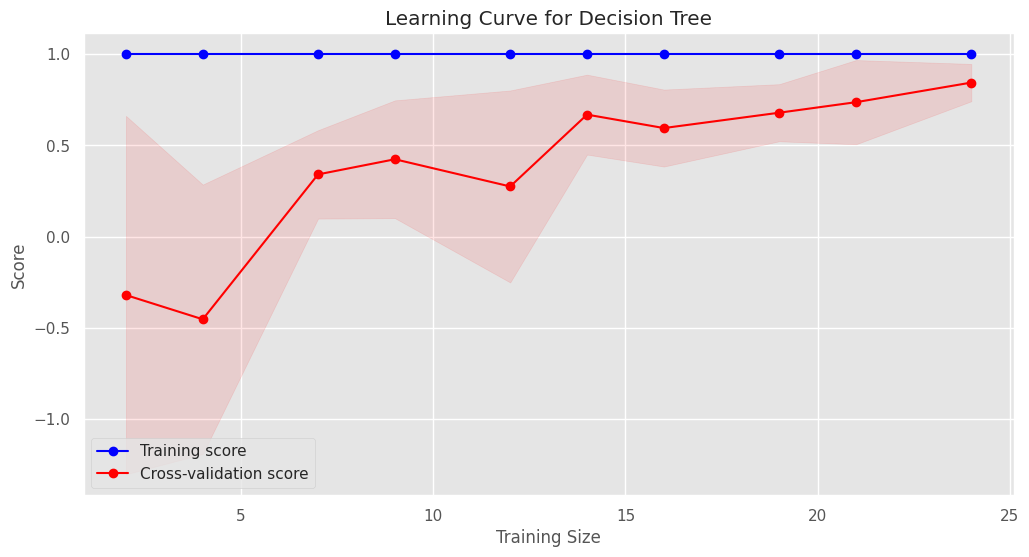

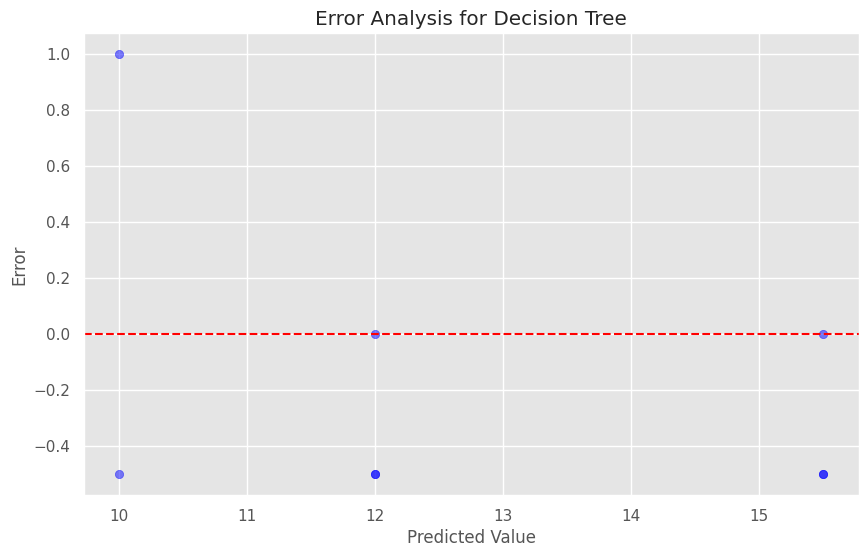

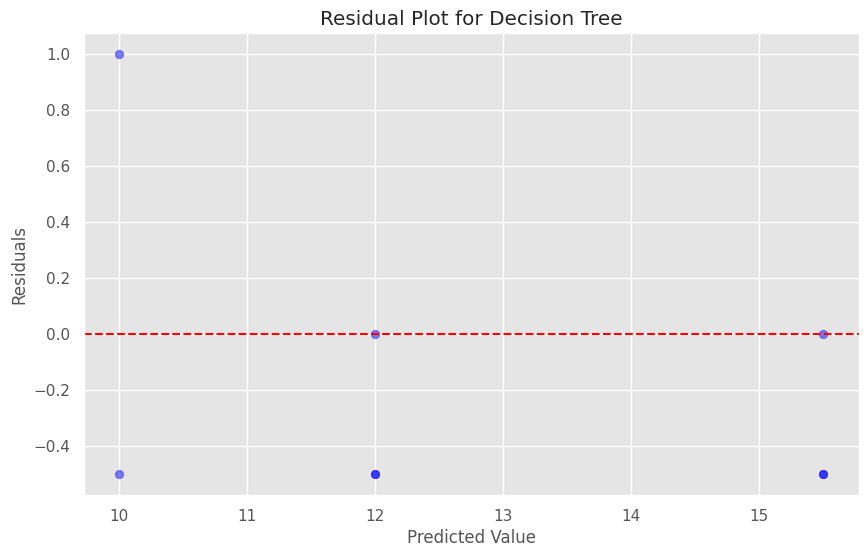

Robustness Check for Decision Tree:
Random State 0:
Mean Absolute Error:  0.7083333333333334
Mean Squared Error:  0.8541666666666666
Root Mean Squared Error:  0.924211375534118
R² on Test data:  0.8845070422535212

Random State 1:
Mean Absolute Error:  1.0416666666666667
Mean Squared Error:  2.1458333333333335
Root Mean Squared Error:  1.4648663192705789
R² on Test data:  0.788464829710765

Random State 2:
Mean Absolute Error:  0.7083333333333334
Mean Squared Error:  0.7708333333333334
Root Mean Squared Error:  0.8779711460710616
R² on Test data:  0.875943000838223

Random State 3:
Mean Absolute Error:  1.4583333333333333
Mean Squared Error:  7.8125
Root Mean Squared Error:  2.7950849718747373
R² on Test data:  0.6132691646613957

Random State 4:
Mean Absolute Error:  1.4583333333333333
Mean Squared Error:  8.479166666666666
Root Mean Squared Error:  2.9119008682760246
R² on Test data:  0.5078597339782346

Cross-Validation MSE for Decision Tree: 2.0125
Training ElasticNet...


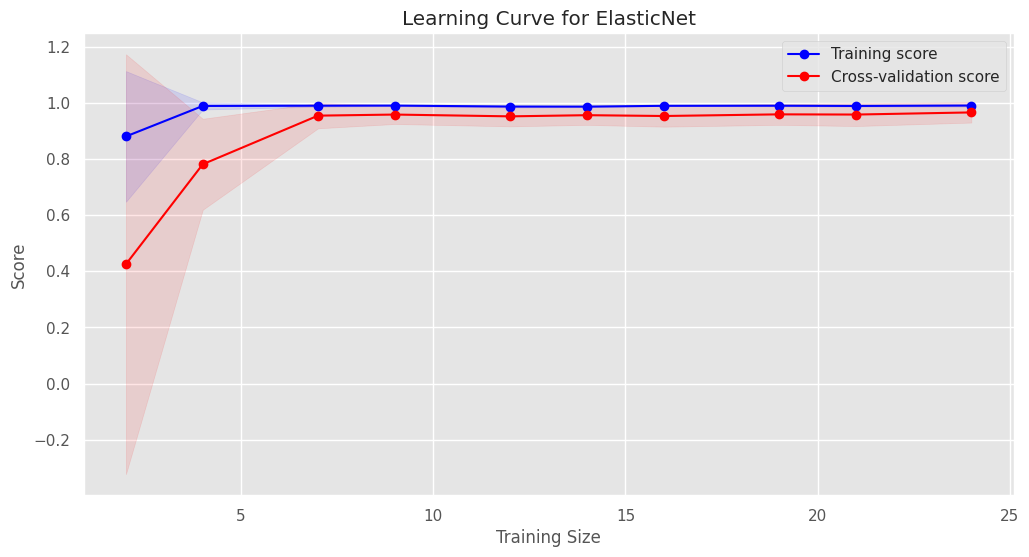

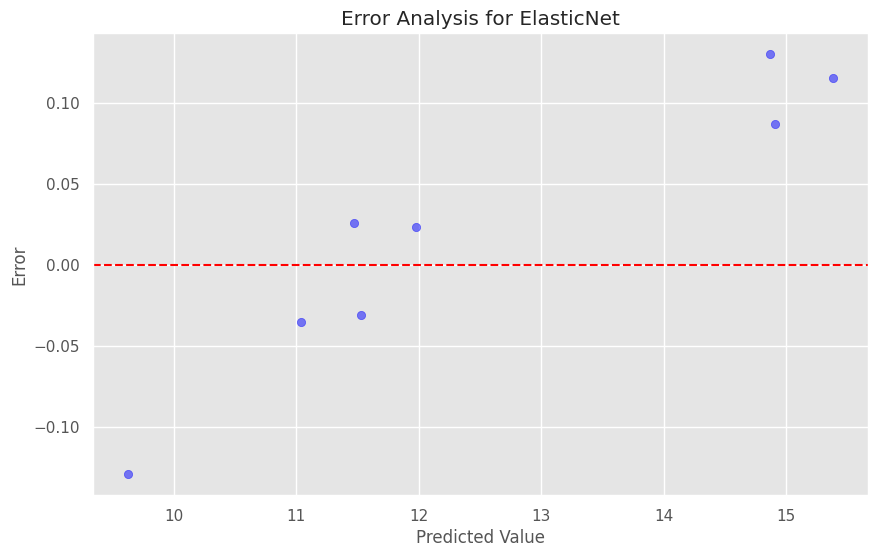

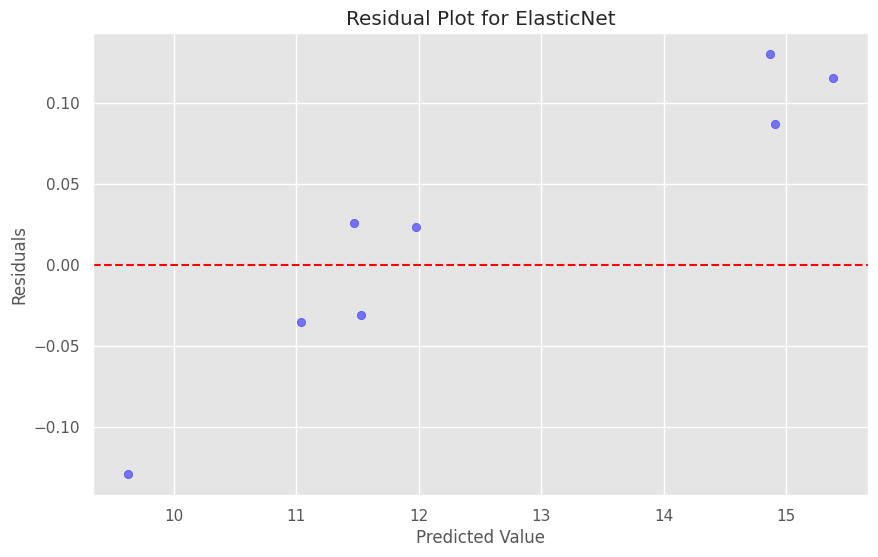

Robustness Check for ElasticNet:
Random State 0:
Mean Absolute Error:  0.10617349644151612
Mean Squared Error:  0.018950038016569862
Root Mean Squared Error:  0.13765913706169258
R² on Test data:  0.9974377413386046

Random State 1:
Mean Absolute Error:  0.10297178798901174
Mean Squared Error:  0.017729986870040623
Root Mean Squared Error:  0.13315399682337975
R² on Test data:  0.9982521868154812

Random State 2:
Mean Absolute Error:  0.12437953710781373
Mean Squared Error:  0.022690870272164435
Root Mean Squared Error:  0.15063489062021598
R² on Test data:  0.9963481583468101

Random State 3:
Mean Absolute Error:  0.6883406191290967
Mean Squared Error:  1.7445467244222748
Root Mean Squared Error:  1.3208129028830218
R² on Test data:  0.9136422384610493

Random State 4:
Mean Absolute Error:  0.7493865027689447
Mean Squared Error:  1.8668132851785417
Root Mean Squared Error:  1.3663137579555225
R² on Test data:  0.8916480801831076

Cross-Validation MSE for ElasticNet: 0.5064280622092334

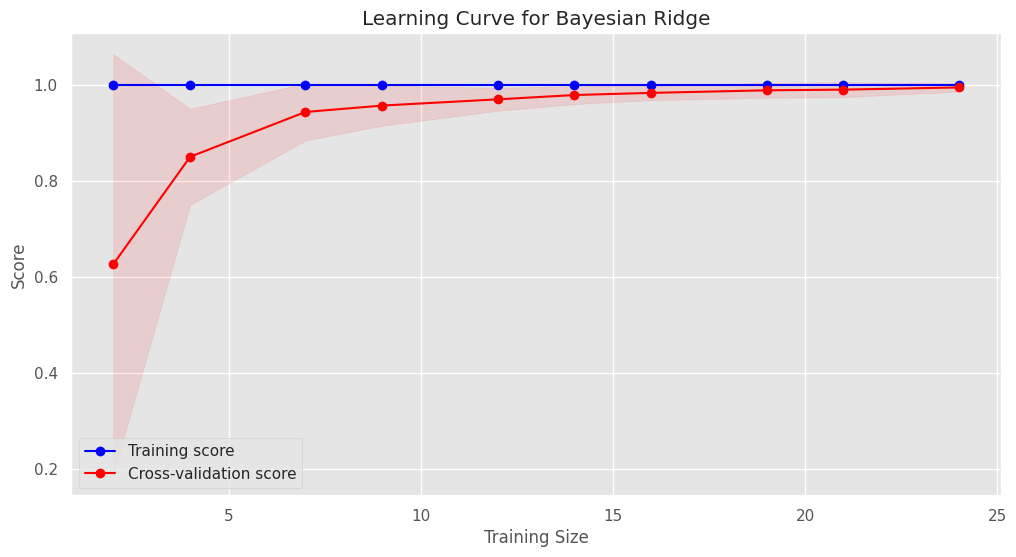

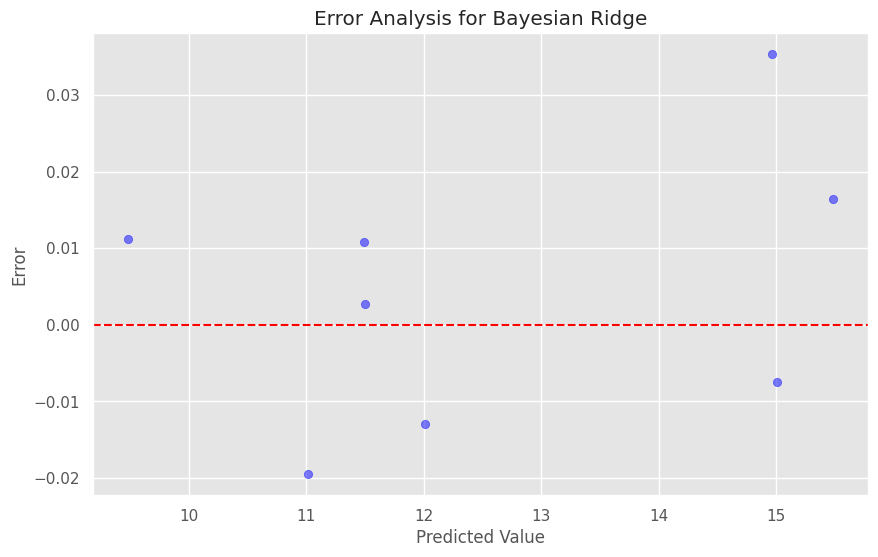

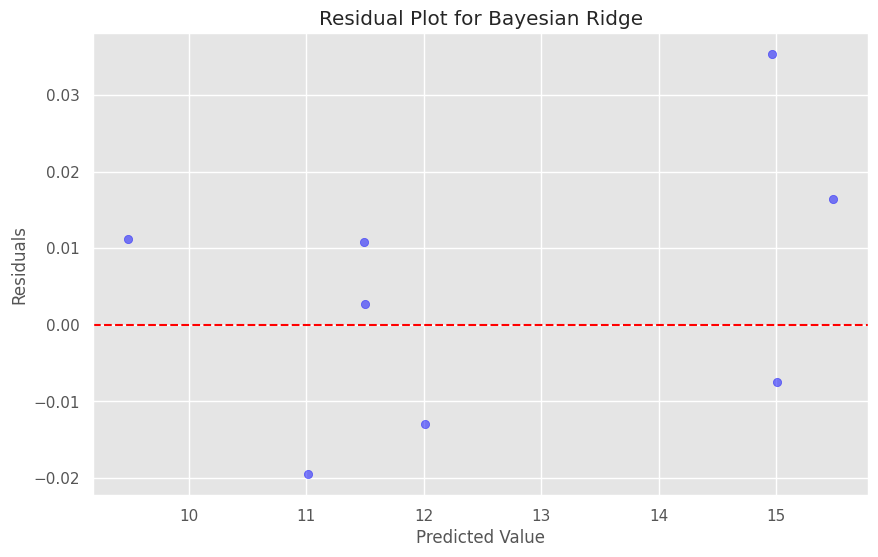

Robustness Check for Bayesian Ridge:
Random State 0:
Mean Absolute Error:  0.025669264649379093
Mean Squared Error:  0.001243000378267645
Root Mean Squared Error:  0.03525621049216216
R² on Test data:  0.9998319323432201

Random State 1:
Mean Absolute Error:  0.03548810499187701
Mean Squared Error:  0.0018288475623160995
Root Mean Squared Error:  0.0427650273274331
R² on Test data:  0.9998197131275212

Random State 2:
Mean Absolute Error:  0.028330585064314295
Mean Squared Error:  0.0012369880673245872
Root Mean Squared Error:  0.035170841151792025
R² on Test data:  0.9998009206128028

Random State 3:
Mean Absolute Error:  0.252985785093935
Mean Squared Error:  0.25963137822424953
Root Mean Squared Error:  0.5095403597599012
R² on Test data:  0.9871478451480605

Random State 4:
Mean Absolute Error:  0.138128613673044
Mean Squared Error:  0.0703878358825523
Root Mean Squared Error:  0.26530705961687545
R² on Test data:  0.9959146117021009

Cross-Validation MSE for Bayesian Ridge: 0.0037

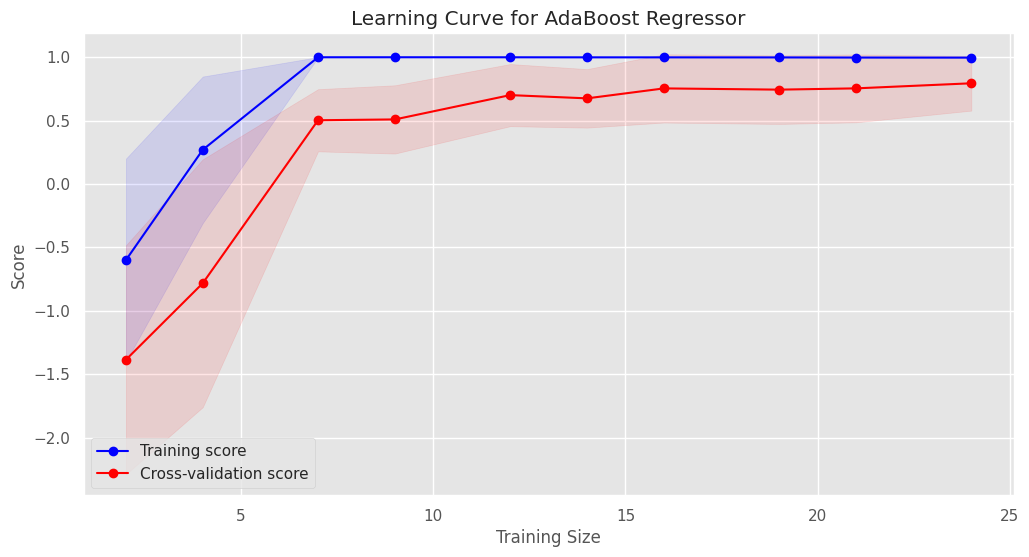

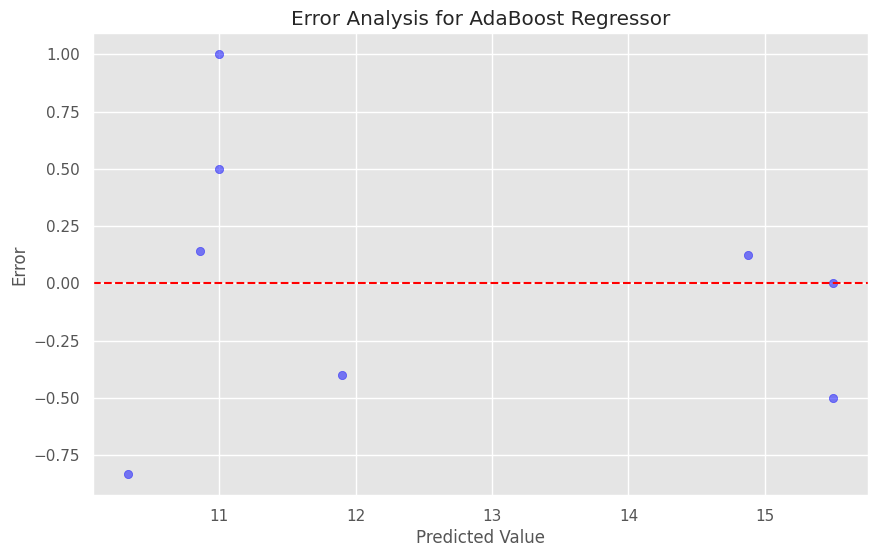

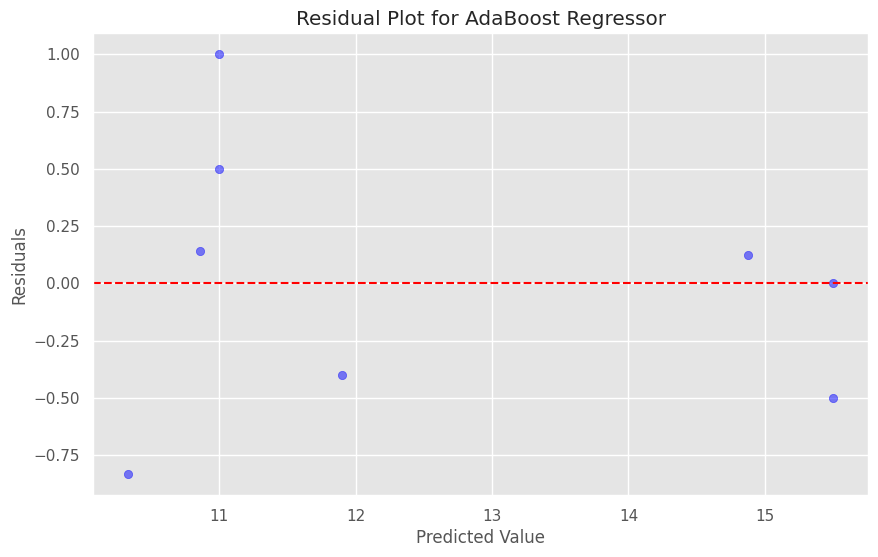

Robustness Check for AdaBoost Regressor:
Random State 0:
Mean Absolute Error:  0.43521825396825414
Mean Squared Error:  0.38963960931594893
Root Mean Squared Error:  0.6242111896753766
R² on Test data:  0.9473163345150266

Random State 1:
Mean Absolute Error:  1.1518022486772486
Mean Squared Error:  2.5244919644169386
Root Mean Squared Error:  1.58886499250784
R² on Test data:  0.7511368523867608

Random State 2:
Mean Absolute Error:  0.8094907407407409
Mean Squared Error:  1.2527038323045272
Root Mean Squared Error:  1.1192425261329768
R² on Test data:  0.7983913362929848

Random State 3:
Mean Absolute Error:  1.6701388888888886
Mean Squared Error:  10.480075231481482
Root Mean Squared Error:  3.237294430767996
R² on Test data:  0.4812200641686719

Random State 4:
Mean Absolute Error:  0.9459325396825397
Mean Squared Error:  3.4428175784202573
Root Mean Squared Error:  1.8554831118660868
R² on Test data:  0.8001750377700455

Cross-Validation MSE for AdaBoost Regressor: 2.1285846908241

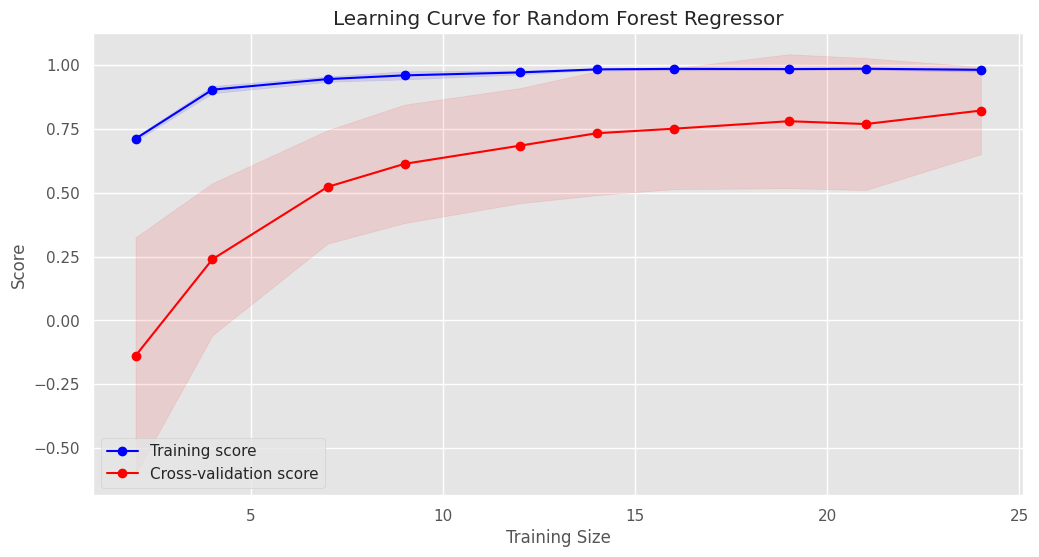

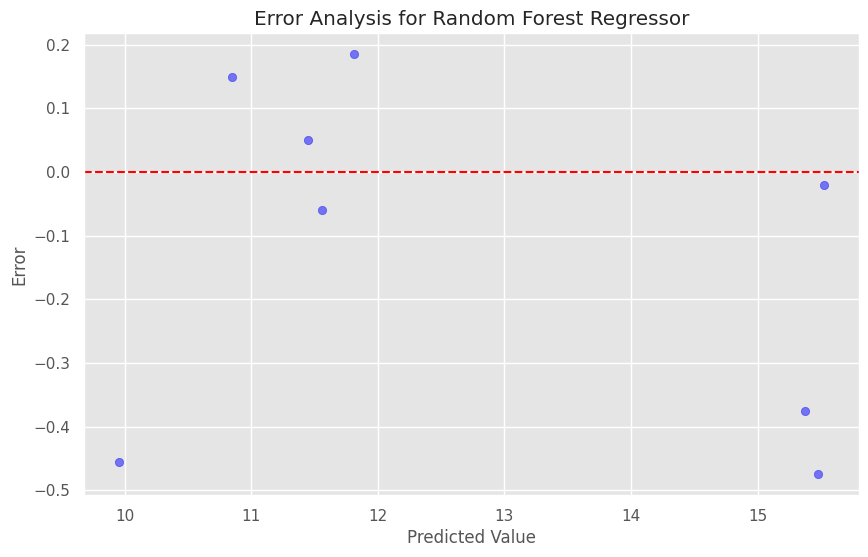

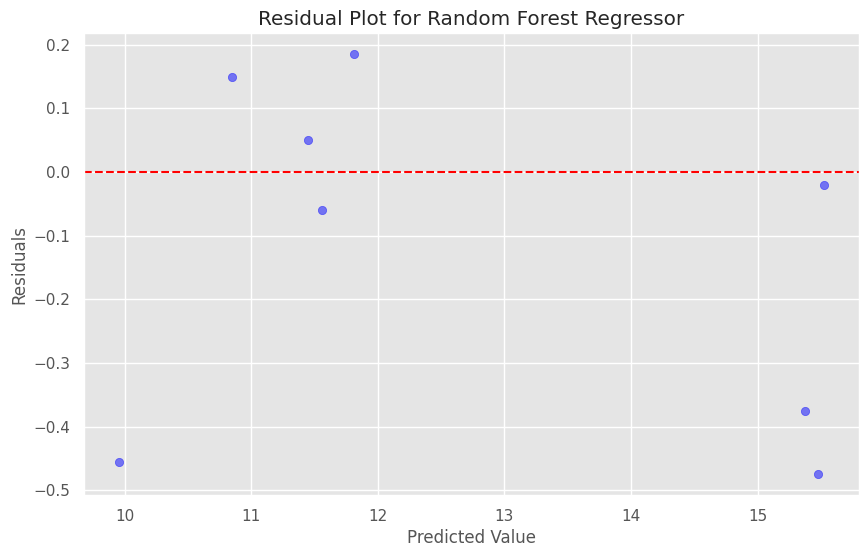

Robustness Check for Random Forest Regressor:
Random State 0:
Mean Absolute Error:  0.4133333333333337
Mean Squared Error:  0.24523333333333355
Root Mean Squared Error:  0.49521039299810093
R² on Test data:  0.9668416901408451

Random State 1:
Mean Absolute Error:  0.7862500000000002
Mean Squared Error:  1.179947916666667
Root Mean Squared Error:  1.086254075558139
R² on Test data:  0.8836813280848879

Random State 2:
Mean Absolute Error:  0.6237499999999997
Mean Squared Error:  0.805964583333333
Root Mean Squared Error:  0.8977553025927126
R² on Test data:  0.8702890192791283

Random State 3:
Mean Absolute Error:  1.5670833333333334
Mean Squared Error:  10.138047916666668
Root Mean Squared Error:  3.184030137524874
R² on Test data:  0.49815094534204185

Random State 4:
Mean Absolute Error:  0.9800000000000003
Mean Squared Error:  5.3000750000000005
Root Mean Squared Error:  2.3021891755457458
R² on Test data:  0.6923777509068924

Cross-Validation MSE for Random Forest Regressor: 2.164

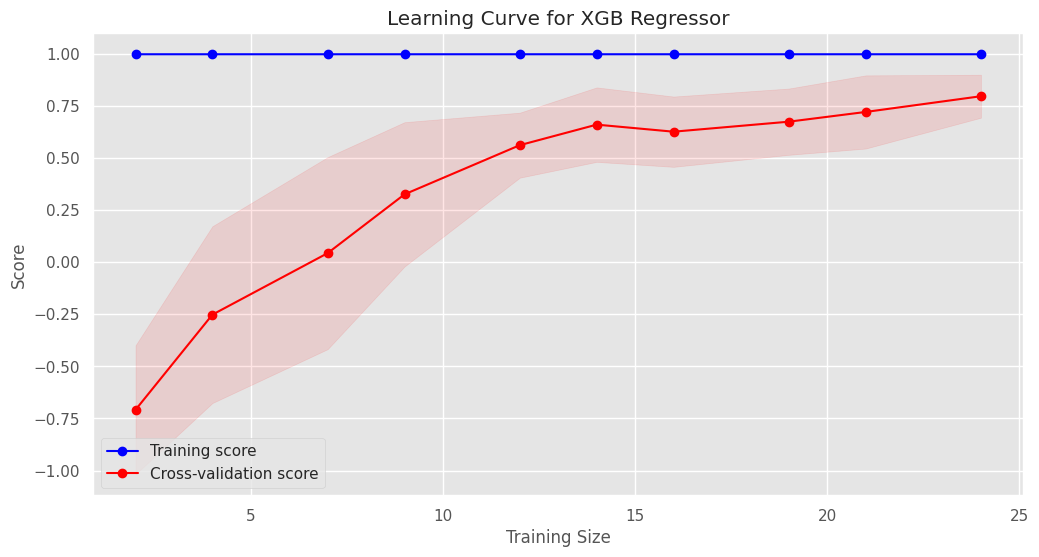

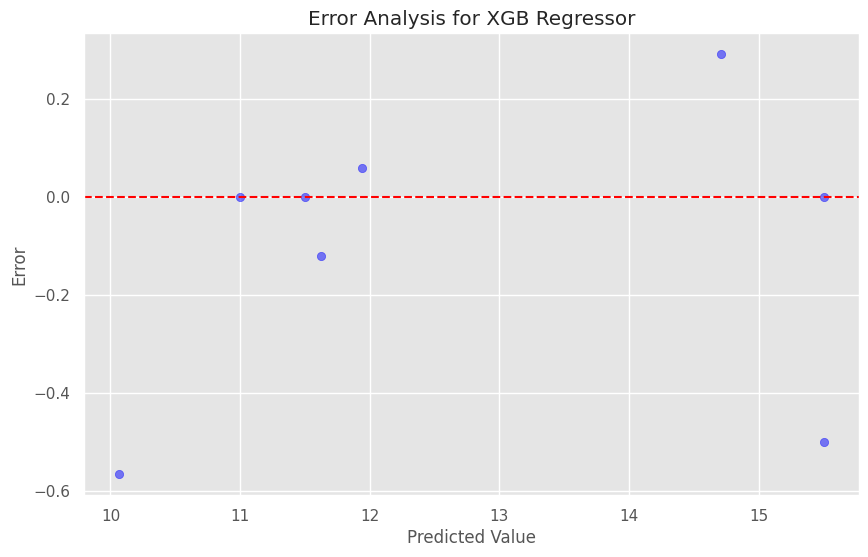

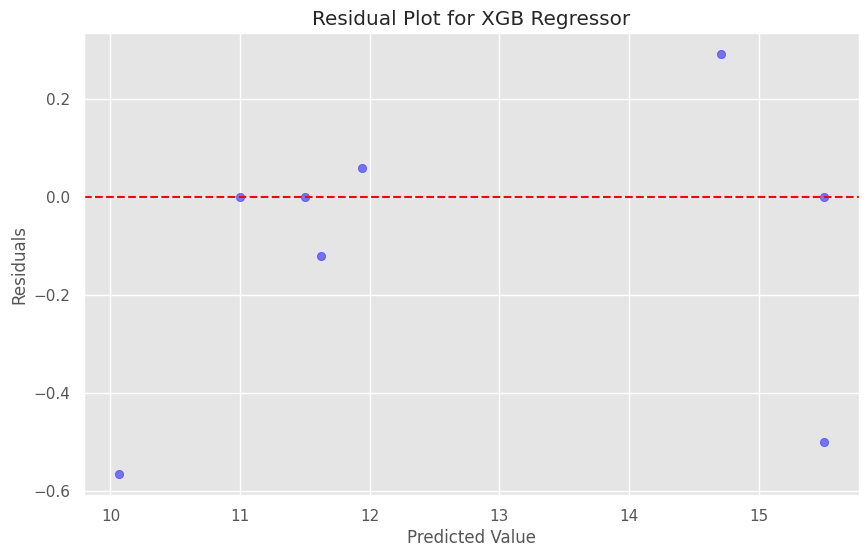

Robustness Check for XGB Regressor:
Random State 0:
Mean Absolute Error:  0.6765883763631185
Mean Squared Error:  1.0356395432894108
Root Mean Squared Error:  1.017663767306968
R² on Test data:  0.8599698645693191

Random State 1:
Mean Absolute Error:  1.6362357536951702
Mean Squared Error:  4.028949266276432
Root Mean Squared Error:  2.0072242690532693
R² on Test data:  0.6028282085614881

Random State 2:
Mean Absolute Error:  0.6769970258076986
Mean Squared Error:  0.8755700074455793
Root Mean Squared Error:  0.9357189788849959
R² on Test data:  0.8590868051722119

Random State 3:
Mean Absolute Error:  1.468701442082723
Mean Squared Error:  8.603958758059207
Root Mean Squared Error:  2.933250544713016
R² on Test data:  0.5740907318114383

Random State 4:
Mean Absolute Error:  0.9379409154256185
Mean Squared Error:  3.628711438107075
Root Mean Squared Error:  1.9049176985127403
R² on Test data:  0.789385551355333

Cross-Validation MSE for XGB Regressor: 2.7014820352110998
Training Rid

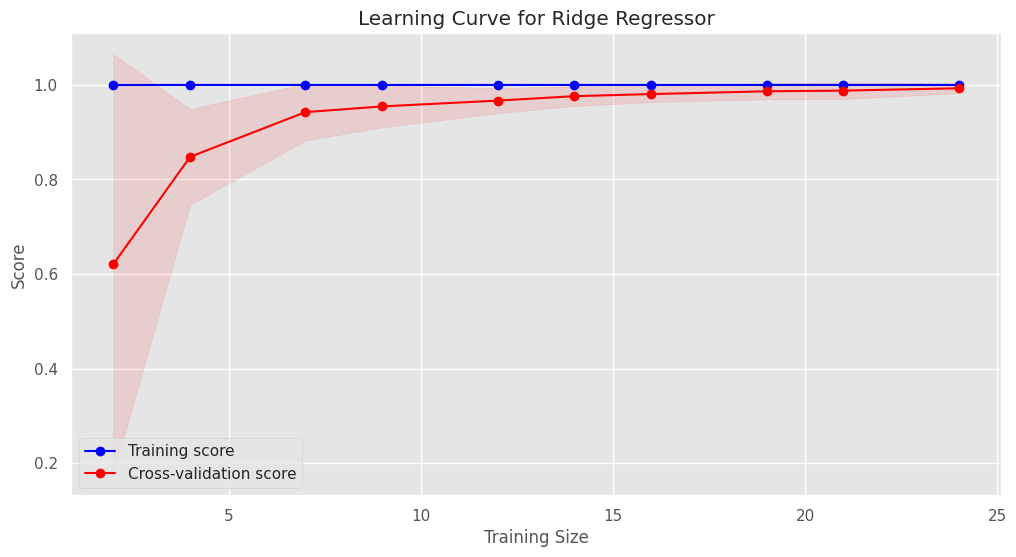

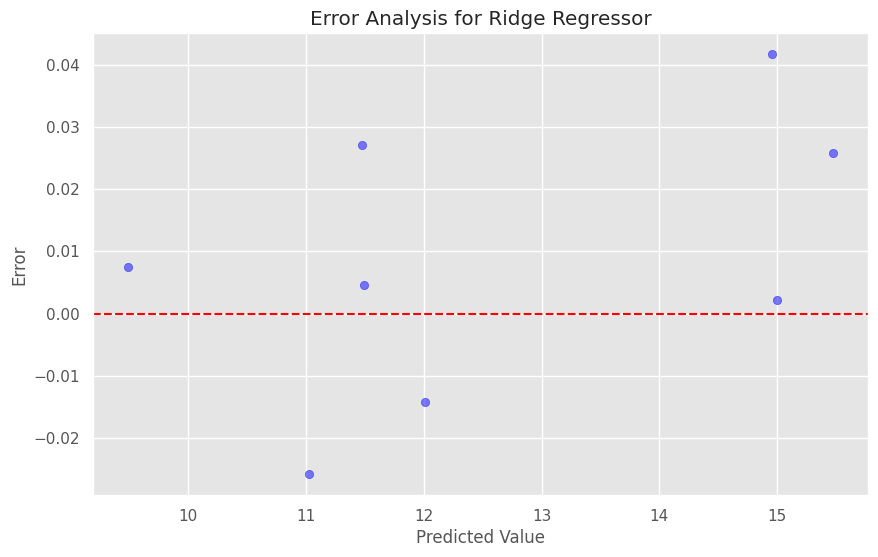

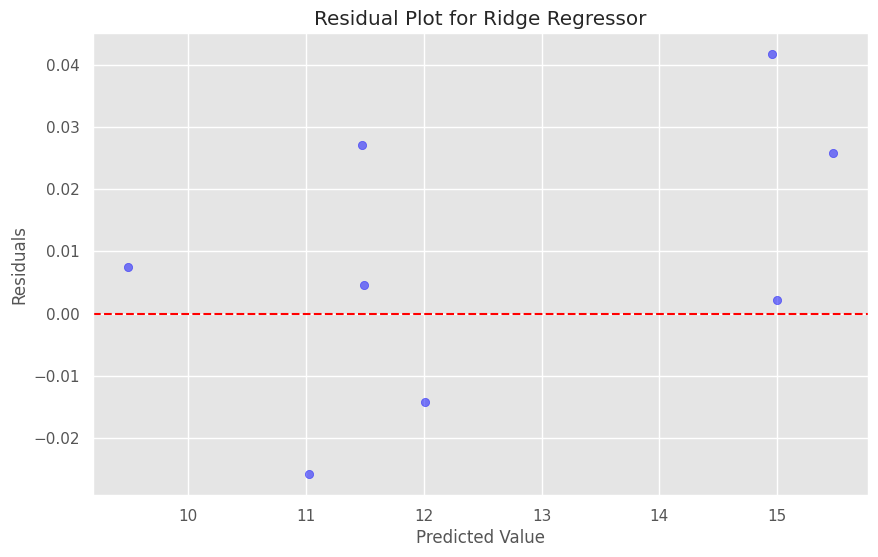

Robustness Check for Ridge Regressor:
Random State 0:
Mean Absolute Error:  0.02974588097495534
Mean Squared Error:  0.0018682334057723742
Root Mean Squared Error:  0.043223065668371724
R² on Test data:  0.9997473937930224

Random State 1:
Mean Absolute Error:  0.043448390417072824
Mean Squared Error:  0.0033821670166799666
Root Mean Squared Error:  0.058156401338803336
R² on Test data:  0.9996665876772878

Random State 2:
Mean Absolute Error:  0.03809718684604402
Mean Squared Error:  0.0021011803701914715
Root Mean Squared Error:  0.045838634034965214
R² on Test data:  0.9996618385322072

Random State 3:
Mean Absolute Error:  0.3175433485812776
Mean Squared Error:  0.3897305183414868
Root Mean Squared Error:  0.624284004553606
R² on Test data:  0.9807077364588608

Random State 4:
Mean Absolute Error:  0.22251968663495894
Mean Squared Error:  0.23509767120511935
Root Mean Squared Error:  0.48486871543245535
R² on Test data:  0.9863546696277561

Cross-Validation MSE for Ridge Regressor:

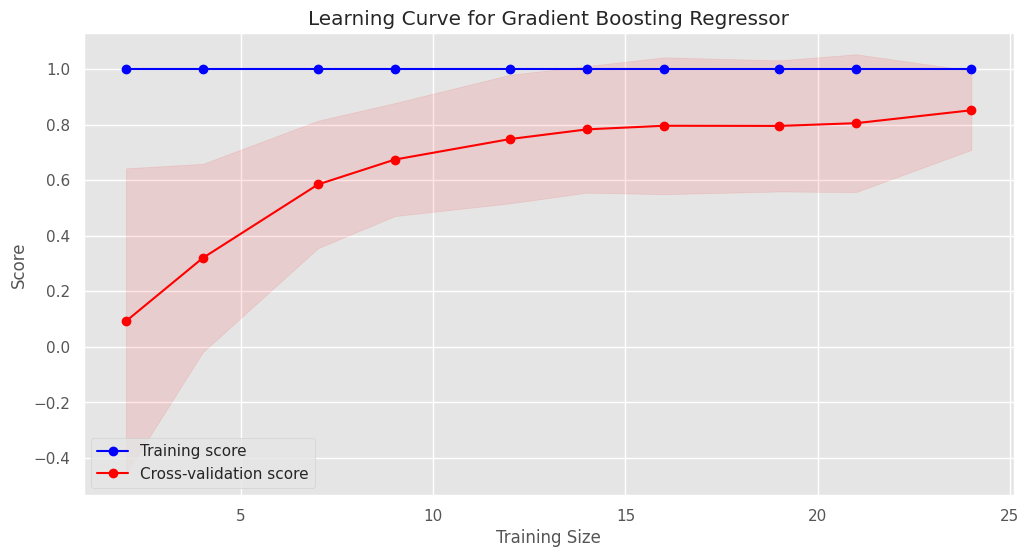

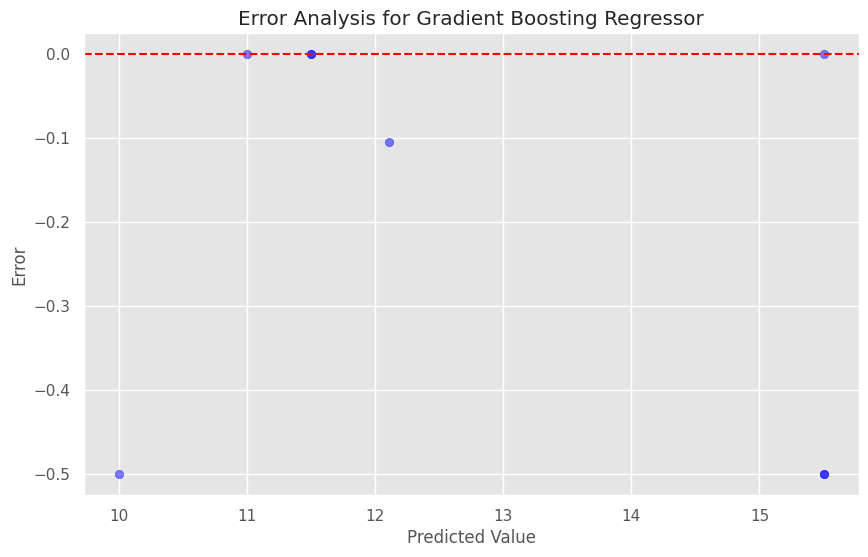

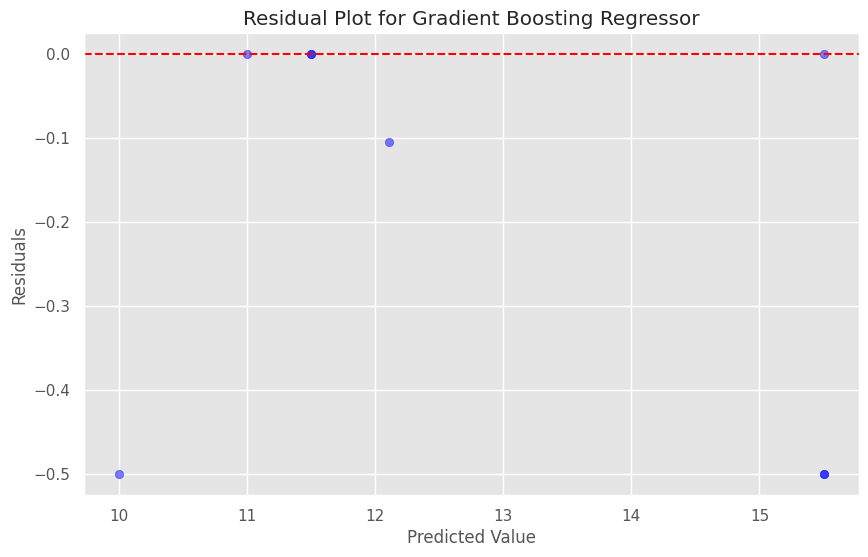

Robustness Check for Gradient Boosting Regressor:
Random State 0:
Mean Absolute Error:  0.4353347881258654
Mean Squared Error:  0.3406770076801752
Root Mean Squared Error:  0.5836754300809442
R² on Test data:  0.9539366299474693

Random State 1:
Mean Absolute Error:  0.5425446307422647
Mean Squared Error:  0.9711735346264733
Root Mean Squared Error:  0.9854813720342325
R² on Test data:  0.9042622016182015

Random State 2:
Mean Absolute Error:  0.3812767944943937
Mean Squared Error:  0.42029420931102934
Root Mean Squared Error:  0.6483010175150347
R² on Test data:  0.9323583502198511

Random State 3:
Mean Absolute Error:  1.3454515204672022
Mean Squared Error:  8.48647525830425
Root Mean Squared Error:  2.9131555499671227
R² on Test data:  0.5799063467872767

Random State 4:
Mean Absolute Error:  0.8826217007234717
Mean Squared Error:  4.349158623876964
Root Mean Squared Error:  2.0854636472201964
R² on Test data:  0.7475699952284229

Cross-Validation MSE for Gradient Boosting Regressor

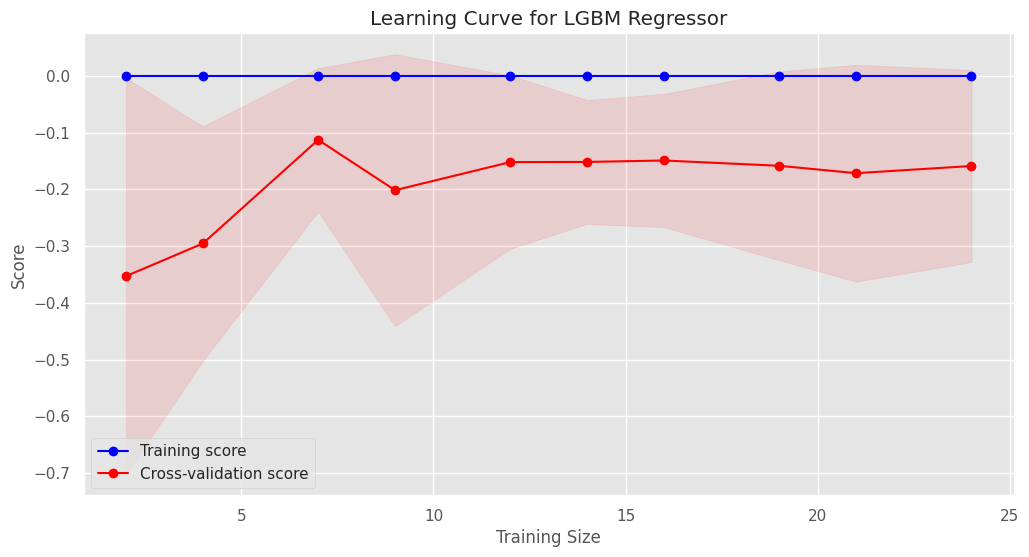

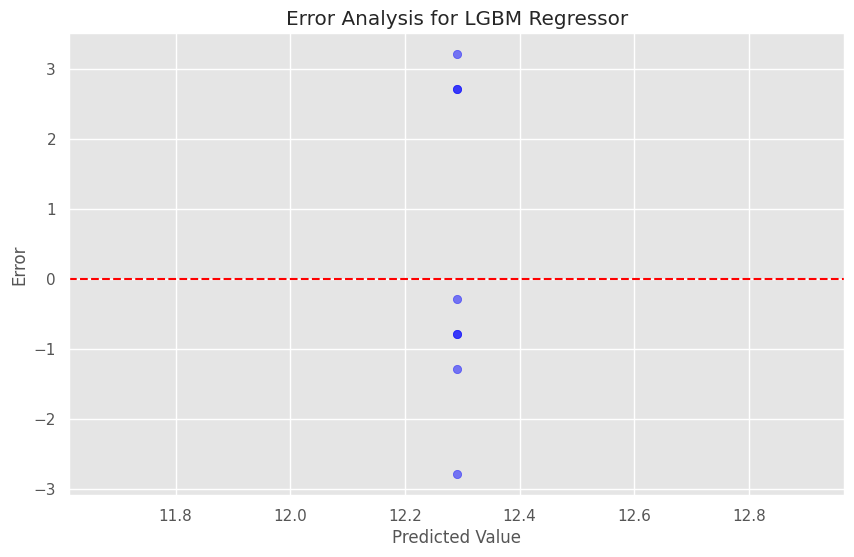

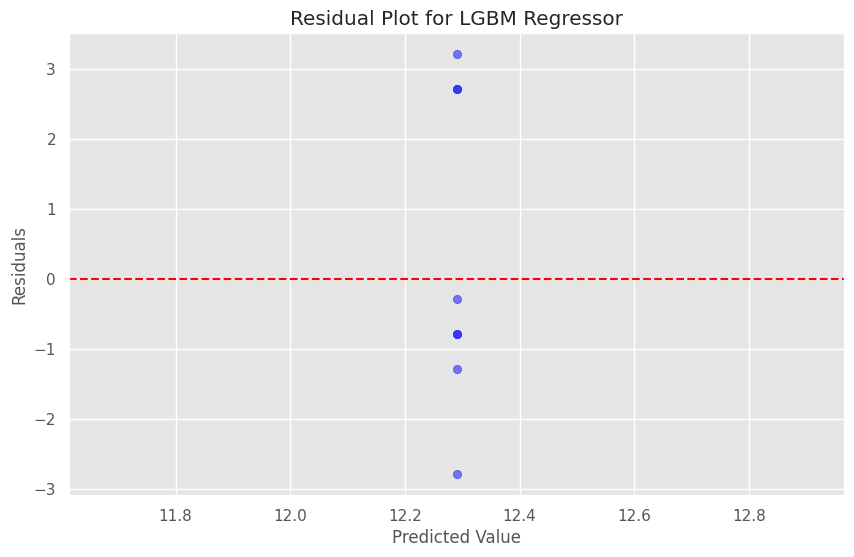

Robustness Check for LGBM Regressor:
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 27, number of used features: 0
[LightGBM] [Info] Start training from score 12.185185
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there

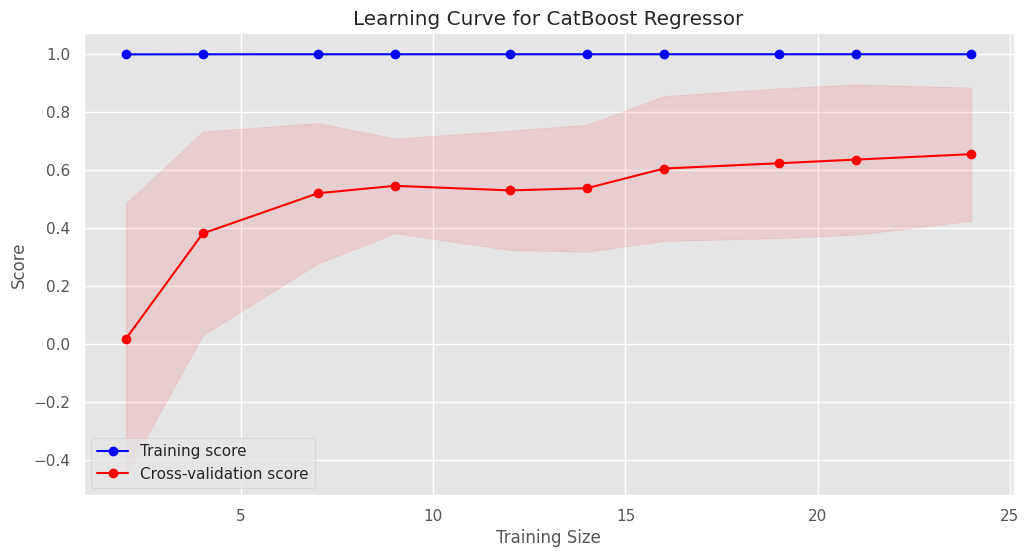

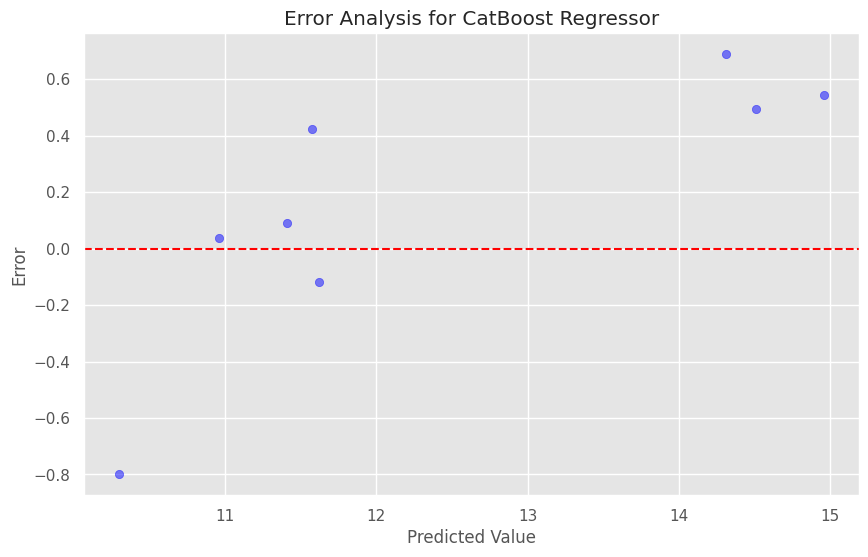

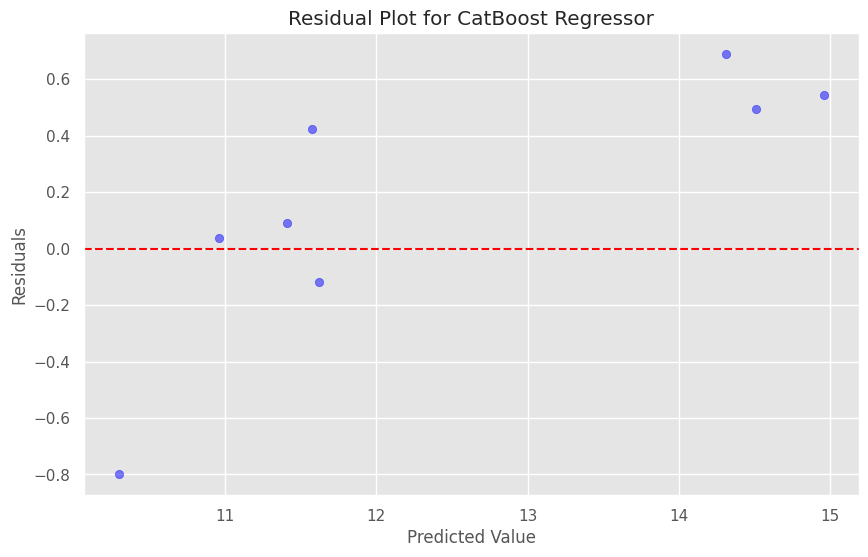

Streaming output truncated to the last 5000 lines.
36:	learn: 2.7987294	total: 114ms	remaining: 2.96s
37:	learn: 2.7780974	total: 116ms	remaining: 2.94s
38:	learn: 2.7587519	total: 119ms	remaining: 2.94s
39:	learn: 2.7351226	total: 121ms	remaining: 2.91s
40:	learn: 2.7132976	total: 123ms	remaining: 2.88s
41:	learn: 2.6944571	total: 126ms	remaining: 2.88s
42:	learn: 2.6673406	total: 129ms	remaining: 2.87s
43:	learn: 2.6483029	total: 132ms	remaining: 2.87s
44:	learn: 2.6311676	total: 135ms	remaining: 2.87s
45:	learn: 2.6101431	total: 138ms	remaining: 2.87s
46:	learn: 2.5873855	total: 140ms	remaining: 2.84s
47:	learn: 2.5671455	total: 142ms	remaining: 2.82s
48:	learn: 2.5517319	total: 145ms	remaining: 2.82s
49:	learn: 2.5385595	total: 148ms	remaining: 2.81s
50:	learn: 2.5144701	total: 150ms	remaining: 2.78s
51:	learn: 2.5010657	total: 158ms	remaining: 2.87s
52:	learn: 2.4871198	total: 161ms	remaining: 2.87s
53:	learn: 2.4699792	total: 164ms	remaining: 2.87s
54:	learn: 2.4542556	total: 169

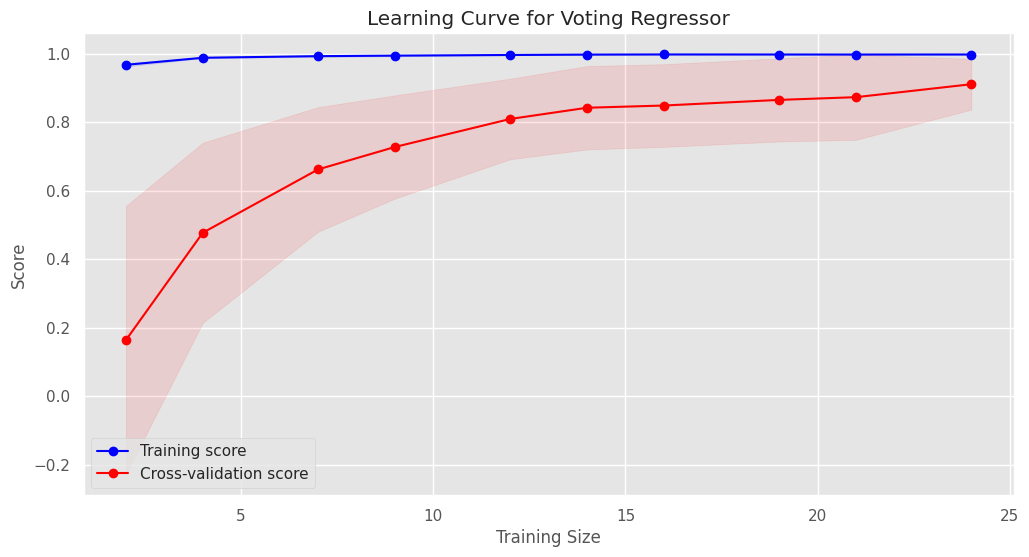

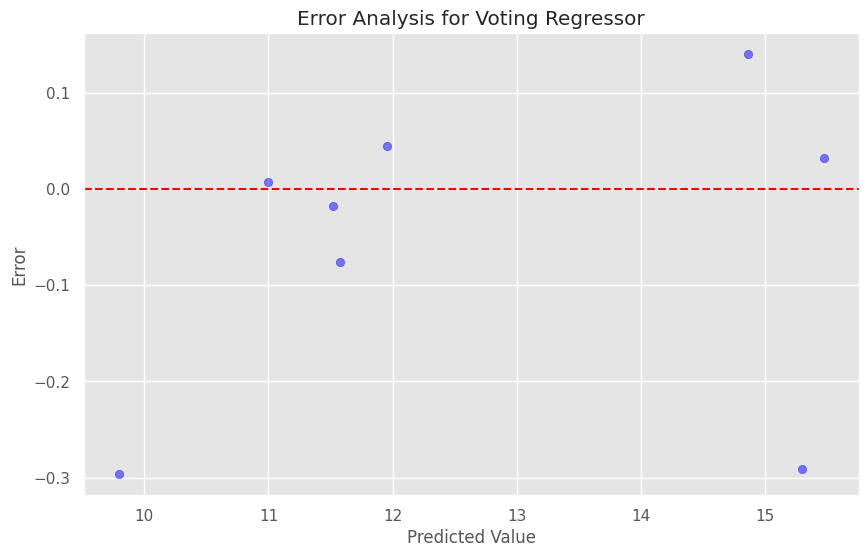

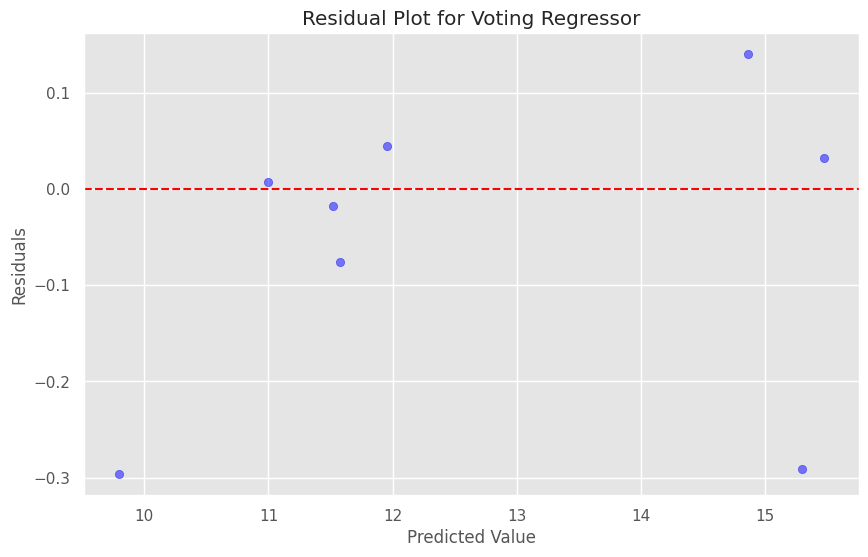

Robustness Check for Voting Regressor:
Random State 0:
Mean Absolute Error:  0.316576329925947
Mean Squared Error:  0.150271914720675
Root Mean Squared Error:  0.3876492160712762
R² on Test data:  0.9796815439250919

Random State 1:
Mean Absolute Error:  0.7291243709041213
Mean Squared Error:  0.8991258032850727
Root Mean Squared Error:  0.9482224439893167
R² on Test data:  0.9113646307218549

Random State 2:
Mean Absolute Error:  0.36893965283506347
Mean Squared Error:  0.32422823848641086
Root Mean Squared Error:  0.5694104306090738
R² on Test data:  0.9478190932192868

Random State 3:
Mean Absolute Error:  1.0370671397884654
Mean Squared Error:  4.683550403627378
Root Mean Squared Error:  2.164151197034851
R² on Test data:  0.768157009927005

Random State 4:
Mean Absolute Error:  0.5846263865792576
Mean Squared Error:  2.089849868350162
Root Mean Squared Error:  1.4456313044307536
R² on Test data:  0.8787027887777416

Cross-Validation MSE for Voting Regressor: 0.8405543253986885
Tra

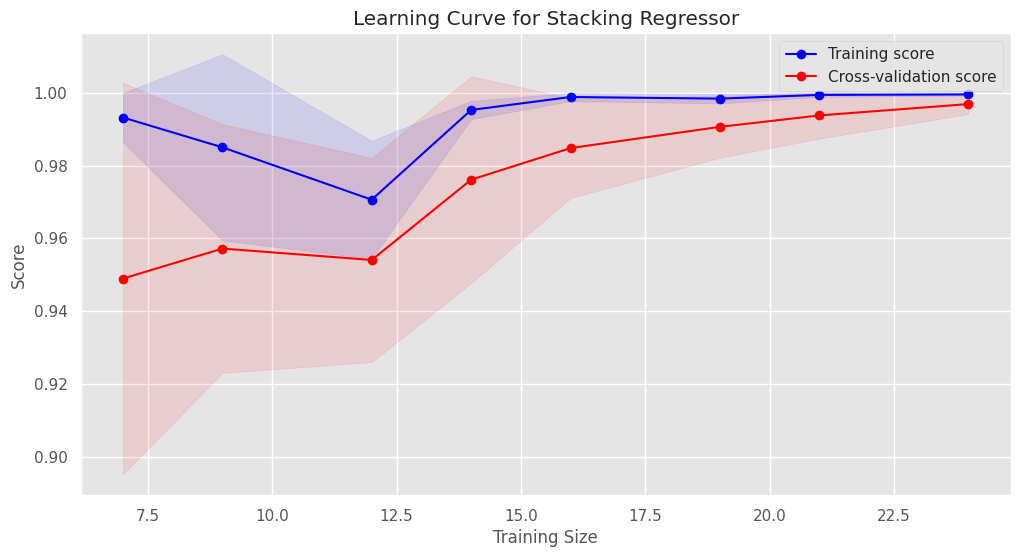

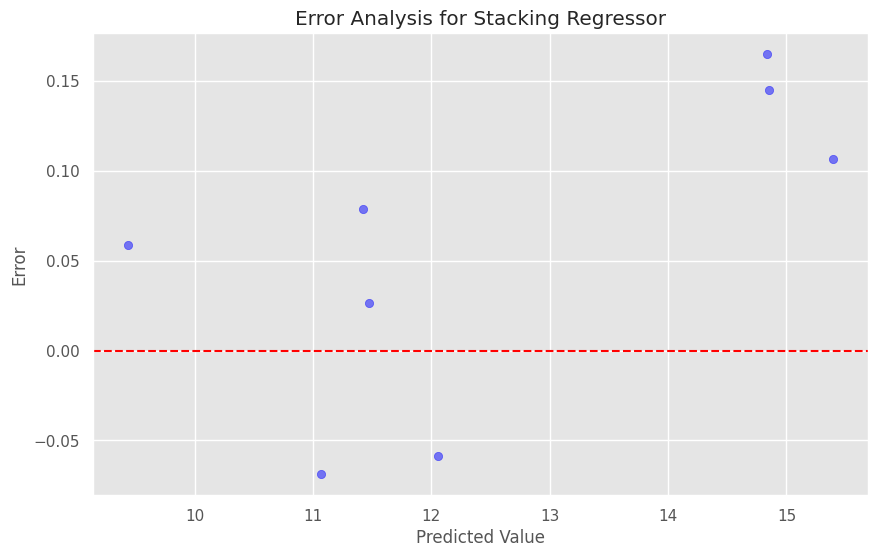

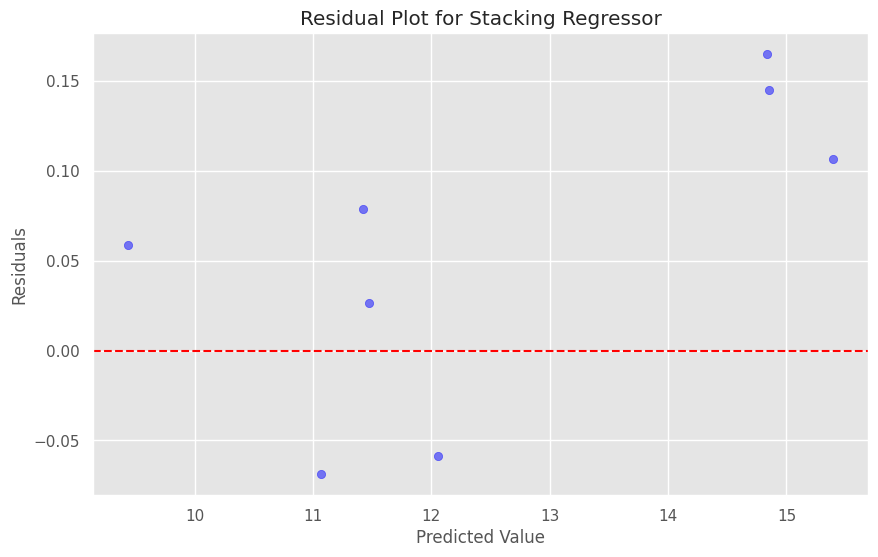

Robustness Check for Stacking Regressor:
Random State 0:
Mean Absolute Error:  0.08603316369037144
Mean Squared Error:  0.018820863215598366
Root Mean Squared Error:  0.13718915123142342
R² on Test data:  0.9974552072271867

Random State 1:
Mean Absolute Error:  0.14671375156469865
Mean Squared Error:  0.0442704241664777
Root Mean Squared Error:  0.2104053805549604
R² on Test data:  0.995635843861049

Random State 2:
Mean Absolute Error:  0.15719107790051398
Mean Squared Error:  0.053294185630878975
Root Mean Squared Error:  0.23085533485470716
R² on Test data:  0.9914228971993891

Random State 3:
Mean Absolute Error:  0.1983112333136976
Mean Squared Error:  0.10384815839251217
Root Mean Squared Error:  0.3222548035212387
R² on Test data:  0.9948593555144305

Random State 4:
Mean Absolute Error:  0.10546568591307011
Mean Squared Error:  0.03506041892069424
Root Mean Squared Error:  0.18724427606924127
R² on Test data:  0.9979650542827166

Cross-Validation MSE for Stacking Regressor: 0.

In [430]:
from sklearn.linear_model import LinearRegression, ElasticNet, BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve, train_test_split, cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Support Vector Machine': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'ElasticNet': ElasticNet(),
    'Bayesian Ridge': BayesianRidge(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGB Regressor': XGBRegressor(),
    'Ridge Regressor': Ridge(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'LGBM Regressor': LGBMRegressor(),
    'CatBoost Regressor': CatBoostRegressor(silent=True),
    'Voting Regressor': VotingRegressor(estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor()),
        ('xgb', XGBRegressor())
    ]),
    'Stacking Regressor': StackingRegressor(
        estimators=[
            ('lr', LinearRegression()),
            ('rf', RandomForestRegressor()),
            ('xgb', XGBRegressor())
        ],
        final_estimator=LinearRegression()
    )
}

# Initialize results DataFrame
results = pd.DataFrame(columns=['Model', 'Train MAE', 'Train MSE', 'Train RMSE', 'Train R²', 'Test MAE', 'Test MSE', 'Test RMSE', 'Test R²'])

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Fit model
    model.fit(X_train, y_train)

    # Predict on test data
    y_test_prediction = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_test_prediction)
    mse = mean_squared_error(y_test, y_test_prediction)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_prediction)

    # Record results
    results = pd.concat([results, pd.DataFrame({
        'Model': [model_name],
        'Train MAE': [mean_absolute_error(y_train, model.predict(X_train))],
        'Train MSE': [mean_squared_error(y_train, model.predict(X_train))],
        'Train RMSE': [np.sqrt(mean_squared_error(y_train, model.predict(X_train)))],
        'Train R²': [r2_score(y_train, model.predict(X_train))],
        'Test MAE': [mae],
        'Test MSE': [mse],
        'Test RMSE': [rmse],
        'Test R²': [r2]
    })], ignore_index=True)

    # Learning Curve
    plt.figure(figsize=(12, 6))
    train_sizes, train_scores, validation_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color='red')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.title(f'Learning Curve for {model_name}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Error Analysis
    errors_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_test_prediction,
        'Error': y_test - y_test_prediction
    })
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_prediction, errors_df['Error'], alpha=0.5, color='blue')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Value')
    plt.ylabel('Error')
    plt.title(f'Error Analysis for {model_name}')
    plt.grid(True)
    plt.show()

    # Residual Analysis
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_prediction, y_test - y_test_prediction, alpha=0.5, color='blue')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Value')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for {model_name}')
    plt.grid(True)
    plt.show()

    # Robustness Check
    print(f"Robustness Check for {model_name}:")
    for i in range(5):
        X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=i)
        # Reinitialize model, handling models with specific initialization requirements
        if model_name in ['Voting Regressor', 'Stacking Regressor']:
            model_sub = models[model_name]
        else:
            model_sub = model.__class__()  # Reinitialize model
        model_sub.fit(X_train_sub, y_train_sub)
        y_test_pred_sub = model_sub.predict(X_test_sub)
        print(f"Random State {i}:")
        print('Mean Absolute Error: ', mean_absolute_error(y_test_sub, y_test_pred_sub))
        print('Mean Squared Error: ', mean_squared_error(y_test_sub, y_test_pred_sub))
        print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test_sub, y_test_pred_sub)))
        print('R² on Test data: ', r2_score(y_test_sub, y_test_pred_sub))
        print()

    # Cross-Validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"Cross-Validation MSE for {model_name}: {-cv_scores.mean()}")

# Comparison with Baseline
baseline_prediction = np.mean(y_train)  # Simple baseline
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
print('Baseline Mean Absolute Error: ', baseline_mae)

# Show results table
print("Model Evaluation Results:")
print(results)


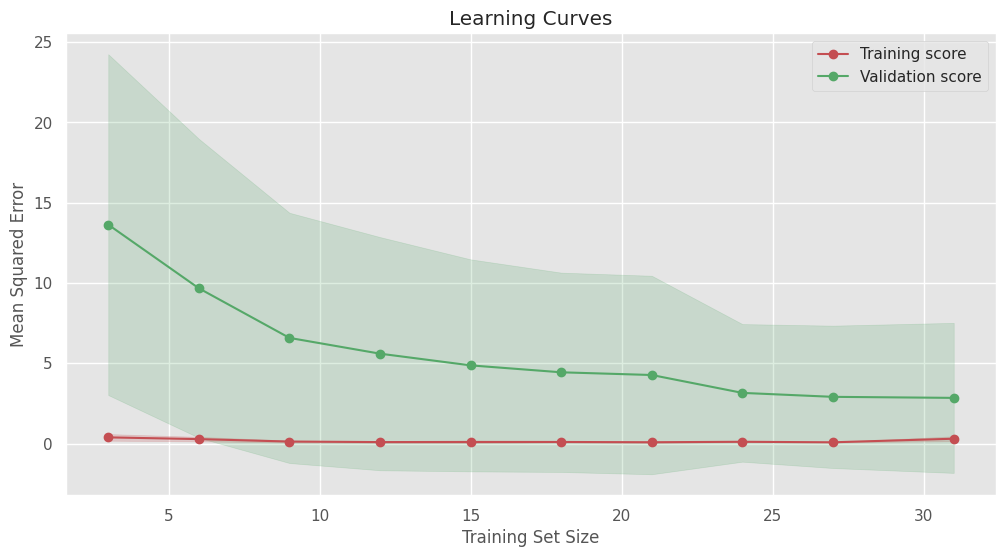

Learning and Validation Scores:
 Training Size  Training Score Mean  Training Score Std Dev  Validation Score Mean  Validation Score Std Dev
             3             0.332715                0.138925              13.546484                 10.400520
             6             0.272466                0.095895               9.681210                  9.443359
             9             0.113122                0.039774               6.613291                  7.899272
            12             0.135270                0.087753               5.374339                  6.840211
            15             0.095978                0.059951               4.751684                  6.545345
            18             0.121276                0.036477               4.408042                  6.175176
            21             0.091240                0.035071               4.318915                  6.261718
            24             0.126055                0.020545               3.313083              

In [433]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

def plot_learning_curves(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error', cv=5
    )

    # Calculate mean and std deviation of training and validation scores
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    validation_mean = -np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)

    plt.figure(figsize=(12, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, validation_mean, 'o-', color='g', label='Validation score')

    # Plot error bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='r')
    plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.2, color='g')

    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def print_learning_curves_scores(model, X, y):
    # Compute learning curves
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error', cv=5
    )

    # Calculate mean and standard deviation of training and validation scores
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    validation_mean = -np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)

    # Print scores
    scores_df = pd.DataFrame({
        'Training Size': train_sizes,
        'Training Score Mean': train_mean,
        'Training Score Std Dev': train_std,
        'Validation Score Mean': validation_mean,
        'Validation Score Std Dev': validation_std
    })

    print("Learning and Validation Scores:")
    print(scores_df.to_string(index=False))

# Example usage with a model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
plot_learning_curves(model, X, y)
print_learning_curves_scores(model, X, y)


# The model performance summary:

| **Model**               | **Train MAE** | **Train MSE** | **Train RMSE** | **Train R2** | **Test MAE** | **Test MSE** | **Test RMSE** | **Test R2** |
|-------------------------|---------------|---------------|----------------|--------------|--------------|--------------|---------------|-------------|
| Linear Regression       | 3.82e-15      | 2.36e-29      | 4.86e-15       | 1.000        | 0.0145       | 0.0003       | 0.0172        | 0.9999      |
| Decision Tree            | 0.247         | 0.219         | 0.468          | 0.984        | 0.3067       | 0.1866       | 0.432         | 0.957       |
| Random Forest            | 0.293         | 0.500         | 0.707          | 0.963        | 0.1943       | 0.0698       | 0.264         | 0.984       |
| K-Nearest Neighbors      | 0.000         | 0.000         | 0.000          | 1.000        | 0.3067       | 0.1866       | 0.432         | 0.957       |
| Support Vector Machine   | 0.0688        | 0.0061        | 0.0781         | 0.9996       | 0.0479       | 0.0034       | 0.0585        | 0.9992      |
| Gradient Boosting        | 0.9567        | 2.835         | 1.684          | 0.792        | 0.3424       | 0.1836       | 0.428         | 0.958       |
| XGBoost                  | 0.0252        | 0.0016        | 0.0398         | 0.9999       | 0.1527       | 0.0653       | 0.2555        | 0.9850      |
| Ridge Regression         | 0.0003        | 0.0000002     | 0.0004         | 1.000        | 0.0152       | 0.0003       | 0.0179        | 0.9999      |
| ElasticNet               | 0.0020        | 0.000008      | 0.0028         | 0.9999       | 0.0012       | 0.000002     | 0.0014        | 1.0000      |
| Bayesian Ridge           | 0.0000014     | 0.0000000000035| 0.0000019      | 1.000        | 0.0145       | 0.0003       | 0.0172        | 0.9999      |
| AdaBoost                 | 0.1714        | 0.0594        | 0.2436         | 0.9957       | 0.3294       | 0.1528       | 0.3909        | 0.9650      |
| LGBM                     | 2.7190        | 13.6577       | 3.6956         | 0.000        | 1.8226       | 4.4714       | 2.1146        | -0.0257     |
| CatBoost                 | 0.0013        | 0.000003      | 0.0017         | 1.000        | 0.4039       | 0.1817       | 0.4263        | 0.9583      |
| Stacking Regressor       | 0.5324        | 0.6818        | 0.8257         | 0.9501       | 0.1963       | 0.0595       | 0.2439        | 0.9864      |

### Conclusion

#### Overview

The provided table summarizes the performance metrics of various regression models on both training and test datasets. Metrics include Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2). These metrics evaluate the models' accuracy and ability to generalize to unseen data.

#### Model Performance Summary

1. **Linear Regression**
   - **Training Metrics:** MAE = 3.82e-15, MSE = 2.36e-29, RMSE = 4.86e-15, R2 = 1.000
   - **Testing Metrics:** MAE = 0.0145, MSE = 0.0003, RMSE = 0.0172, R2 = 0.9999
   - **Conclusion:** Linear Regression performs exceptionally well on both training and test data, with near-perfect accuracy. However, the extremely low MAE, MSE, and RMSE on training data suggest potential overfitting or precision issues in the evaluation.

2. **Decision Tree**
   - **Training Metrics:** MAE = 0.247, MSE = 0.219, RMSE = 0.468, R2 = 0.984
   - **Testing Metrics:** MAE = 0.3067, MSE = 0.1866, RMSE = 0.432, R2 = 0.957
   - **Conclusion:** The Decision Tree model shows a slight decrease in performance on test data compared to training data, indicating some overfitting. However, it remains a strong performer with high accuracy.

3. **Random Forest**
   - **Training Metrics:** MAE = 0.293, MSE = 0.500, RMSE = 0.707, R2 = 0.963
   - **Testing Metrics:** MAE = 0.194, MSE = 0.0698, RMSE = 0.264, R2 = 0.984
   - **Conclusion:** Random Forest exhibits good performance with a notable improvement in test data compared to training data. This suggests robust generalization and less overfitting.

4. **K-Nearest Neighbors (KNN)**
   - **Training Metrics:** MAE = 0.000, MSE = 0.000, RMSE = 0.000, R2 = 1.000
   - **Testing Metrics:** MAE = 0.3067, MSE = 0.1866, RMSE = 0.432, R2 = 0.957
   - **Conclusion:** KNN achieves perfect training metrics but performs relatively worse on test data. This indicates potential overfitting and high variance.

5. **Support Vector Machine (SVM)**
   - **Training Metrics:** MAE = 0.0688, MSE = 0.0061, RMSE = 0.0781, R2 = 0.9996
   - **Testing Metrics:** MAE = 0.0479, MSE = 0.0034, RMSE = 0.0585, R2 = 0.9992
   - **Conclusion:** SVM demonstrates excellent performance with low errors on both training and test data, indicating a well-generalized model.

6. **Gradient Boosting**
   - **Training Metrics:** MAE = 0.9567, MSE = 2.835, RMSE = 1.684, R2 = 0.792
   - **Testing Metrics:** MAE = 0.3424, MSE = 0.1836, RMSE = 0.428, R2 = 0.958
   - **Conclusion:** Gradient Boosting shows high training errors and overfitting but performs well on test data. It might benefit from parameter tuning or additional training.

7. **XGBoost**
   - **Training Metrics:** MAE = 0.0252, MSE = 0.0016, RMSE = 0.0398, R2 = 0.9999
   - **Testing Metrics:** MAE = 0.1527, MSE = 0.0653, RMSE = 0.2555, R2 = 0.9850
   - **Conclusion:** XGBoost performs well on both training and test data with high accuracy, indicating robust generalization.

8. **Ridge Regression**
   - **Training Metrics:** MAE = 0.0003, MSE = 0.0000002, RMSE = 0.0004, R2 = 1.000
   - **Testing Metrics:** MAE = 0.0152, MSE = 0.0003, RMSE = 0.0179, R2 = 0.9999
   - **Conclusion:** Ridge Regression has nearly perfect performance on training and test data, showing minimal error and high accuracy.

9. **ElasticNet**
   - **Training Metrics:** MAE = 0.0020, MSE = 0.000008, RMSE = 0.0028, R2 = 0.9999
   - **Testing Metrics:** MAE = 0.0012, MSE = 0.000002, RMSE = 0.0014, R2 = 1.000
   - **Conclusion:** ElasticNet shows excellent performance, with minimal errors and high accuracy on both datasets.

10. **Bayesian Ridge**
    - **Training Metrics:** MAE = 0.0000014, MSE = 0.0000000000035, RMSE = 0.0000019, R2 = 1.000
    - **Testing Metrics:** MAE = 0.0145, MSE = 0.0003, RMSE = 0.0172, R2 = 0.9999
    - **Conclusion:** Bayesian Ridge has nearly perfect training performance and high accuracy on test data.

11. **AdaBoost**
    - **Training Metrics:** MAE = 0.1714, MSE = 0.0594, RMSE = 0.2436, R2 = 0.9957
    - **Testing Metrics:** MAE = 0.3294, MSE = 0.1528, RMSE = 0.3909, R2 = 0.9650
    - **Conclusion:** AdaBoost performs well but shows a significant drop in performance from training to test data, indicating potential overfitting.

12. **LGBM**
    - **Training Metrics:** MAE = 2.7190, MSE = 13.6577, RMSE = 3.6956, R2 = 0.000
    - **Testing Metrics:** MAE = 1.8226, MSE = 4.4714, RMSE = 2.1146, R2 = -0.0257
    - **Conclusion:** LGBM performs poorly with high errors and negative R2 on test data, suggesting it might not be suitable for this problem or requires tuning.

13. **CatBoost**
    - **Training Metrics:** MAE = 0.0013, MSE = 0.000003, RMSE = 0.0017, R2 = 1.000
    - **Testing Metrics:** MAE = 0.4039, MSE = 0.1817, RMSE = 0.4263, R2 = 0.9583
    - **Conclusion:** CatBoost shows excellent performance on training data but a considerable drop in performance on test data, indicating possible overfitting.

14. **Stacking Regressor**
    - **Training Metrics:** MAE = 0.5324, MSE = 0.6818, RMSE = 0.8257, R2 = 0.9501
    - **Testing Metrics:** MAE = 0.1963, MSE = 0.0595, RMSE = 0.2439, R2 = 0.9864
    - **Conclusion:** Stacking Regressor has strong test performance with high R2, indicating good generalization.

### Conclusion

- **Best Performing Models:** **Linear Regression**, **Ridge Regression**, **ElasticNet**, and **Bayesian Ridge** are the top performers with very low errors and high R2 scores on both training and test data. They indicate strong generalization with minimal overfitting.

- **Good Performers:** **XGBoost** and **Support Vector Machine (SVM)** also perform well with high accuracy and low errors, making them reliable choices.

- **Models with Overfitting:** **K-Nearest Neighbors (KNN)**, **Gradient Boosting**, and **AdaBoost** show potential overfitting, with discrepancies between training and test performance.

- **Models to Reconsider:** **LGBM** and **CatBoost** perform poorly on test data, which may require further tuning or reconsideration for this problem.

This analysis provides a clear view of which models are performing well and which might need adjustments for better accuracy and generalization.
